# The Value of Existential Risk Mitigation: Companion Notebook

All the imports and loads needed for the notebook (which need installing if the haven't been already) are in the cell below. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import Image, display

In [11]:
# skip execution of this cell of certain cells
# skip_execution = True
skip_execution = False

# The value of the world given existential risk

Let us start by translating Equation (1) of the generalised model into Python.

In [4]:
def calculate_Ew(T, v, r):
    Ew = 0
    
    for i in range(T):
        prod_term = 1
        
        for j in range(i+1):  
            prod_term *= (1 - r[j])
            
        Ew += prod_term * v[i]
        
    return Ew

# Quick Example

# Set the parameters
T = 1000

# For the purpose of this example, I'll use uniform values for `v` and `r`
# v = [1, 1, ... 1] and r = [0.01, 0.01, ... 0.01]
# The reader can change these values as per their requirements

v = [1 for _ in range(T)]
r = [0.01 for _ in range(T)]

# Calculate E(w)
Ew = calculate_Ew(T, v, r)

# Printing the results along with the parameters
print("Quick example:")
print("--------------")
print("T =", T)
print("v (first 5 elements for brevity) =", v[:5])
print("r (first 5 elements for brevity) =", r[:5])
print("E(w) =", Ew)
# True value at infty for v = [1 for _ in range(T)] , r = [0.01 for _ in range(T)] should be 
# S = a1/(1-R)=99 since a1=1-r and R=1-r=1-0.01=0.99
# And it is.


Quick example:
--------------
T = 1000
v (first 5 elements for brevity) = [1, 1, 1, 1, 1]
r (first 5 elements for brevity) = [0.01, 0.01, 0.01, 0.01, 0.01]
E(w) = 98.99572604650623


Let us do some more checks (the reader should ignore the cell below).

In [26]:
# The reader can ignore this cell
# Some extra checks to test behaviour of the function per term:

if not skip_execution:

    def calculate_Ew(T, v, r):
        Ew = 0
        
        for i in range(T): # i=0,1,2, ... T-1
            prod_term = 1
            
            for j in range(i+1):  # j=0,1,2, ... i
                # Checks
                print("(i,j) =", (i,j))
                # print("r[j] =", r[j])
                print("previous prodterm =", prod_term)
                prod_term *= (1 - r[j])
                print("1-prodterm =", 1-prod_term)
                
            print("previous E(w) =", Ew)
            Ew += prod_term * v[i]
            print("E(w) =", Ew)
            # Checks
            # print("new prodterm =", prod_term)
            # print("E(w) ith =",  prod_term * v[i])
            
        return Ew

    # Set the parameters
    T = 3

    # For the purpose of this example, I'll use uniform values for `v` and `r`
    # v = [1, 1, ... 1] and r = [0.01, 0.01, ... 0.01]
    # You can change these values as per your requirements

    v = [1 for _ in range(T)]
    r = [0.5 for _ in range(T)]

    # Calculate E(w) modified to elliminate the inner loop inefficiency
    Ew = calculate_Ew(T, v, r)

    print("E(w) =", Ew)
    
    # def calculate_Ew(T, v, r):
    #     Ew = 0
    #     prod_term = 1
        
    #     for i in range(T):
    #         # Checks
    #         print("i =", i)
    #         # print("r[j] =", r[j])
    #         print("previous prodterm =", prod_term)
    #         prod_term *= (1 - r[i])
    #         print("1-prodterm =", 1-prod_term)

                
    #         print("previous E(w) =", Ew)
    #         Ew += prod_term * v[i]
    #         print("E(w) =", Ew)
    #         # Checks
    #         # print("new prodterm =", prod_term)
    #         # print("E(w) ith =",  prod_term * v[i])
            
    #     return Ew

    # # Set the parameters
    # T = 3

    # # For the purpose of this example, I'll use uniform values for `v` and `r`
    # # v = [1, 1, ... 1] and r = [0.01, 0.01, ... 0.01]
    # # You can change these values as per your requirements

    # v = [1 for _ in range(T)]
    # r = [0.5 for _ in range(T)]

    # # Calculate E(w)
    # Ew = calculate_Ew(T, v, r)

    # print("E(w) =", Ew)


(i,j) = (0, 0)
previous prodterm = 1
1-prodterm = 0.5
previous E(w) = 0
E(w) = 0.5
(i,j) = (1, 0)
previous prodterm = 1
1-prodterm = 0.5
(i,j) = (1, 1)
previous prodterm = 0.5
1-prodterm = 0.75
previous E(w) = 0.5
E(w) = 0.75
(i,j) = (2, 0)
previous prodterm = 1
1-prodterm = 0.5
(i,j) = (2, 1)
previous prodterm = 0.5
1-prodterm = 0.75
(i,j) = (2, 2)
previous prodterm = 0.25
1-prodterm = 0.875
previous E(w) = 0.75
E(w) = 0.875
E(w) = 0.875


note lack of -1 in original chunk below        
```python        
for j in range(i):
``` 
experiment with it, ask about i=0 missing and delete

In [34]:
def calculate_Ew(T, v, r):
    Ew = 0
    
    for i in range(T): 
        prod_term = 1
        
        for j in range(i):
            # Checks
            print("(i,j) =", (i,j))
            prod_term *= (1 - r[j])
            
        Ew += prod_term * v[i]
        
    return Ew

# Set the parameters
T = 5

# For the purpose of this example, I'll use uniform values for `v` and `r`
# v = [1, 1, ... 1] and r = [0.01, 0.01, ... 0.01]
# One can change these values as per any requirements

v = [1 for _ in range(T)]
r = [0.01 for _ in range(T)]

# Calculate E(w)
Ew = calculate_Ew(T, v, r)

print("E(w) =", Ew)


(i,j) = (1, 0)
(i,j) = (2, 0)
(i,j) = (2, 1)
(i,j) = (3, 0)
(i,j) = (3, 1)
(i,j) = (3, 2)
(i,j) = (4, 0)
(i,j) = (4, 1)
(i,j) = (4, 2)
(i,j) = (4, 3)
E(w) = 4.90099501


# Different Value Paths

Let us now put into code the main value paths we are interested in:
- constant value
- linear value
- quadratic value
- cubic value
- logit value
- and others (custom)

First, we define a time adjustment function to adjust the time scale of the value vector from centuries to years, or to any other scale captured by the alpha parameter. Second, we define a function that returns the sequence of values of the world, given a path and a time adjustment function.

In [55]:
# Time adjustment function
def time_adjustment(input, alpha):
    return alpha * input + (1 - alpha)

# alpha is simply 1/units_in_century
# def alpha_from_centuries_for_given_unit(units_in_century=100): # input is how many of these units in a century
#     alpha = 1/units_in_century
#     return alpha

# Value sequence generator given the path type
def generate_value_vector(T, v_type="constant", custom_v=None, alpha=0.01):
    # Initialize the value vector based on the preset option
    if v_type == "constant":
        v = [1 for _ in range(T)]
    elif v_type == "linear":
        v = [time_adjustment(i+1,alpha) for i in range(T)]
    elif v_type == "quadratic":
        v = [(time_adjustment(i+1,alpha))**2 for i in range(T)]
    elif v_type == "cubic":
        v = [(time_adjustment(i+1,alpha))**3 for i in range(T)]
# For dyslexia reference, the above without the adjustment is the same as:
    # if v_type == "constant":
    #     v = [1 for _ in range(T)]
    # elif v_type == "linear":
    #     v = [i+1 for i in range(T)]
    # elif v_type == "quadratic":
    #     v = [(i+1)**2 for i in range(T)]
    # elif v_type == "cubic":
    #     v = [(i+1)**3 for i in range(T)]
    elif v_type == "logistic":
        c = 500**3 # this is the value cap, here the cubic growth after 500 years.
        a = 100 # by this time the value is more than half its cap, and usually about two thirds of it
        b = 9 # affects how long before value explodes. higher means more delay. 9 gives a few decades before (TAI) explosion
        # v = [c * (1 - np.exp(-((i+1)/a)**b)) + 1 for i in range(T)] # if in doubt, see graph below 
        v = [c * (1 - np.exp(-((time_adjustment(i+1,alpha))/a)**b)) + 1 for i in range(T)] # if in doubt, see graph below 
    elif v_type == "custom":
        if custom_v is None:
            custom_v = list(map(int, input("Enter your custom v vector separated by spaces: ").split()))
        v = custom_v
    
    return v

# Examples of first ten years with each of the types

types = ["constant", "linear", "quadratic", "cubic", "logistic"]
T = 10
v_type = "constant"

print("Quick example for 1 period = 1 year (alpha=0.01):")

for v_type in types:
    v = generate_value_vector(T, v_type)
    print("Quick example:")
    print(f"Generated value sequence (v) of type '{v_type}': {v}")
    print("--------------")
    
# We can print the same example again for alpha=1

print(" ")
print(" ")
print("Quick example for 1 period = 1 century (alpha=1):")

for v_type in types:
    v = generate_value_vector(T, v_type, alpha=1)
    print(f"Generated value sequence (v) of type '{v_type}': {v}")
    print("--------------")


Quick example for 1 period = 1 year (alpha=0.01):
Quick example:
Generated value sequence (v) of type 'constant': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
--------------
Quick example:
Generated value sequence (v) of type 'linear': [1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09]
--------------
Quick example:
Generated value sequence (v) of type 'quadratic': [1.0, 1.0201, 1.0404, 1.0609, 1.0816000000000001, 1.1025, 1.1236000000000002, 1.1449, 1.1664, 1.1881000000000002]
--------------
Quick example:
Generated value sequence (v) of type 'cubic': [1.0, 1.0303010000000001, 1.0612080000000002, 1.092727, 1.124864, 1.1576250000000001, 1.191016, 1.225043, 1.2597120000000002, 1.2950290000000002]
--------------
Quick example:
Generated value sequence (v) of type 'logistic': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
--------------
 
 
Quick example for 1 period = 1 century (alpha=1):
Generated value sequence (v) of type 'constant': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
--------------
Generate

We can now plot these value paths (when periods are centuries, like in the original work by Ord).

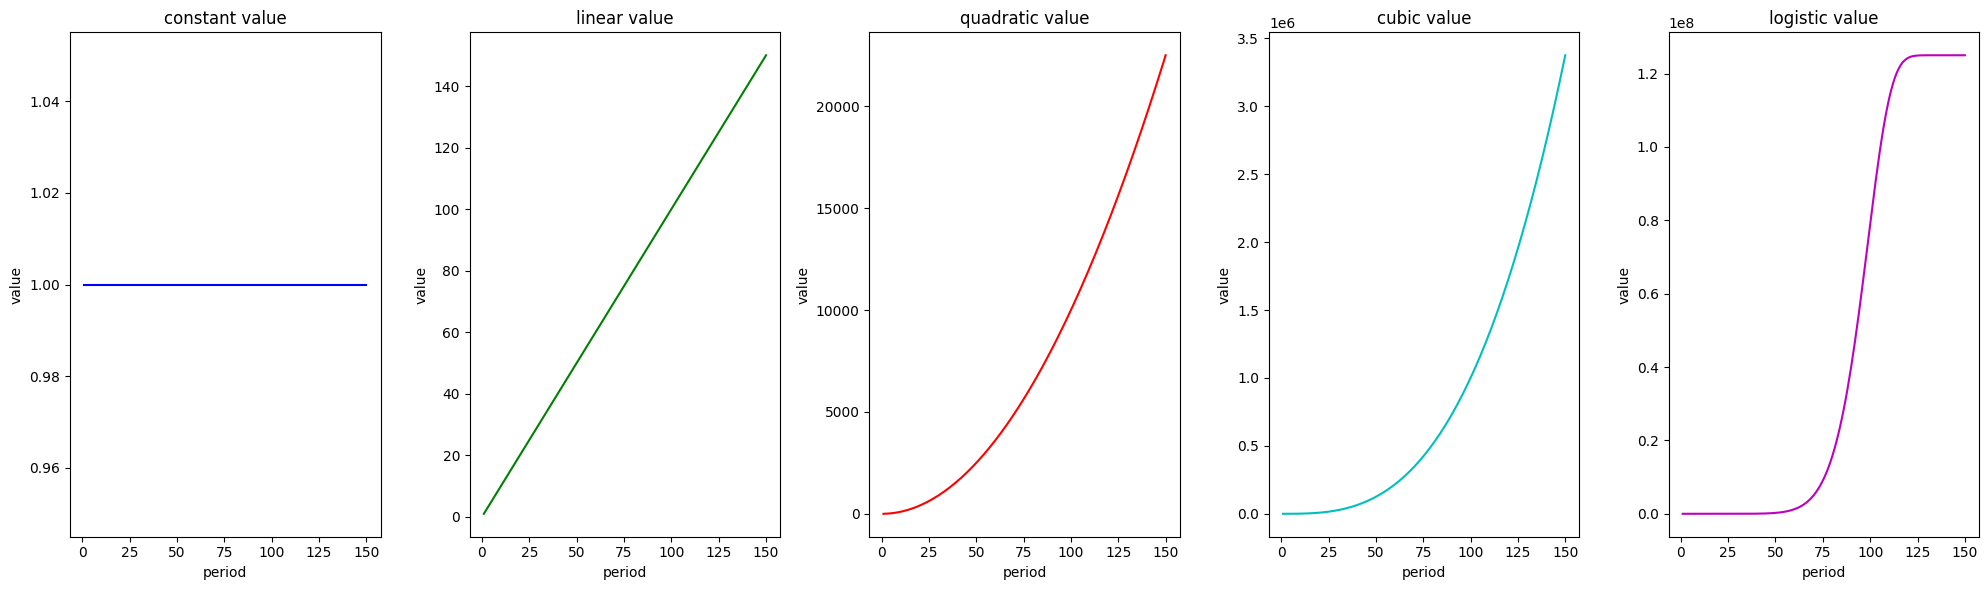

In [57]:
def plot_value_scenarios(T=150, alpha=1):
    types = ["constant", "linear", "quadratic", "cubic", "logistic"]
    colors = ["b", "g", "r", "c", "m"]

    plt.figure(figsize=(20, 6))

    for i, v_type in enumerate(types):
        plt.subplot(1, 5, i + 1)
        v = generate_value_vector(T, v_type, alpha=alpha)
        plt.plot(range(1, T + 1), v, color=colors[i])
        plt.title(f"{v_type} value")
        plt.xlabel("period")
        plt.ylabel("value")

    plt.tight_layout()
    plt.show()
plot_value_scenarios()

And we can plot these value paths when periods are years. See how, as expected, these two match when the $T$ in years is $100$ times that of centuries.

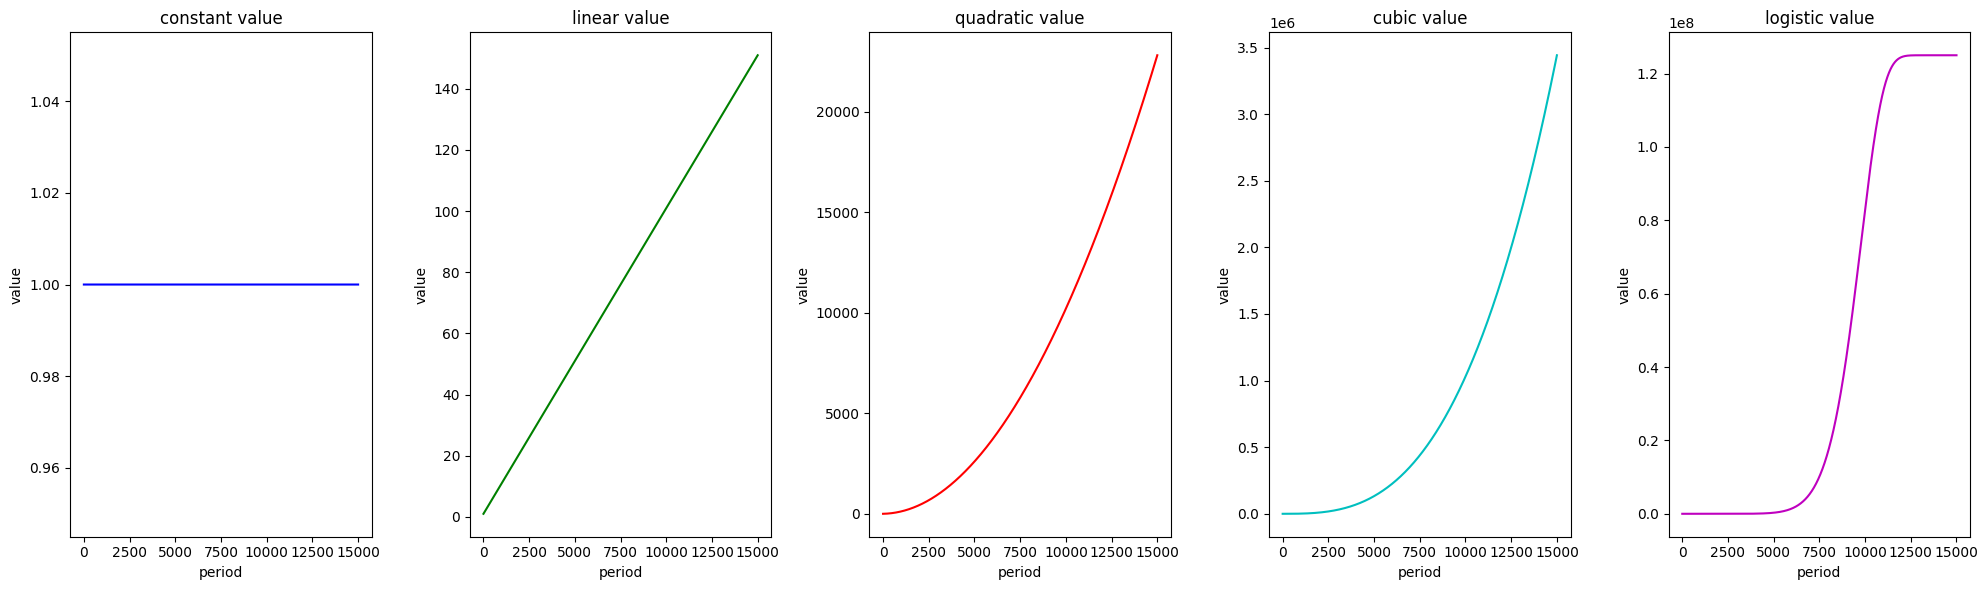

In [59]:
plot_value_scenarios(T=15000,alpha=0.01)

# Different Existential Risks

In this function:
- For "constant", the risk vector is a constant value $0.0022289477$ for $T$ periods.
- For "top", the risk is $0.0022289477$ for the first $100$ periods and $0.0001$ thereafter.
- For "eras", the risk vector alternates between $0.0022289477$ and $0.0001$ with eras of different lengths.
- For "exponential_decay", the risk decays exponentially.
- For "custom", the user is prompted to enter their custom risk vector.


In [8]:
def generate_risk_vector(T, r_type="constant", r_high=0.0022289477, r_low=0.0001, eras_periods=None, eras_risks=None, 
                         r_0=0.0022289477, lambda_val=-0.005, custom_r=None):
    if r_type == "constant":
        r = [r_high for _ in range(T)]
    elif r_type == "top":
        r = [r_high if i < 100 else r_low for i in range(T)]
    elif r_type == "eras":
        if eras_periods is None or eras_risks is None:
            raise ValueError("For 'eras' type, both eras_periods and eras_risks must be provided.")
        r = []
        for i, r_val in zip(eras_periods, eras_risks):
            r.extend([r_val] * i)
    elif r_type == "exponential_decay":
        r = [r_0 * np.exp(lambda_val * t) for t in range(T)]
    elif r_type == "custom":
        if custom_r is None:
            custom_r = list(map(float, input("Enter your custom r vector separated by spaces: ").split()))
        r = custom_r #this is very flexible, user can run the function with any arbitrary r by setting the option: custom_r = [chosen vector]
    
    return r

# Quick example
T = 150
# lambda_val  used to be -11 for centuries
print(generate_risk_vector(T, r_type="exponential_decay"))


# Quick example
T = 1500
eras_periods = [100, 500, 100, T - 700]
eras_risks = [0.0022289477, 0.0001, 0.0022289477, 0.0001]
print(generate_risk_vector(T, "eras",eras_periods=eras_periods,eras_risks=eras_risks))

[0.0022289477, 0.002217830776967827, 0.0022067692998205906, 0.0021957629920207854, 0.0021848115784101436, 0.0021739147852027543, 0.0021630723399782203, 0.0021522839716748452, 0.0021415494105828606, 0.00213086838833768, 0.0021202406379131904, 0.0021096658936150775, 0.002099143891074184, 0.0020886743672398978, 0.0020782570603735777, 0.002067891710042009, 0.002057578057110895, 0.0020473158437383744, 0.002037104813368578, 0.0020269447107252154, 0.0020168352818051905, 0.0020067762738722548, 0.0019967674354506855, 0.0019868085163190006, 0.001976899267503704, 0.0019670394412730583, 0.001957228791130894, 0.0019474670718104474, 0.001937754039268227, 0.0019280894506779128, 0.0019184730644242868, 0.0019089046400971922, 0.001899383938485522, 0.0018899107215712408, 0.0018804847525234313, 0.001871105795692377, 0.0018617736166036685, 0.0018524879819523427, 0.0018432486595970493, 0.0018340554185542488, 0.0018249080289924355, 0.0018158062622263948, 0.0018067498907114827, 0.0017977386880379403, 0.001788

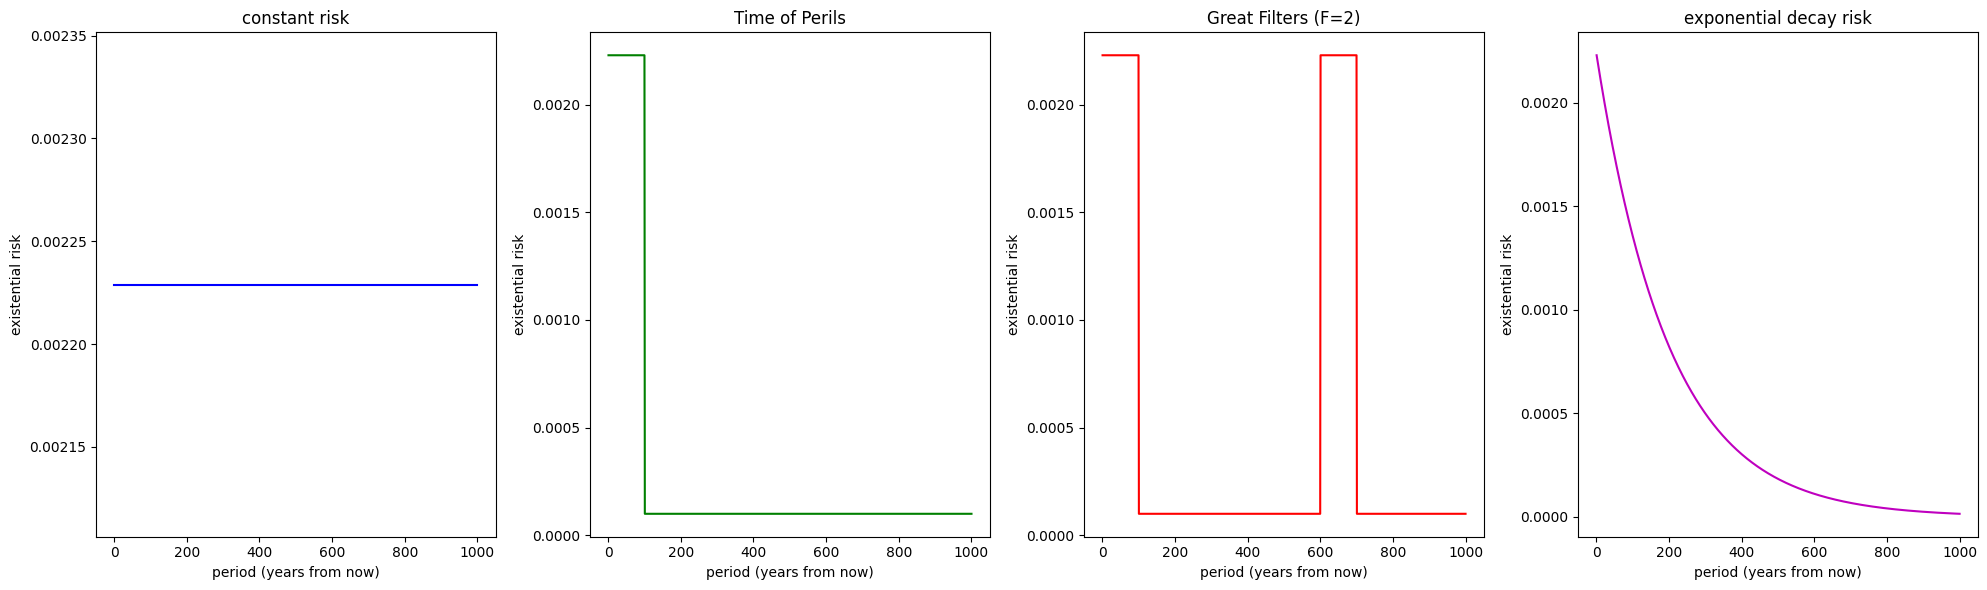

In [9]:

T = 1000
types = ["constant", "top", "eras", "exponential_decay"]
colors = ["b", "g", "r", "m"]

plt.figure(figsize=(20, 6))

for i, r_type in enumerate(types):
    plt.subplot(1, 4, i + 1)
    r = generate_risk_vector(T, r_type, eras_periods = [100, 500, 100, T - 700], eras_risks = [0.0022289477, 0.0001, 0.0022289477, 0.0001])  
    plt.plot(range(1, T + 1), r, color=colors[i])

    if r_type == 'eras':
        plt.title('Great Filters (F=2)')
    elif r_type == 'top':
        plt.title('Time of Perils')
    elif r_type == 'exponential_decay':
        plt.title('exponential decay risk')
    else:
        plt.title(f"{r_type} risk")

    plt.xlabel("period (years from now)")
    plt.ylabel("existential risk")

plt.tight_layout()
plt.show()



# The Expected Value of the World Without Interventions

Let us start with an example. Let us calculate the expected value of the world if risk followed constant risk and value. 

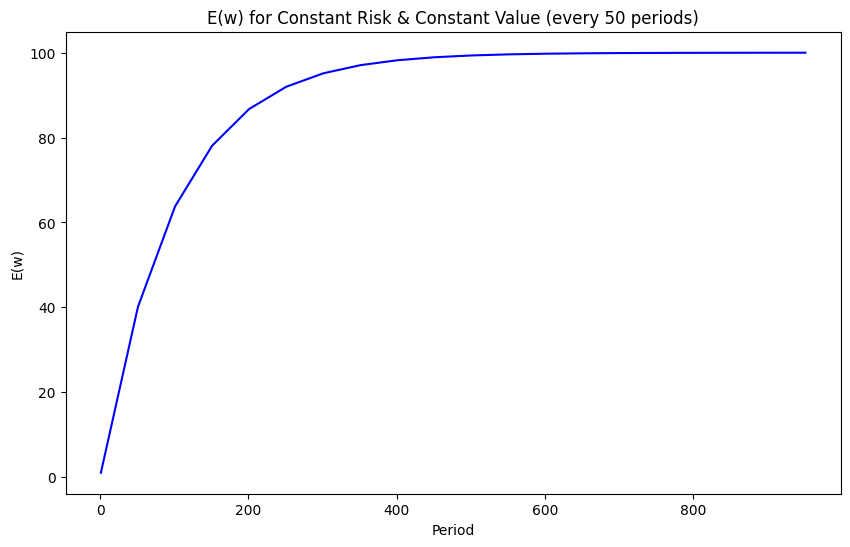

In [10]:
T = 1000
step = 50  # Calculate E(w) every 50 periods

# Generate constant value vector and constant risk vector (can set r_high set to 0.01 as an example)
v_constant = generate_value_vector(T, "constant")
# r_constant = generate_risk_vector(T, "constant")
r_constant = generate_risk_vector(T, "constant", r_high=0.01) # let's use 0.01 for risk since we know (and saw) it should converge to 99

# Calculate Ew for each specified period and store in a list
Ew_list = [calculate_Ew(t, v_constant[:t], r_constant[:t]) for t in range(1, T + 1, step)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1, step), Ew_list, color='b')
plt.title("E(w) for Constant Risk & Constant Value (every 50 periods)")
plt.xlabel("Period")
plt.ylabel("E(w)")
plt.show()


### Time of Perils with constant value

And now under the Time of Perils structure, when the value is constant.

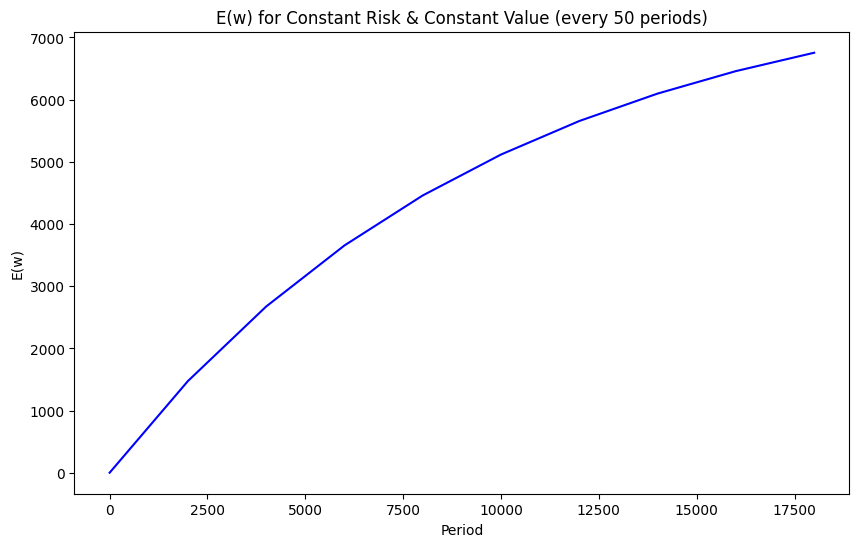

In [11]:
T = 20000
step = 2000  # Calculate E(w) every step number of periods

# Generate constant value vector and top risk vector 
v_constant = generate_value_vector(T+1, "constant")
r_top = generate_risk_vector(T+1, "top")

# Calculate Ew for each specified period and store in a list
Ew_list = [calculate_Ew(t, v_constant[:t], r_top[:t]) for t in range(1, T + 1, step)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, T + 1, step), Ew_list, color='b')
plt.title("E(w) for Constant Risk & Constant Value (every 50 periods)")
plt.xlabel("Period")
plt.ylabel("E(w)")
plt.show()

Performance is an issue, even before reaching convergence. A new approach is warranted. First let's see what the running times are like.

In [54]:
if not skip_execution:

    T = 3000
    step = 50  # Calculate E(w) every 50 periods

    # Start the timer
    start_time = time.time()

    # Generate constant value vector and top risk vector 
    v_constant = generate_value_vector(T+1, "constant")
    r_top = generate_risk_vector(T+1, "top")

    # Calculate Ew for each specified period and store in a list
    Ew_list = []
    for t in range(step, T + 1, step):
        Ew = calculate_Ew(t, v_constant[:t], r_top[:t])
        Ew_list.append(Ew)
        
        # Print the run time up until this point
        elapsed_time = time.time() - start_time
        print(f"Elapsed time after {t} periods: {elapsed_time:.2f} seconds")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(step, T + 1, step), Ew_list, color='b')
    plt.title("E(w) for Constant Risk & Constant Value (every 50 periods)")
    plt.xlabel("Period")
    plt.ylabel("E(w)")
    plt.show()

## Modifications to make use of cummulative properties of $E(w)$ and speed up code

For contrast, recall:
```python
def calculate_Ew(T, v, r):
    Ew = 0
    
    for i in range(T):
        prod_term = 1
        
        for j in range(i+1):  
            prod_term *= (1 - r[j])
            
        Ew += prod_term * v[i]
        
    return Ew
```

The function `calculate_Ew_incremental` is designed to incrementally update the expected value \( E(w) \) and the "product term" (which I'll refer to as ```prod_term``` at each time period \( t \).

Here's the new function definition again for reference:

```python
def calculate_Ew_incremental(prev_Ew, prev_prod_term, v_i, r_i):
    new_prod_term = prev_prod_term * (1 - r_i[-1])
    new_Ew = prev_Ew + new_prod_term * v_i[-1]
    return new_Ew, new_prod_term
```

### Inputs:

1. `prev_Ew`: The previous value of \( E(w) \) up to time \( t-1 \).
2. `prev_prod_term`: The previous value of \( \text{prod\_term} \), which represents the product of \( (1 - r_j) \) terms up to time \( t-1 \).
3. `v_i`: The value vector for time \( t \), which is expected to be a one-element list in the way it's used here.
4. `r_i`: The risk vector for time \( t \), which is also expected to be a one-element list in this context.

### Steps:

1. `new_prod_term = prev_prod_term * (1 - r_i[-1])`: Here, we update \( \text{prod\_term} \) by multiplying it with \( (1 - r_t) \). Since \( r_i \) is expected to be a one-element list, `r_i[-1]` grabs that single element.

2. `new_Ew = prev_Ew + new_prod_term * v_i[-1]`: We update \( E(w) \) by adding \( \text{prod\_term} \times v_t \) to the previous \( E(w) \). Again, because \( v_i \) is expected to be a one-element list, `v_i[-1]` grabs that element.

3. `return new_Ew, new_prod_term`: Finally, we return the updated \( E(w) \) and \( \text{prod\_term} \) for use in the next iteration.

By calculating \( E(w) \) in this incremental way, we save computational time.

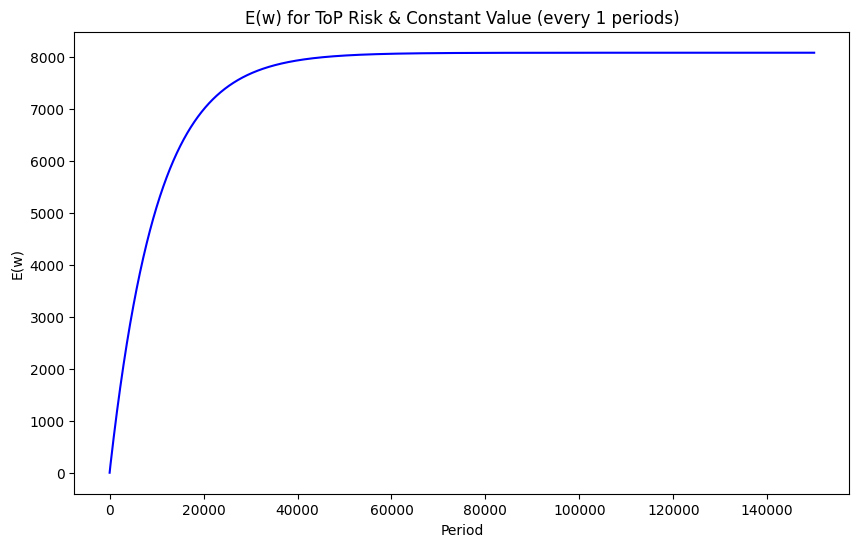

In [13]:
# Modified calculate_Ew to handle incremental Ew calculation
def calculate_Ew_incremental(prev_Ew, prev_prod_term, v_i, r_i):
    new_prod_term = prev_prod_term * (1 - r_i[-1]) # r_i[-1] notation for grabbing last element
    new_Ew = prev_Ew + new_prod_term * v_i[-1]
    return new_Ew, new_prod_term

# Quick example

# Initial setup
T = 150000
step = 1 # what we're recording for our graph
v_constant = generate_value_vector(T+1, "constant")
r_top = generate_risk_vector(T+1, "top")

# Initialize variables
Ew = 0
prod_term = 1
Ew_list = []

# Start the timer
start_time = time.time()

# Loop through each period, but only store the E(w) every 'step' periods
for t in range(1, T + 1):
    Ew, prod_term = calculate_Ew_incremental(Ew, prod_term, v_constant[t-1:t], r_top[t-1:t])
    
    # If the current period is a multiple of 'step', then store the E(w)
    if t % step == 0:
        Ew_list.append(Ew)
        
        # Print the run time up until this point
        # elapsed_time = time.time() - start_time
        # print(f"Elapsed time after {t} periods: {elapsed_time:.2f} seconds")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(step, T + 1, step), Ew_list, color='b')
plt.title(f"E(w) for ToP Risk & Constant Value (every {step} periods)")
plt.xlabel("Period")
plt.ylabel("E(w)")
plt.show()


## Convergence

It is useful to automate convergence testing of each scenario. Below we create a separate function that checks for convergence based on a given tolerance level. This function will compare the last two \( E(w) \) values and return `True` if they have converged within the tolerance or `False` otherwise. If the function returns `True`, the loop breaks, and the program will print out the period at which it converged.

Converged at period 112993, E(w)=8088.628467


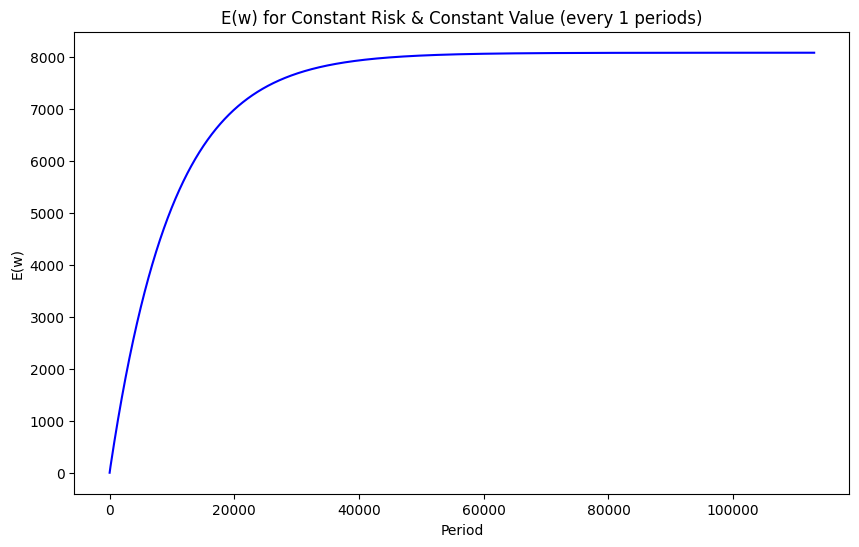

In [14]:
# Function to check for convergence
def has_converged(new_value, prev_value, tolerance=1e-5):
    if abs(new_value - prev_value) < tolerance:
        return True
    return False

# Quick example

# Initial setup
T = 150000
step = 1
tolerance = 1e-5  # Convergence tolerance
v_constant = generate_value_vector(T+1, "constant")
r_top = generate_risk_vector(T+1, "top")

# Initialize variables
Ew = 0
prod_term = 1
Ew_list = []
prev_Ew = None  # Variable to store the previous E(w) for convergence check

# Start the timer
start_time = time.time()

# Loop through each period, but only store the E(w) every 'step' periods
for t in range(1, T + 1):
    Ew, prod_term = calculate_Ew_incremental(Ew, prod_term, v_constant[t-1:t], r_top[t-1:t])

    # If the current period is a multiple of 'step', then store the E(w)
    if t % step == 0:
        Ew_list.append(Ew)

        # Convergence check
        if prev_Ew is not None:
            if has_converged(Ew, prev_Ew, tolerance):
                print(f"Converged at period {t}, E(w)={Ew:.6f}")
                break
        prev_Ew = Ew

        # Print the run time up until this point
        # elapsed_time = time.time() - start_time
        # print(f"Elapsed time after {t} periods: {elapsed_time:.2f} seconds")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(step, len(Ew_list) * step + 1, step), Ew_list, color='b')
plt.title(f"E(w) for Constant Risk & Constant Value (every {step} periods)")
plt.xlabel("Period")
plt.ylabel("E(w)")
plt.show()

Already, this feels like an insightful result. Suppose that, following the Time of Perils hypothesis, you thought that the world has a 20% chance of ending this century and then it falls to a much lower value of 1% of a catastrophe each century. Then, with constant value, the expected value of the whole of the future is 8,000 years of the value of today's world. Though constant value is an unlikely assumption, this is surprising given that the probability of surviving until an arbitrarily distant future is positive (though of course, it converges to zero, which guarantees convergence of \(E(w)\) overall).

## Grid: Scenarios of E(w)

We are now ready to combine the different cases for both risk and value. We display these various scenarios in a grid.

KeyboardInterrupt: 

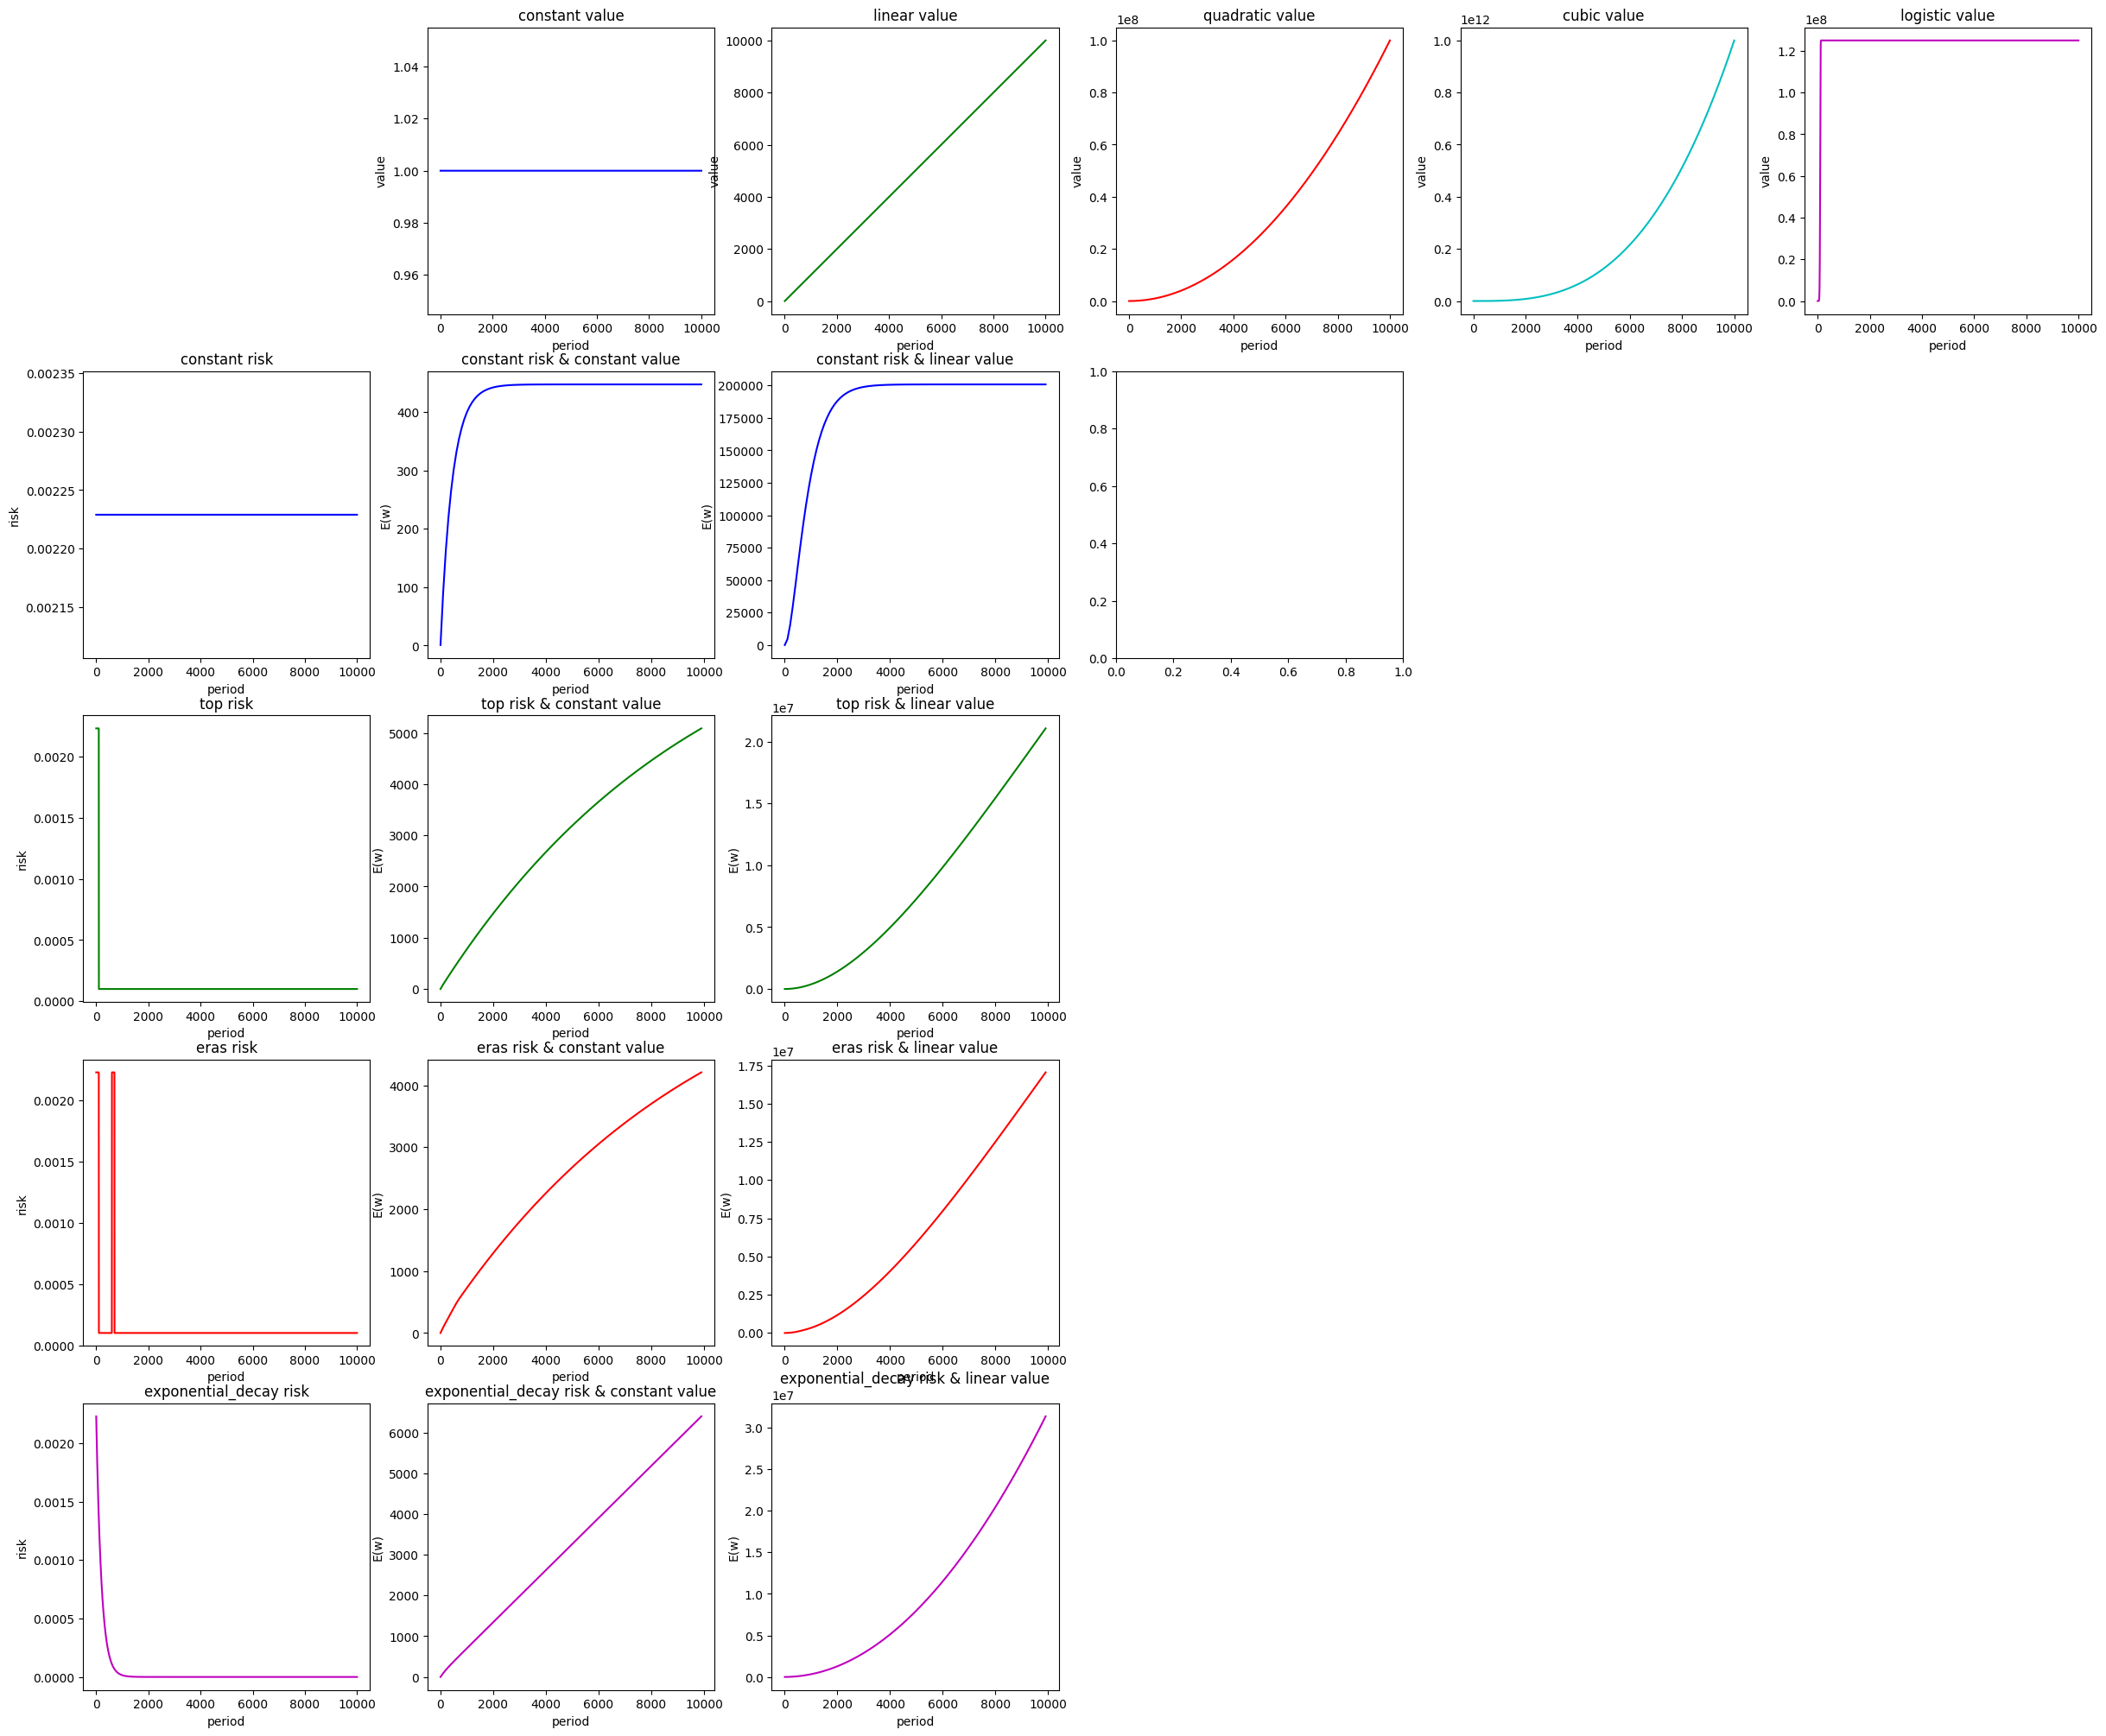

In [85]:
# Original implementation without has_converged and calculate_Ew_incremental 
# (taking around 24min to complete partial output (only constant and linear value cols) when T=10000 and step=100)

import matplotlib.pyplot as plt

T = 10000
step = 100  # Calculate E(w) every 'step' periods

value_types = ["constant", "linear", "quadratic", "cubic", "logistic"]
r_types = ["constant", "top", "eras", "exponential_decay"]

colors_value = ["b", "g", "r", "c", "m"]
colors_risk = ["b", "g", "r", "m"]

plt.figure(figsize=(30, 25))

# First row: different value vectors
for i, v_type in enumerate(value_types):
    plt.subplot(5, 6, i + 2)  # +2 to leave the first subplot empty
    v = generate_value_vector(T, v_type)
    plt.plot(range(1, T + 1), v, color=colors_value[i])
    plt.title(f"{v_type} value")
    plt.xlabel("period")
    plt.ylabel("value")

# First column: different risk vectors
for i, r_type in enumerate(r_types):
    plt.subplot(5, 6, (i + 1) * 6 + 1)
    r = generate_risk_vector(T, r_type, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001])
    plt.plot(range(1, T + 1), r, color=colors_risk[i])
    plt.title(f"{r_type} risk")
    plt.xlabel("period")
    plt.ylabel("risk")

# Middle plots: Ew for each combination of value and risk
for i, v_type in enumerate(v_types):
    for j, r_type in enumerate(r_types):
        plt.subplot(5, 6, (j + 1) * 6 + (i + 2))  # +2 to skip the first column
        v = generate_value_vector(T+1, v_type)
        r = generate_risk_vector(T+1, r_type, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001])
        Ew_list = [calculate_Ew(t, v[:t], r[:t]) for t in range(1, T + 1, step)]
        plt.plot(range(1, T + 1, step), Ew_list, color=colors_risk[j])
        plt.title(f"{r_type} r & {v_type} v")
        plt.xlabel("period")
        plt.ylabel("E(w)")

plt.tight_layout()
plt.show()


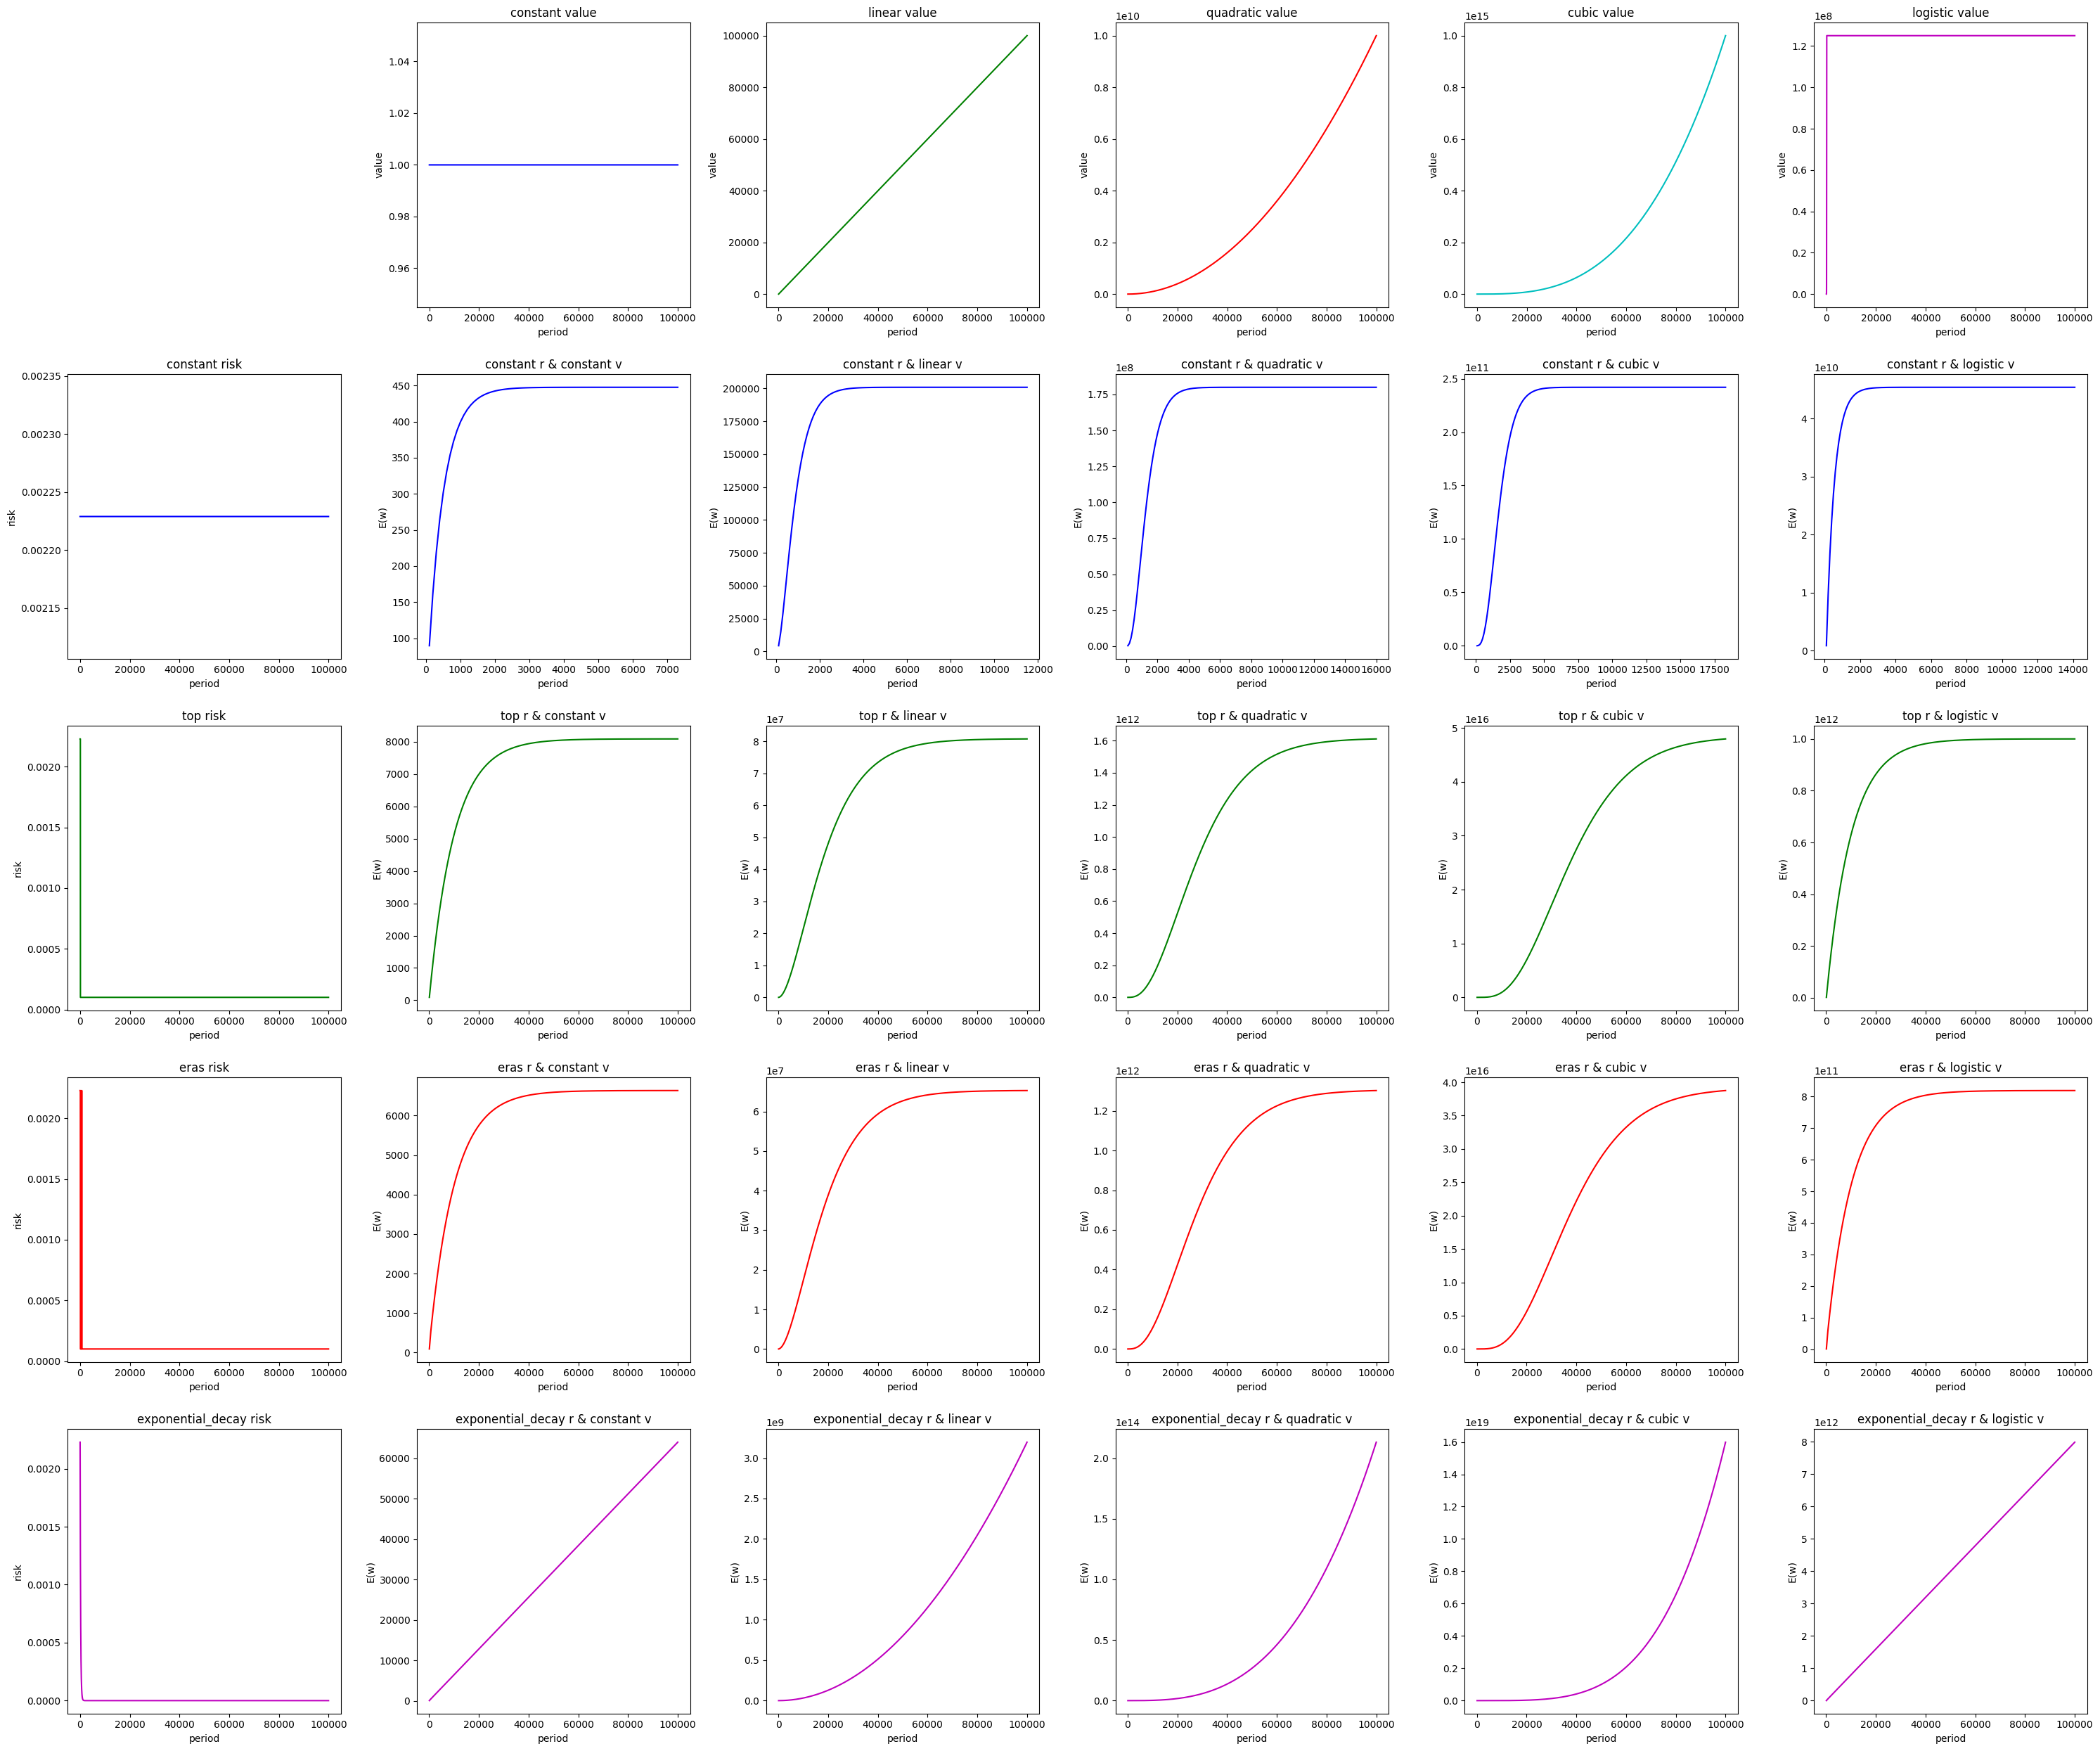

In [132]:
T = 100000
step = 100  # Calculate E(w) every 'step' periods
tolerance = 1e-5  # Convergence tolerance

value_types = ["constant", "linear", "quadratic", "cubic", "logistic"]
r_types = ["constant", "top", "eras", "exponential_decay"]

colors_value = ["b", "g", "r", "c", "m"]
colors_risk = ["b", "g", "r", "m"]

plt.figure(figsize=(30, 25))

# First row: different value vectors
for i, v_type in enumerate(value_types):
    plt.subplot(5, 6, i + 2)  # +2 to leave the first subplot empty
    v = generate_value_vector(T, v_type)
    plt.plot(range(1, T + 1), v, color=colors_value[i])
    plt.title(f"{v_type} value")
    plt.xlabel("period")
    plt.ylabel("value")

# First column: different risk vectors
for i, r_type in enumerate(r_types):
    plt.subplot(5, 6, (i + 1) * 6 + 1)
    r = generate_risk_vector(T, r_type, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001])
    plt.plot(range(1, T + 1), r, color=colors_risk[i])
    plt.title(f"{r_type} risk")
    plt.xlabel("period")
    plt.ylabel("risk")

# Middle plots: Ew for each combination of value and risk
for i, v_type in enumerate(value_types):
    for j, r_type in enumerate(r_types):
        plt.subplot(5, 6, (j + 1) * 6 + (i + 2))  # +2 to skip the first column
        v = generate_value_vector(T+1, v_type)
        r = generate_risk_vector(T+1, r_type, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001])

        Ew = 0
        prod_term = 1
        Ew_list = []
        prev_Ew = None

        for t in range(1, T + 1):
            Ew, prod_term = calculate_Ew_incremental(Ew, prod_term, v[t-1:t], r[t-1:t])

            if t % step == 0:
                Ew_list.append(Ew)

                if prev_Ew is not None and has_converged(Ew, prev_Ew, tolerance):
                    break
                
                prev_Ew = Ew

        plt.plot(range(step, len(Ew_list) * step + 1, step), Ew_list, color=colors_risk[j])
        plt.title(f"{r_type} r & {v_type} v")
        plt.xlabel("period")
        plt.ylabel("E(w)")

plt.tight_layout()
plt.show()


Much longer cap $T=1,000,000$

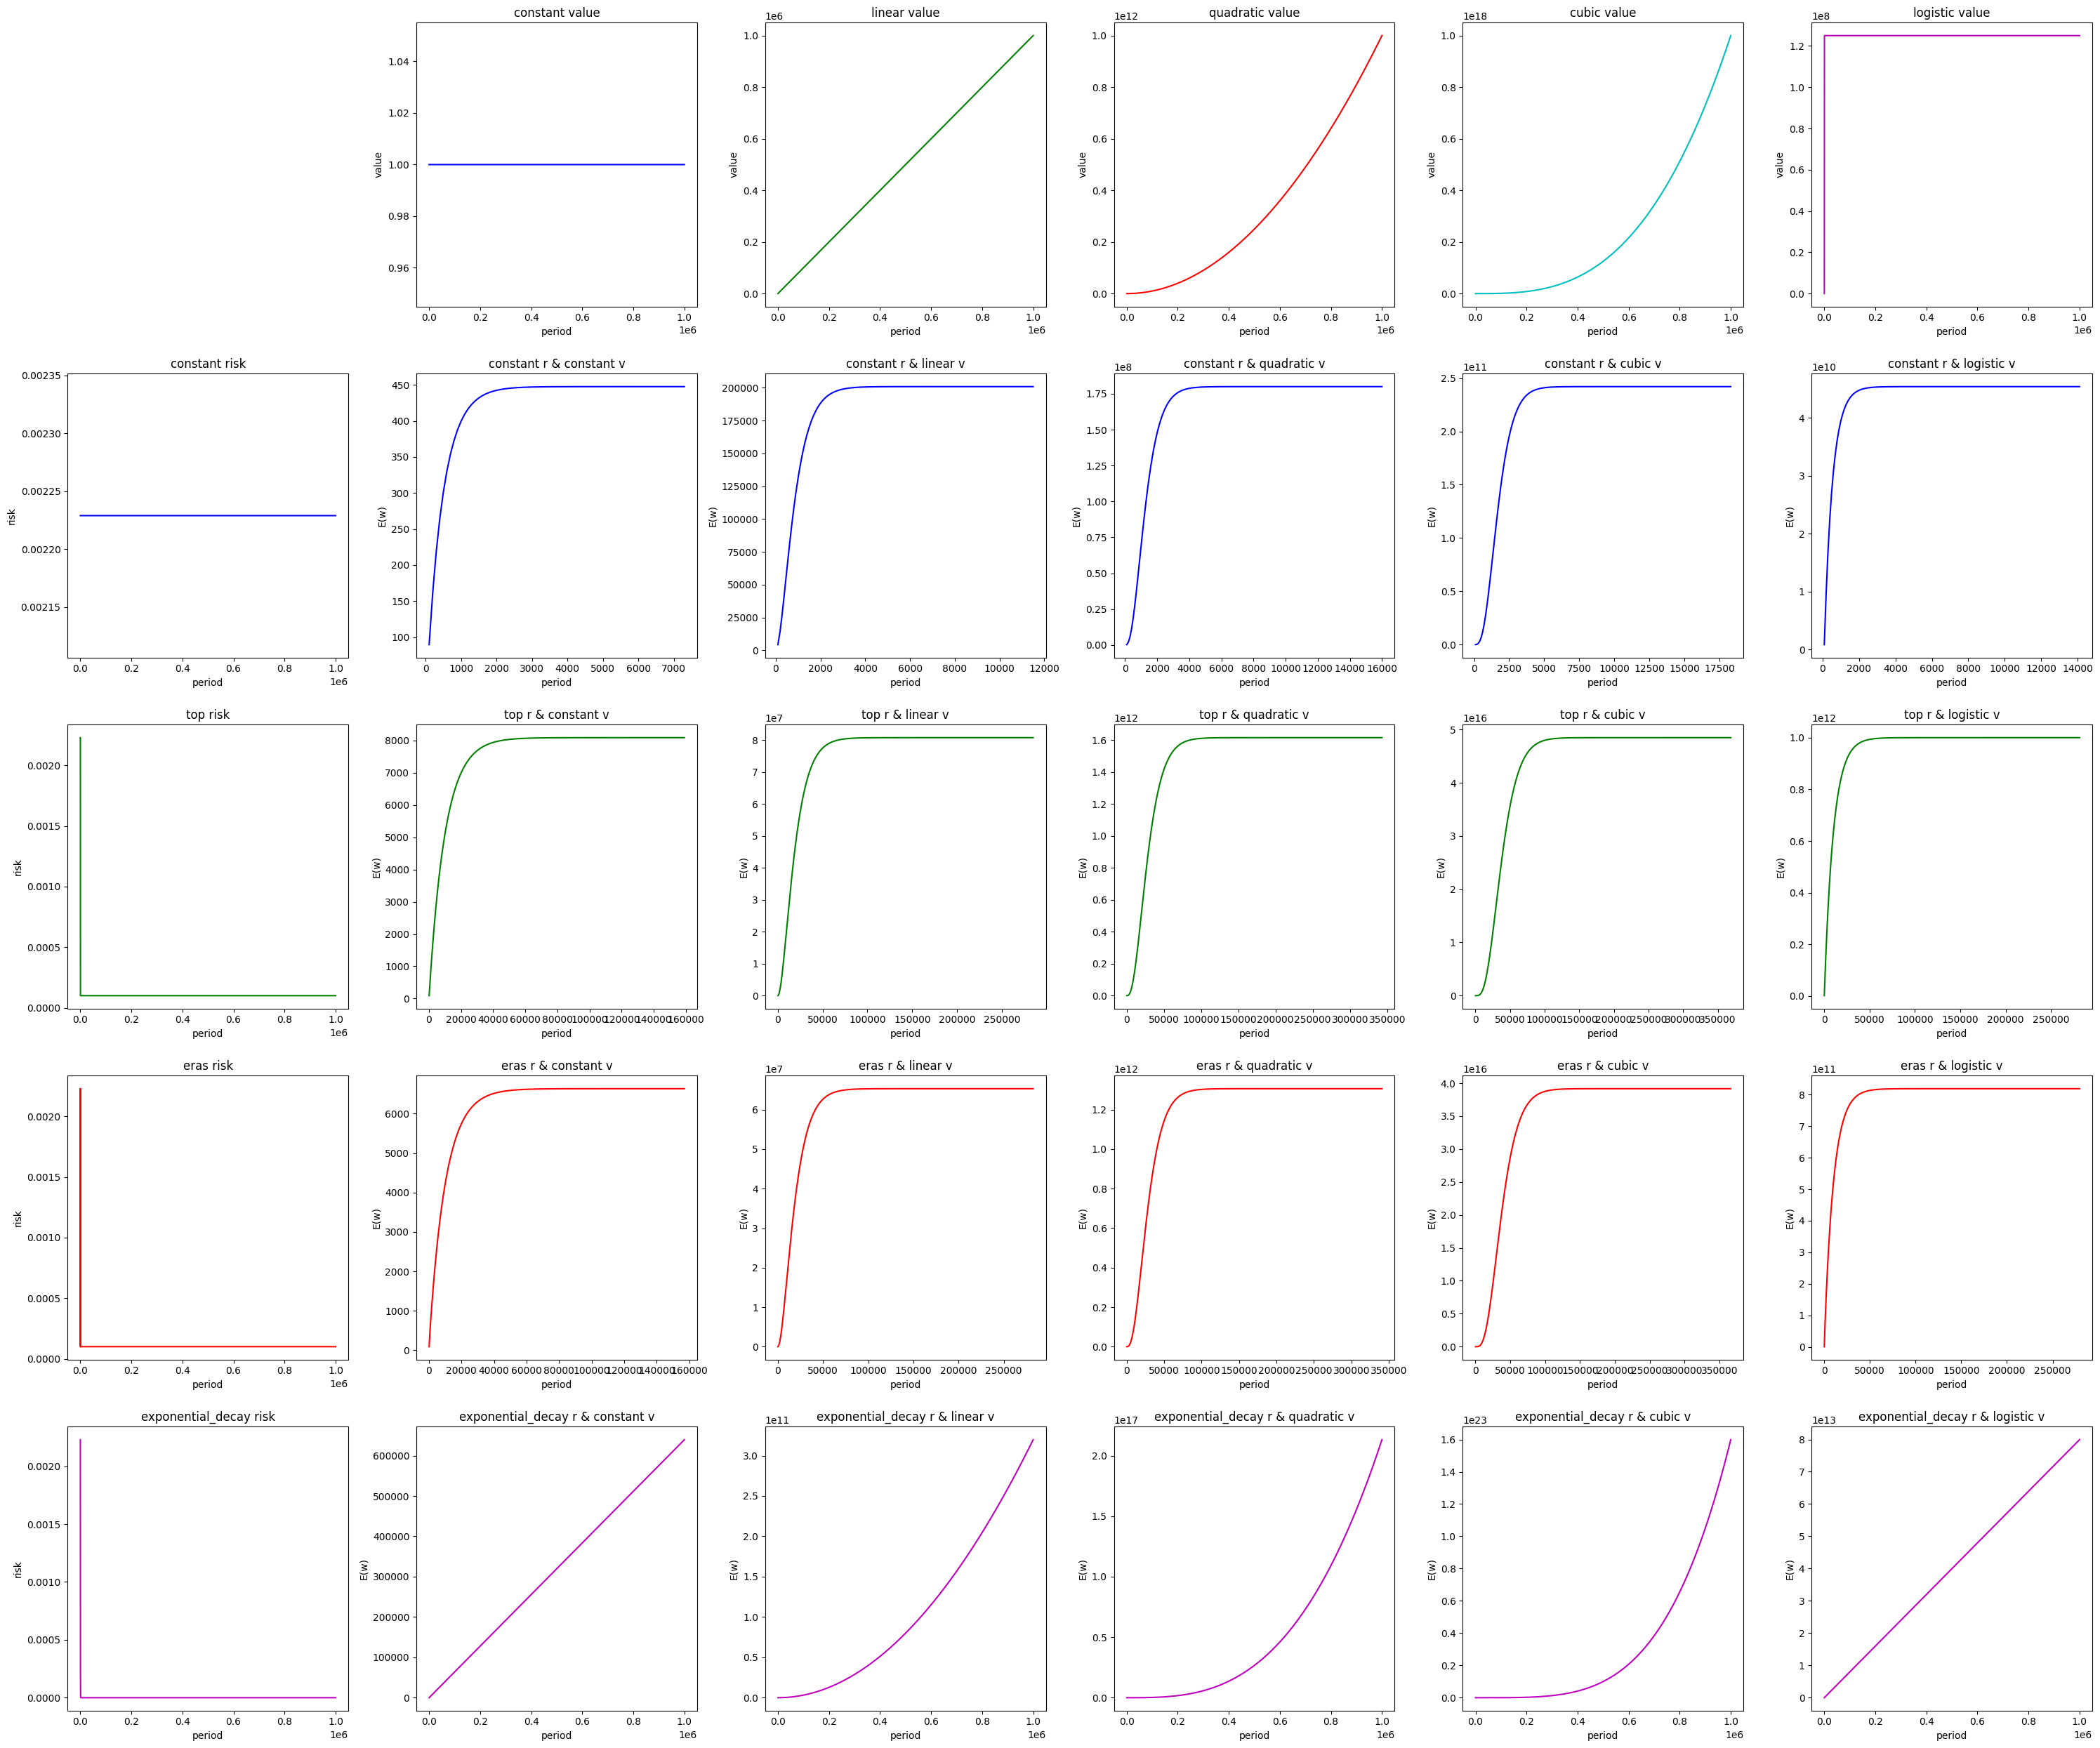

In [133]:
T = 1000000
step = 100  # Calculate E(w) every 'step' periods
tolerance = 1e-5  # Convergence tolerance

value_types = ["constant", "linear", "quadratic", "cubic", "logistic"]
r_types = ["constant", "top", "eras", "exponential_decay"]

colors_value = ["b", "g", "r", "c", "m"]
colors_risk = ["b", "g", "r", "m"]

plt.figure(figsize=(30, 25))

# First row: different value vectors
for i, v_type in enumerate(value_types):
    plt.subplot(5, 6, i + 2)  # +2 to leave the first subplot empty
    v = generate_value_vector(T, v_type)
    plt.plot(range(1, T + 1), v, color=colors_value[i])
    plt.title(f"{v_type} value")
    plt.xlabel("period")
    plt.ylabel("value")

# First column: different risk vectors
for i, r_type in enumerate(r_types):
    plt.subplot(5, 6, (i + 1) * 6 + 1)
    r = generate_risk_vector(T, r_type, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001])
    plt.plot(range(1, T + 1), r, color=colors_risk[i])
    plt.title(f"{r_type} risk")
    plt.xlabel("period")
    plt.ylabel("risk")

# Middle plots: Ew for each combination of value and risk
for i, v_type in enumerate(value_types):
    for j, r_type in enumerate(r_types):
        plt.subplot(5, 6, (j + 1) * 6 + (i + 2))  # +2 to skip the first column
        v = generate_value_vector(T+1, v_type)
        r = generate_risk_vector(T+1, r_type, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001])

        Ew = 0
        prod_term = 1
        Ew_list = []
        prev_Ew = None

        for t in range(1, T + 1):
            Ew, prod_term = calculate_Ew_incremental(Ew, prod_term, v[t-1:t], r[t-1:t])

            if t % step == 0:
                Ew_list.append(Ew)

                if prev_Ew is not None and has_converged(Ew, prev_Ew, tolerance):
                    break
                
                prev_Ew = Ew

        plt.plot(range(step, len(Ew_list) * step + 1, step), Ew_list, color=colors_risk[j])
        plt.title(f"{r_type} r & {v_type} v")
        plt.xlabel("period")
        plt.ylabel("E(w)")

plt.tight_layout()
plt.show()


# The Value of Existential Risk Mitigation

## Risk after mitigation action $M$

We now define a function that returns the $r^\prime$ risk vector after performing a mitigating action $M$.

Parameters:
- r (list): The original risk vector.
- f (float): The mitigation factor, between 0 and 1.
- P (int): The persistence of the mitigation, in periods.

Returns:
- list: The modified risk vector.

In [15]:
def apply_mitigation(r, f, P):
    # Modify a risk vector by applying a mitigation action.
    
    # Copy the original risk vector to avoid modifying it directly
    r_modified = r.copy()
    
    # Apply the mitigation factor for the first P periods
    for i in range(min(P, len(r))): # min in case P exceeds length of r
        r_modified[i] = r[i] * (1 - f)
        
    return r_modified

# Example usage:
original_risk = generate_risk_vector(r_high=0.1, r_type="constant", T=100)
mitigated_risk = apply_mitigation(original_risk, 0.2, 5) # This will reduce the risk by 20% for the first 5 periods.


# Print the original and mitigated risk vectors
print("Original risk vector for the first 10 periods:", [round(r, 8) for r in original_risk[:10]])
print("Mitigated risk vector for the first 10 periods:", [round(r, 8) for r in mitigated_risk[:10]])


Original risk vector for the first 10 periods: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Mitigated risk vector for the first 10 periods: [0.08, 0.08, 0.08, 0.08, 0.08, 0.1, 0.1, 0.1, 0.1, 0.1]


To save computational effort, it will be useful have the history of ```Ew```s for each period, so we will return that as well in a new function.

In [16]:
def calculate_Ew_vector_up_to_t (t, v, r):
    Ew = 0
    prod_term = 1
    Ew_list = []
    prev_Ew = None

    for i in range(1, t + 1):
        Ew, prod_term = calculate_Ew_incremental(Ew, prod_term, v[i-1:i], r[i-1:i])
        Ew_list.append(Ew)
    return Ew_list

# Example usage

T = 15
v_constant = generate_value_vector(T, "constant")
r_constant = generate_risk_vector(T, "constant")

print(f"The length of the E(w) vector up to period {T} is: {len(calculate_Ew_vector_up_to_t(T, v_constant, r_constant))}")
print(f"The length of the v_constant vector up to period {T} is: {len(v_constant)}")
print(f"The length of the r_constant vector up to period {T} is: {len(r_constant)}")

print(f"The E(w) vector up to period {T} is: {calculate_Ew_vector_up_to_t(T, v_constant, r_constant)}")

The length of the E(w) vector up to period 15 is: 15
The length of the v_constant vector up to period 15 is: 15
The length of the r_constant vector up to period 15 is: 15
The E(w) vector up to period 15 is: [0.9977710523, 1.9933181251078493, 2.9866461755575218, 3.9777601497337987, 4.966664982696898, 5.953365598507045, 6.937866910248993, 7.920173820056487, 8.90029121913667, 9.878223987794446, 10.853976995456765, 11.82755510069689, 12.798963151258567, 13.768205984080184, 14.735288425318842]


Given the mitigated risk vector, we can now calculate the mitigated E(M) up to each period (i.e. the value of mitigation if the universe suddenly ended $t$ periods from now). Our function calculates $ E(M) = E(w \,|\, M) - E(w) $. In this function, we will utilize the previously defined helper functions to compute $ E(w) $ with and without mitigation and then return the difference.

In [17]:
def expected_value_vector_of_M_up_to_t(T, r_type = "constant", v_type = "constant" , f = 0.5, P = 5,
                                       eras_periods = [100, 500, 100, T - 700], eras_risks = [0.0022289477, 0.0001, 0.0022289477, 0.0001]):
    
    v = generate_value_vector(T, v_type)
    r_original = generate_risk_vector(T, r_type=r_type, eras_periods=eras_periods, eras_risks=eras_risks)
    
    r_mitigated = apply_mitigation(r_original, f, P)
    
    Ew_original_vector = calculate_Ew_vector_up_to_t(T, v, r_original)
    Ew_mitigated_vector = calculate_Ew_vector_up_to_t(T, v, r_mitigated)

    # Calculate the difference E(M) = E(w | M) - E(w) for each period
    expected_value_diff_vector = np.array(Ew_mitigated_vector) - np.array(Ew_original_vector)
    
    # Test: print lengths of vectors
    # print(f"Length of Ew_original_vector: {len(Ew_original_vector)}")
    # print(f"Length of Ew_mitigated_vector: {len(Ew_mitigated_vector)}")
    # print(f"Length of expected_value_diff_vector: {len(expected_value_diff_vector)}")
    # print(f"Length of v: {len(v)}")
    # print(f"Length of r_original: {len(r_original)}")
    # print(f"Length of r_mitigated: {len(r_mitigated)}")

    return expected_value_diff_vector

# Example usage
T=15
result = expected_value_vector_of_M_up_to_t(T)
print("\n")
print(f"The expected value of M up to period {T} is: {result}")

# Can also see directly
v = generate_value_vector(T, v_type="constant")
r_original = generate_risk_vector(T, r_type="constant")
r_mitigated = apply_mitigation(r_original, f=0.5, P=5)
Ew_original_vector = calculate_Ew_vector_up_to_t(T, v, r_original)
Ew_mitigated_vector = calculate_Ew_vector_up_to_t(T, v, r_mitigated)
print(f"The original E(w) vector up to period {T} is: {Ew_original_vector}")
print(f"The mitigated E(w) vector up to period {T} is: {Ew_mitigated_vector}")

print("\n")

# Quick coomparison
print(f"The expected value of M by period {6} is: {result[5]}")
print(f"The original E(w) by period {6} is: {Ew_original_vector[5]}")
print(f"The mitigated E(w) by period {6} is: {Ew_mitigated_vector[5]}")
print(f"The difference between the mitigated and original E(w) by period {6} is: {Ew_mitigated_vector[5] - Ew_original_vector[5]}")
print(f"This is equal to the expected value of M by period {6}: {result[5]==Ew_mitigated_vector[5] - Ew_original_vector[5]}")




The expected value of M up to period 15 is: [0.00111447 0.0033397  0.00667195 0.01110753 0.01664273 0.0221656
 0.02767615 0.03317443 0.03866045 0.04413424 0.04959583 0.05504524
 0.06048251 0.06590766 0.07132072]
The original E(w) vector up to period 15 is: [0.9977710523, 1.9933181251078493, 2.9866461755575218, 3.9777601497337987, 4.966664982696898, 5.953365598507045, 6.937866910248993, 7.920173820056487, 8.90029121913667, 9.878223987794446, 10.853976995456765, 11.82755510069689, 12.798963151258567, 13.768205984080184, 14.735288425318842]
The mitigated E(w) vector up to period 15 is: [0.99888552615, 1.9966578205019623, 2.993318123723615, 3.988867675099994, 4.983307712534985, 5.975531195135747, 6.96554306348708, 7.953348247161479, 8.938951664743678, 9.922358223855145, 10.903572821178516, 11.882600342481977, 12.859445662643592, 13.834113645675577, 14.806609144748519]


The expected value of M by period 6 is: 0.02216559662870221
The original E(w) by period 6 is: 5.953365598507045
The mit

We now have all the necessary ingredients to compare the value of $M$, let's observe side-by-side the value of worlds with and without the mitigation action.

We write a function where we can specify the mitigation factor and we plot the value of the world without mitigation (as the benchmark) and with mitigation. For the mitigation case we plot the value of the world for different values of P (the number of periods for which the mitigation is applied). In particular, we plot P = 1,5,50,500,T. We use the constant risk vector and the constant value vector for this example.


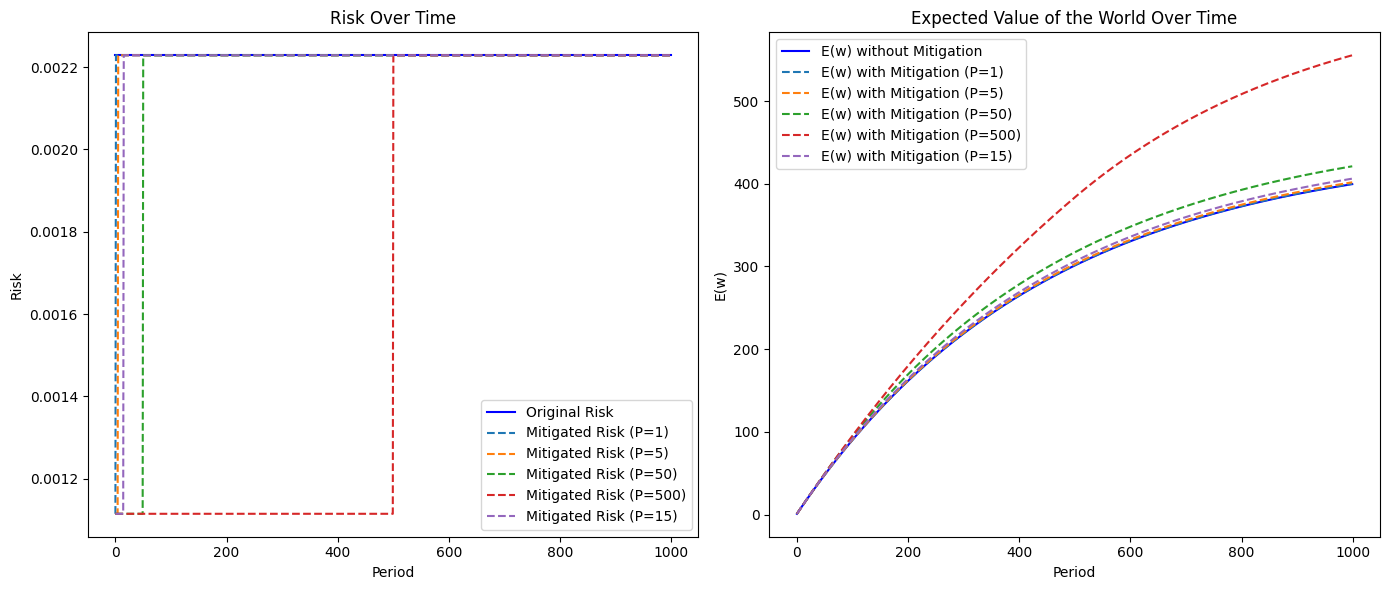

In [18]:
def plot_mitigated_vs_unmitigated_Ew(T, f, Ps=[1, 5, 50, 500, T], r_type="constant", v_type="constant"):
    # Initialize plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300) # for high resolution
    
    # Generate original risk vector
    r_original = generate_risk_vector(T, r_type=r_type)
    
    # Plot risk vectors
    axes[0].plot(r_original, label="Original Risk", color="blue")
    for P in Ps:
        r_mitigated = apply_mitigation(r_original, f, P)
        axes[0].plot(r_mitigated, linestyle="--", label=f"Mitigated Risk (P={P})")
    
    axes[0].set_title("Risk Over Time")
    axes[0].set_xlabel("Period")
    axes[0].set_ylabel("Risk")
    axes[0].legend()
    
    # Generate original value vector
    v = generate_value_vector(T, v_type=v_type)
    
    # Calculate and plot E(w) without mitigation
    Ew_original_vector = calculate_Ew_vector_up_to_t(T, v, r_original)
    axes[1].plot(Ew_original_vector, label="E(w) without Mitigation", color="blue")
    
    # Calculate and plot E(w) with mitigation
    for P in Ps:
        r_mitigated = apply_mitigation(r_original, f, P)
        Ew_mitigated_vector = calculate_Ew_vector_up_to_t(T, v, r_mitigated)
        axes[1].plot(Ew_mitigated_vector, linestyle="--", label=f"E(w) with Mitigation (P={P})")
    
    axes[1].set_title("Expected Value of the World Over Time")
    axes[1].set_xlabel("Period")
    axes[1].set_ylabel("E(w)")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
T=1000
plot_mitigated_vs_unmitigated_Ew(T, 0.5)


It is useful to cross check these results against closed form solution for constant value and constant risk 

It should match and the values that the graphs converge to. 

Let us first check the closed form solution for constant value and constant risk. We know that the expected value of the world is given by the following formula:

What about the other cases?

Converged at period 5160, E(w) with P=1 is 448.137724
Converged at period 5162, E(w) with P=5 is 450.132158
Converged at period 5185, E(w) with P=50 is 471.967128
Converged at period 5410, E(w) with P=500 is 639.382211
Converged at period 5660, E(w) with P=1000 is 749.177320


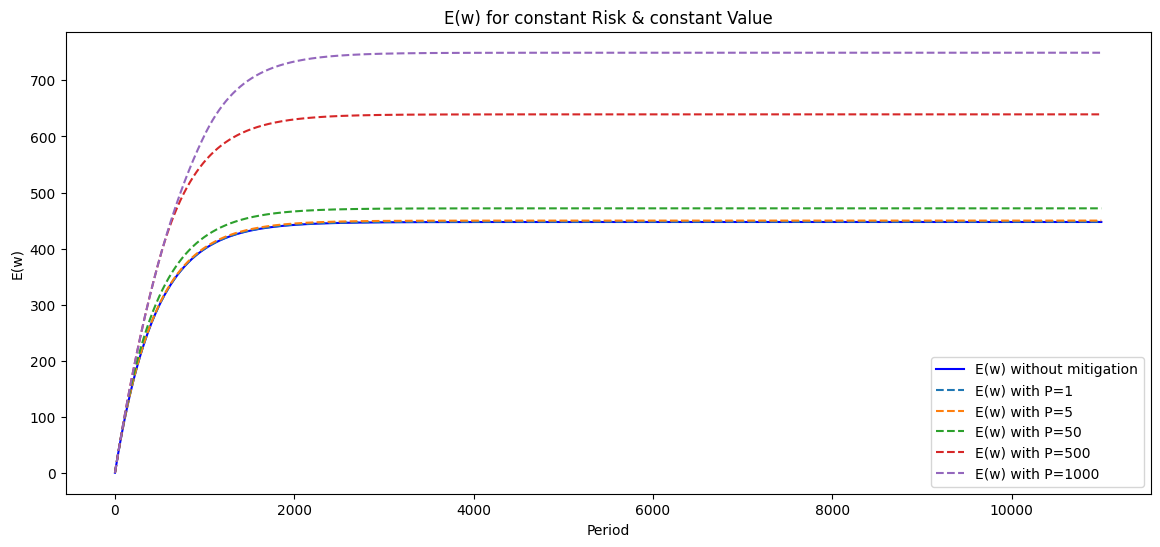

In [19]:
# Now we write code that gives us the same plots but until convergence by using the has_converged function

def plot_mitigated_vs_unmitigated_Ew_convergence(T, f=0.5, Ps=[1, 5, 50, 500, T], r_type="constant", v_type="constant", tolerance=1e-5):
    # Initialize variables
    Ew_original = 0
    prod_term_original = 1
    Ew_list_original = []
    prev_Ew_original = None

    Ew_mitigated = {P: 0 for P in Ps}
    prod_term_mitigated = {P: 1 for P in Ps}
    Ew_list_mitigated = {P: [] for P in Ps}
    prev_Ew_mitigated = {P: None for P in Ps}

    converged_flags = {P: False for P in Ps} # Flags to indicate if E(w) has converged for each P

    # Generate the constant value and risk vectors
    v = generate_value_vector(T+1, v_type=v_type)
    r_original = generate_risk_vector(T+1,r_type=r_type)

    for t in range(1, T + 1):
        # Update original E(w) values
        Ew_original, prod_term_original = calculate_Ew_incremental(Ew_original, prod_term_original, v[t-1:t], r_original[t-1:t])

        # Update mitigated E(w) values for each P
        for P in Ps:
            r_mitigated = apply_mitigation(r_original, 0.5, P)
            Ew_mitigated[P], prod_term_mitigated[P] = calculate_Ew_incremental(Ew_mitigated[P], prod_term_mitigated[P], v[t-1:t], r_mitigated[t-1:t])

        # Store and check the E(w)
        Ew_list_original.append(Ew_original)

        for P in Ps:
            Ew_list_mitigated[P].append(Ew_mitigated[P])

            if prev_Ew_mitigated[P] is not None and not converged_flags[P]:
                if has_converged(Ew_mitigated[P], prev_Ew_mitigated[P], tolerance):
                    print(f"Converged at period {t}, E(w) with P={P} is {Ew_mitigated[P]:.6f}")
                    converged_flags[P] = True

        prev_Ew_original = Ew_original
        for P in Ps:
            prev_Ew_mitigated[P] = Ew_mitigated[P]

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(range(1, len(Ew_list_original) + 1), Ew_list_original, label="E(w) without mitigation", color='b')

    for P in Ps:
        plt.plot(range(1, len(Ew_list_mitigated[P]) + 1), Ew_list_mitigated[P], linestyle="--", label=f"E(w) with P={P}")

    plt.title(f"E(w) for {r_type} Risk & {v_type} Value")
    plt.xlabel("Period")
    plt.ylabel("E(w)")
    plt.legend()
    plt.show()
    
# Example usage
T=11000
plot_mitigated_vs_unmitigated_Ew_convergence(T)


This graph seems to suggest that halving the risk globally doubles total E(w). Is there a rule of this? cf with closed form solution in thorstad

Let us do the same exercise with ToP risk vector and constant value vector


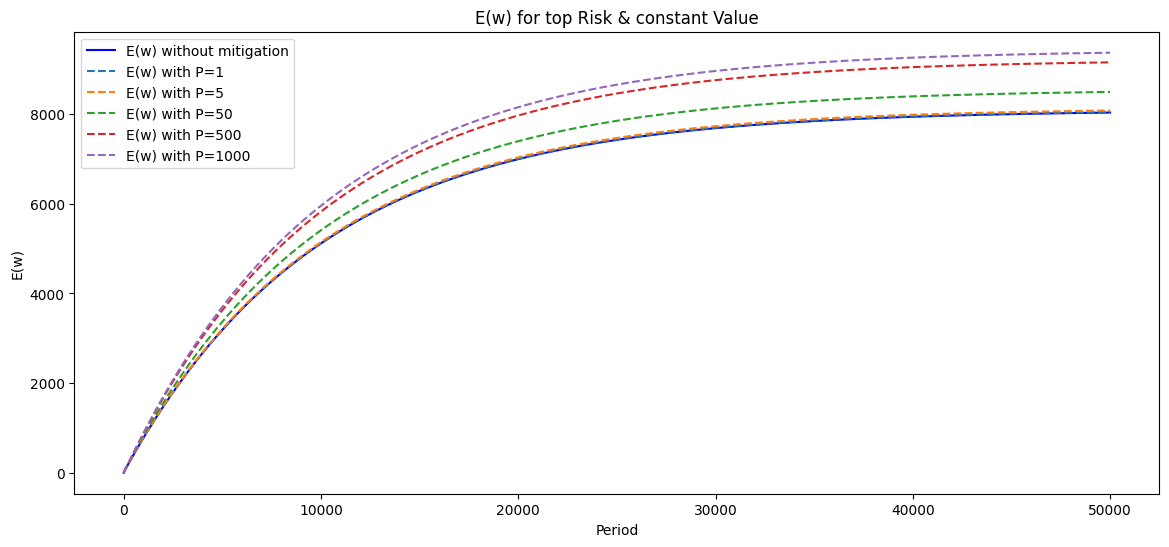

In [55]:
# Let us do the same exercise with Top risk vector and constant value vector

plot_mitigated_vs_unmitigated_Ew_convergence(T=50000, r_type="top", v_type="constant")

Let us plot the expected value of $M$ for different values of $P$. We will use the constant value vector and the constant risk vector.

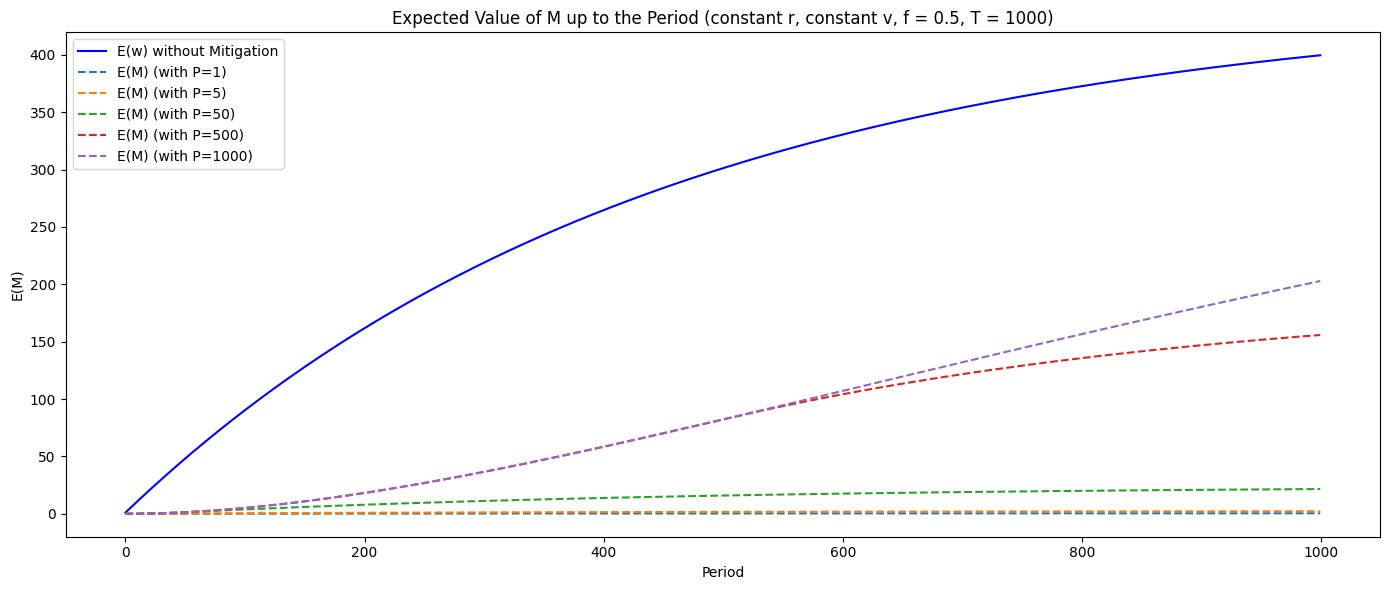

In [20]:
# Use expected_value_vector_of_M_up_to_t to calculate the expected value of M up to period T for each P then plot the results in one graph

def plot_expected_value_of_M_up_to_t(T, Ps=[1, 5, 50, 500, T], r_type="constant", v_type="constant", f=0.5):
    # Initialize plot
    fig, axes = plt.subplots(1, 1, figsize=(14, 6))
    
    # Generate original risk vector
    r_original = generate_risk_vector(T, r_type=r_type)
    
    # Generate original value vector
    v = generate_value_vector(T, v_type=v_type)
    
    # Calculate and plot E(w) without mitigation
    Ew_original_vector = calculate_Ew_vector_up_to_t(T, v, r_original)
    axes.plot(Ew_original_vector, label="E(w) without Mitigation", color="blue")
    
    #  Plot expected valye of M up to period T for each P
    for P in Ps:
        Em_vector = expected_value_vector_of_M_up_to_t(T, r_type, v_type, f=f, P=P)
        axes.plot(Em_vector, linestyle="--", label=f"E(M) (with P={P})")
    
    axes.set_title(f"Expected Value of M up to the Period ({r_type} r, {v_type} v, f = {f}, T = {T})")
    axes.set_xlabel("Period")
    axes.set_ylabel("E(M)")
    axes.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
T=1000
plot_expected_value_of_M_up_to_t(T, Ps=[1, 5, 50, 500, T], r_type="constant", v_type="constant")

Super interesting exmple. In a sense, we can already see that persistence will be a major factor in determining how valuable a mitigation action is. If the mitigation action is not persistent, then it is not very valuable. This is because the risk of extinction will return to its original value after the mitigation action is over.

In the plot above we can take $E(w)$ as the benchmark amount of value available in expectation given our present circumstances. With that in mind, when $P=1,5,50$ the value of $M$ is simply not on the scale of $E(w)$, let alone on an _astronomical_ scale. However, when $P=500, T$ the value of $M$ is on the order of magnitude of of $E(w)$. Next, let us examine convergence and then test a different case: Great Filters, with $F=2$.

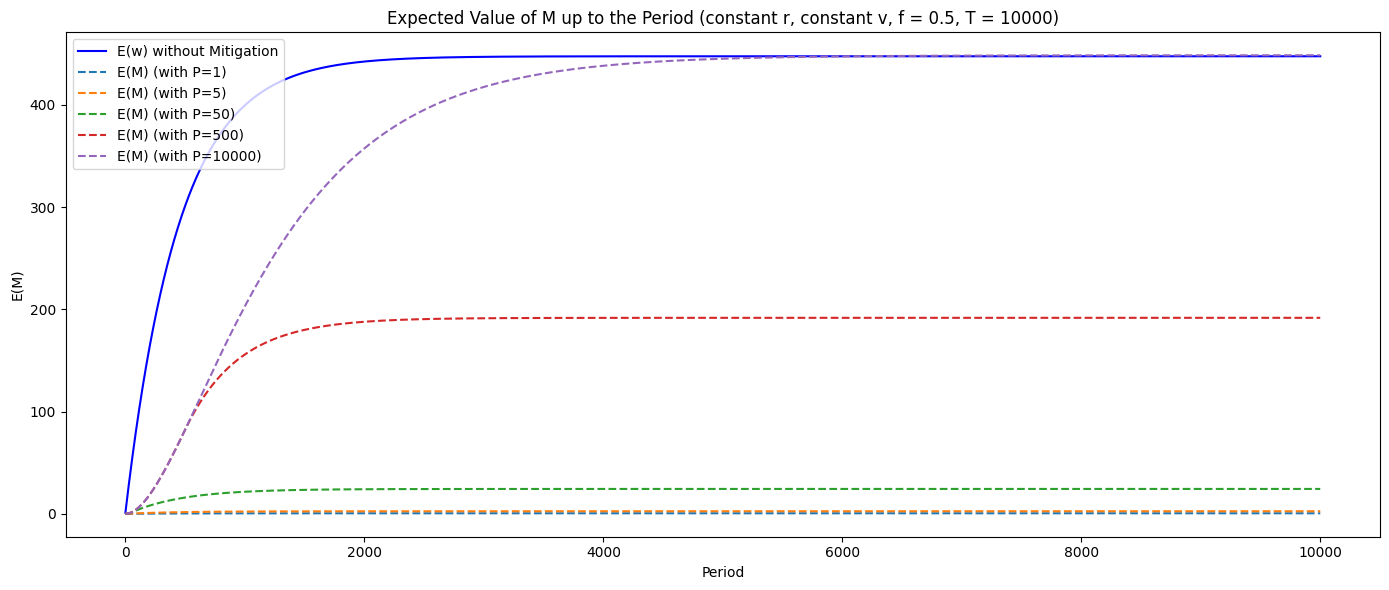

In [17]:
T=10000
plot_expected_value_of_M_up_to_t(T, Ps=[1, 5, 50, 500, T], r_type="constant", v_type="constant")

The graph above would suggest that the only reason global risk reduction isn't astronomically valuable is because it E(w) wasn't astronomically valuable in the first place. Otherwise, at least in this case, it seems like $M$ would deserve as much counterfactual credit as the value of the world itself.

Now let us fix the persistence $P$ and try with different values of $f$.

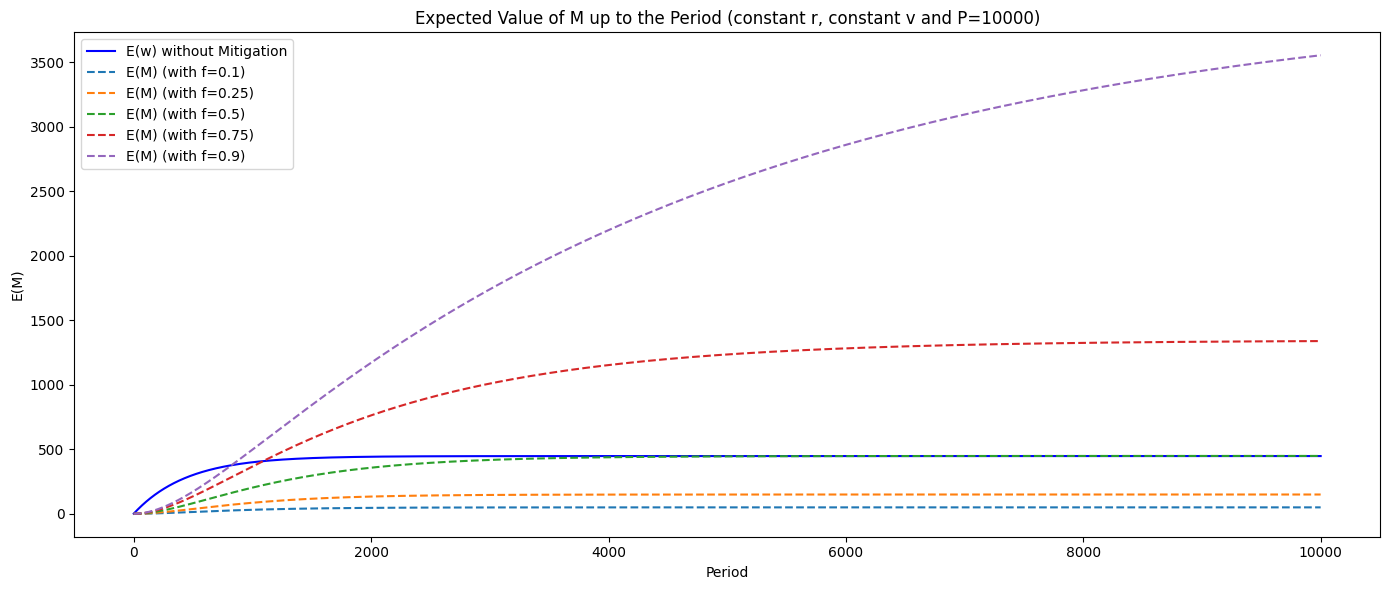

Final E(M) values for each f: [49.849132487922645, 149.54736776806237, 448.6293281073746, 1339.1189960537124, 3555.081552227348]
Ratio of E(M) to E(w) for f=0.1: 0.11135932333620967
Ratio of E(M) to E(w) for f=0.25: 0.3340779036705903
Ratio of E(M) to E(w) for f=0.5: 1.0022051721545928
Ratio of E(M) to E(w) for f=0.75: 2.991494090761462
Ratio of E(M) to E(w) for f=0.9: 7.941792691317049


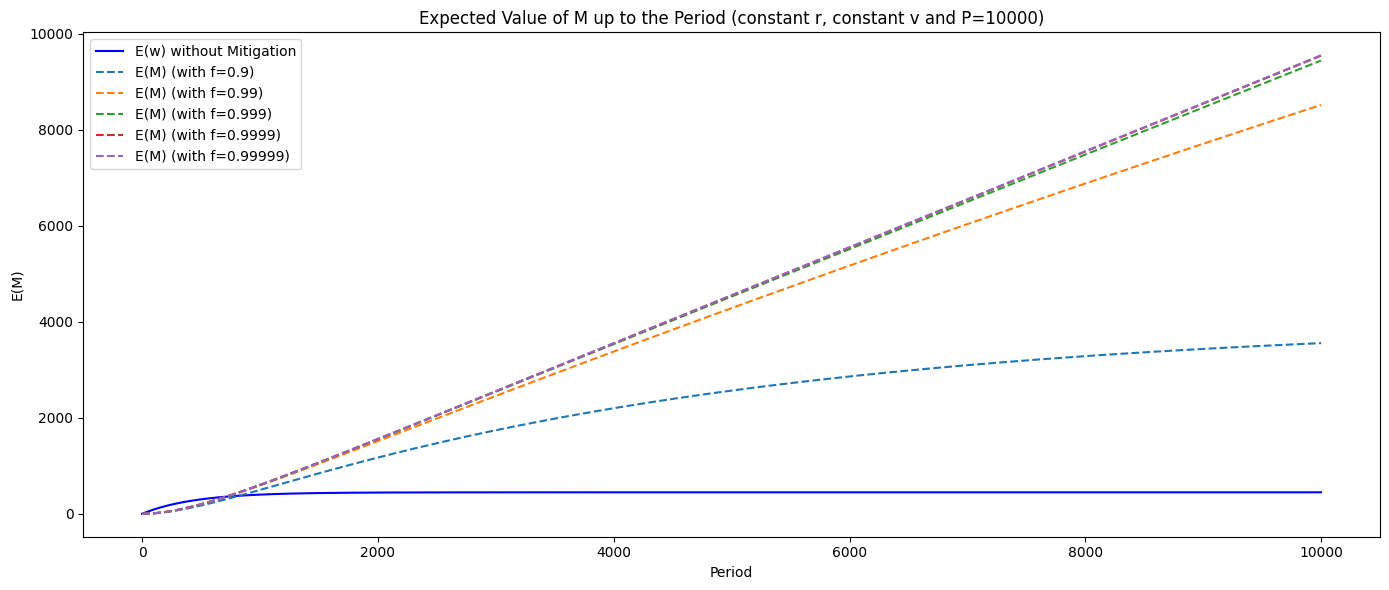

Final E(M) values for each f: [3555.081552227348, 8516.160965572653, 9441.722712194562, 9541.220222769885, 9551.243297506639]
Ratio of E(M) to E(w) for f=0.9: 7.941792691317049
Ratio of E(M) to E(w) for f=0.99: 19.024481976254613
Ratio of E(M) to E(w) for f=0.999: 21.092119358603593
Ratio of E(M) to E(w) for f=0.9999: 21.31438953459893
Ratio of E(M) to E(w) for f=0.99999: 21.336780351945723


In [19]:
#Try again with differnt values of f
# We plot the expected value of M up to period T for each f
# This time we use the same P=T for all f

def plot_expected_value_of_M_up_to_t_different_fs(T, fs=[0.1, 0.3, 0.5, 0.7, 0.9], r_type="constant", v_type="constant", r_high=, P=T, hide_benchmark=False, hide_ratios=False):
    # Initialize plot
    fig, axes = plt.subplots(1, 1, figsize=(14, 6))
    
    # Empty list for storing final E(M) values for each f
    final_Em = []
    
    # Generate original risk vector
    r_original = generate_risk_vector(T, r_type=r_type)
    
    # Generate original value vector
    v = generate_value_vector(T, v_type=v_type)
    
    # Calculate and plot E(w) without mitigation
    Ew_original_vector = calculate_Ew_vector_up_to_t(T, v, r_original)
    if not hide_benchmark: # If hide_benchmark is False, then plot the benchmark E(w) too
        axes.plot(Ew_original_vector, label="E(w) without Mitigation", color="blue")
    
    #  Plot expected valye of M up to period T for each f
    for f in fs:
        Em_vector = expected_value_vector_of_M_up_to_t(T, r_type, v_type, f=f, P=P)
        axes.plot(Em_vector, linestyle="--", label=f"E(M) (with f={f})")
        final_Em.append(Em_vector[-1])
    
    axes.set_title(f"Expected Value of M up to the Period ({r_type} r, {v_type} v and P={P})")
    axes.set_xlabel("Period")
    axes.set_ylabel("E(M)")
    axes.legend()
    
    plt.tight_layout()
    plt.show()
    
    # It's interesting to calculate some ratios of E(M) wrt E(w) for each f
    print(f"Final E(M) values for each f: {final_Em}")
    if not hide_ratios:
        for i, f in enumerate(fs):
            print(f"Ratio of E(M) to E(w) for f={f}: {final_Em[i]/Ew_original_vector[-1]}")
    

# Example usage
T=10000
plot_expected_value_of_M_up_to_t_different_fs(T, fs=[0.1, 0.25, 0.5, 0.75, 0.9], r_type="constant", v_type="constant")

# And with really high f values
# T=5000000 #30s to run
T=10000
plot_expected_value_of_M_up_to_t_different_fs(T, fs=[0.9, 0.99, 0.999, 0.9999, 0.99999], r_type="constant", v_type="constant")

It's interesting to see that the $f=0.5$ case converges to benchmark. That is, the value of the mitigation action with $P=T$ is the same as $E(w)$ the value of the future without mitigation. 

- To do: Let us quickly check whether that depends on the risk level.
    - This requires altering functions above so they can take customised r_high, which would be good. They should have all the options for full customisability.

From Thorstad, we know that $E(M)$ in the $P=1$ case when risk and value are constant is given by $E(M) = fv$. That is, value should be capped at $v$ as $f \to 1$. The plots below confirm this.

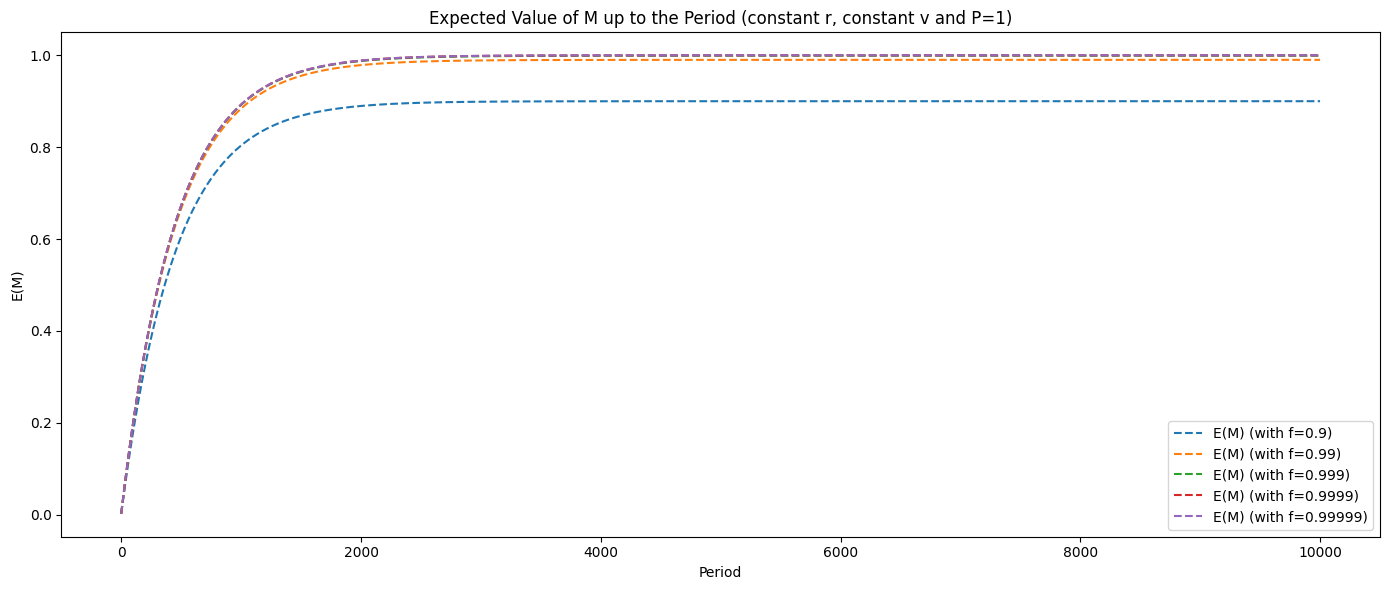

In [81]:
plot_expected_value_of_M_up_to_t_different_fs(10000, fs=[0.9, 0.99, 0.999, 0.9999, 0.99999], r_type="constant", v_type="constant", P=1, hide_benchmark=True)

## Grid: Scenarios of E(M)

First, based on ```plot_mitigated_vs_unmitigated_Ew_convergence```, we define a new function that plots the convergence of $E(M)$ for different values of $P$ and can be used in our grid.

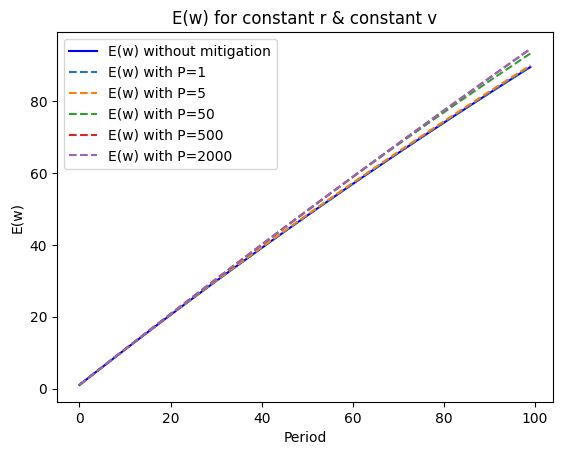

In [36]:
def middle_plot_mitigated_vs_unmitigated_Em_convergence(T, f=0.5, Ps=[1, 5, 50, 500, T], r_type="constant", v_type="constant", tolerance=1e-5, eras_periods=[100, 500, 100, T - 700], eras_risks=[0.0022289477, 0.0001, 0.0022289477, 0.0001], axes=None):
    if axes is None:
        fig, axes = plt.subplots()

    # Initialize variables
    Ew_original = 0
    prod_term_original = 1
    Ew_list_original = []
    prev_Ew_original = None

    Ew_mitigated = {P: 0 for P in Ps}
    prod_term_mitigated = {P: 1 for P in Ps}
    Ew_list_mitigated = {P: [] for P in Ps}
    prev_Ew_mitigated = {P: None for P in Ps}

    converged_flags = {P: False for P in Ps} # Flags to indicate if E(w) has converged for each P

    # Generate the constant value and risk vectors
    v = generate_value_vector(T+1, v_type=v_type)
    r_original = generate_risk_vector(T+1,r_type=r_type, eras_periods=eras_periods, eras_risks=eras_risks)

    for t in range(1, T + 1):
        # Update original E(w) values
        Ew_original, prod_term_original = calculate_Ew_incremental(Ew_original, prod_term_original, v[t-1:t], r_original[t-1:t])

        # Update mitigated E(w) values for each P
        for P in Ps:
            r_mitigated = apply_mitigation(r_original, 0.5, P)
            Ew_mitigated[P], prod_term_mitigated[P] = calculate_Ew_incremental(Ew_mitigated[P], prod_term_mitigated[P], v[t-1:t], r_mitigated[t-1:t])

        # Store and check the E(w)
        Ew_list_original.append(Ew_original)

        for P in Ps:
            Ew_list_mitigated[P].append(Ew_mitigated[P])

            if prev_Ew_mitigated[P] is not None and not converged_flags[P]:
                if has_converged(Ew_mitigated[P], prev_Ew_mitigated[P], tolerance):
                    print(f"{r_type} r and {v_type} v converged at period {t}, E(w) with P={P} is {Ew_mitigated[P]:.6f}")
                    converged_flags[P] = True

        prev_Ew_original = Ew_original
        for P in Ps:
            prev_Ew_mitigated[P] = Ew_mitigated[P]

   # Plot
    axes.plot(Ew_list_original, label="E(w) without mitigation", color='b')
    
    for P in Ps:
        axes.plot(Ew_list_mitigated[P], linestyle="--", label=f"E(w) with P={P}")

    axes.set_title(f"E(w) for {r_type} r & {v_type} v")
    if r_type == "eras":
        # axes.axvspan(eras_periods[0], eras_periods[1], color='red', alpha=0.5)
        # axes.axvspan(eras_periods[3], eras_periods[3], color='blue', alpha=0.5)
        axes.set_title(f"Great Filters, F={int(len(eras_periods)/2)} & {v_type} v")
    axes.set_xlabel("Period")
    axes.set_ylabel("E(w)")
    axes.legend()




    
# Test usage
T=100
middle_plot_mitigated_vs_unmitigated_Em_convergence(T, f=0.5, r_type="constant", v_type="constant")
plt.show()


In [ ]:
Test usage under eras.

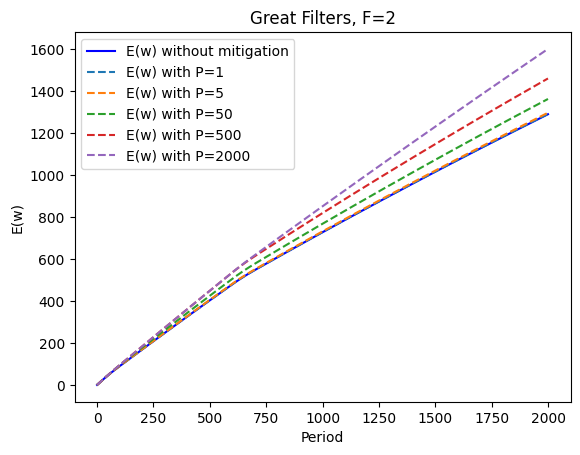

In [37]:
#  Test usage under eras.
T=2000
middle_plot_mitigated_vs_unmitigated_Em_convergence(T, f=0.5, r_type="eras", v_type="constant")

We are now ready to evaluate $E(M)$ under the different cases for both risk and value. We display these various scenarios in a grid.

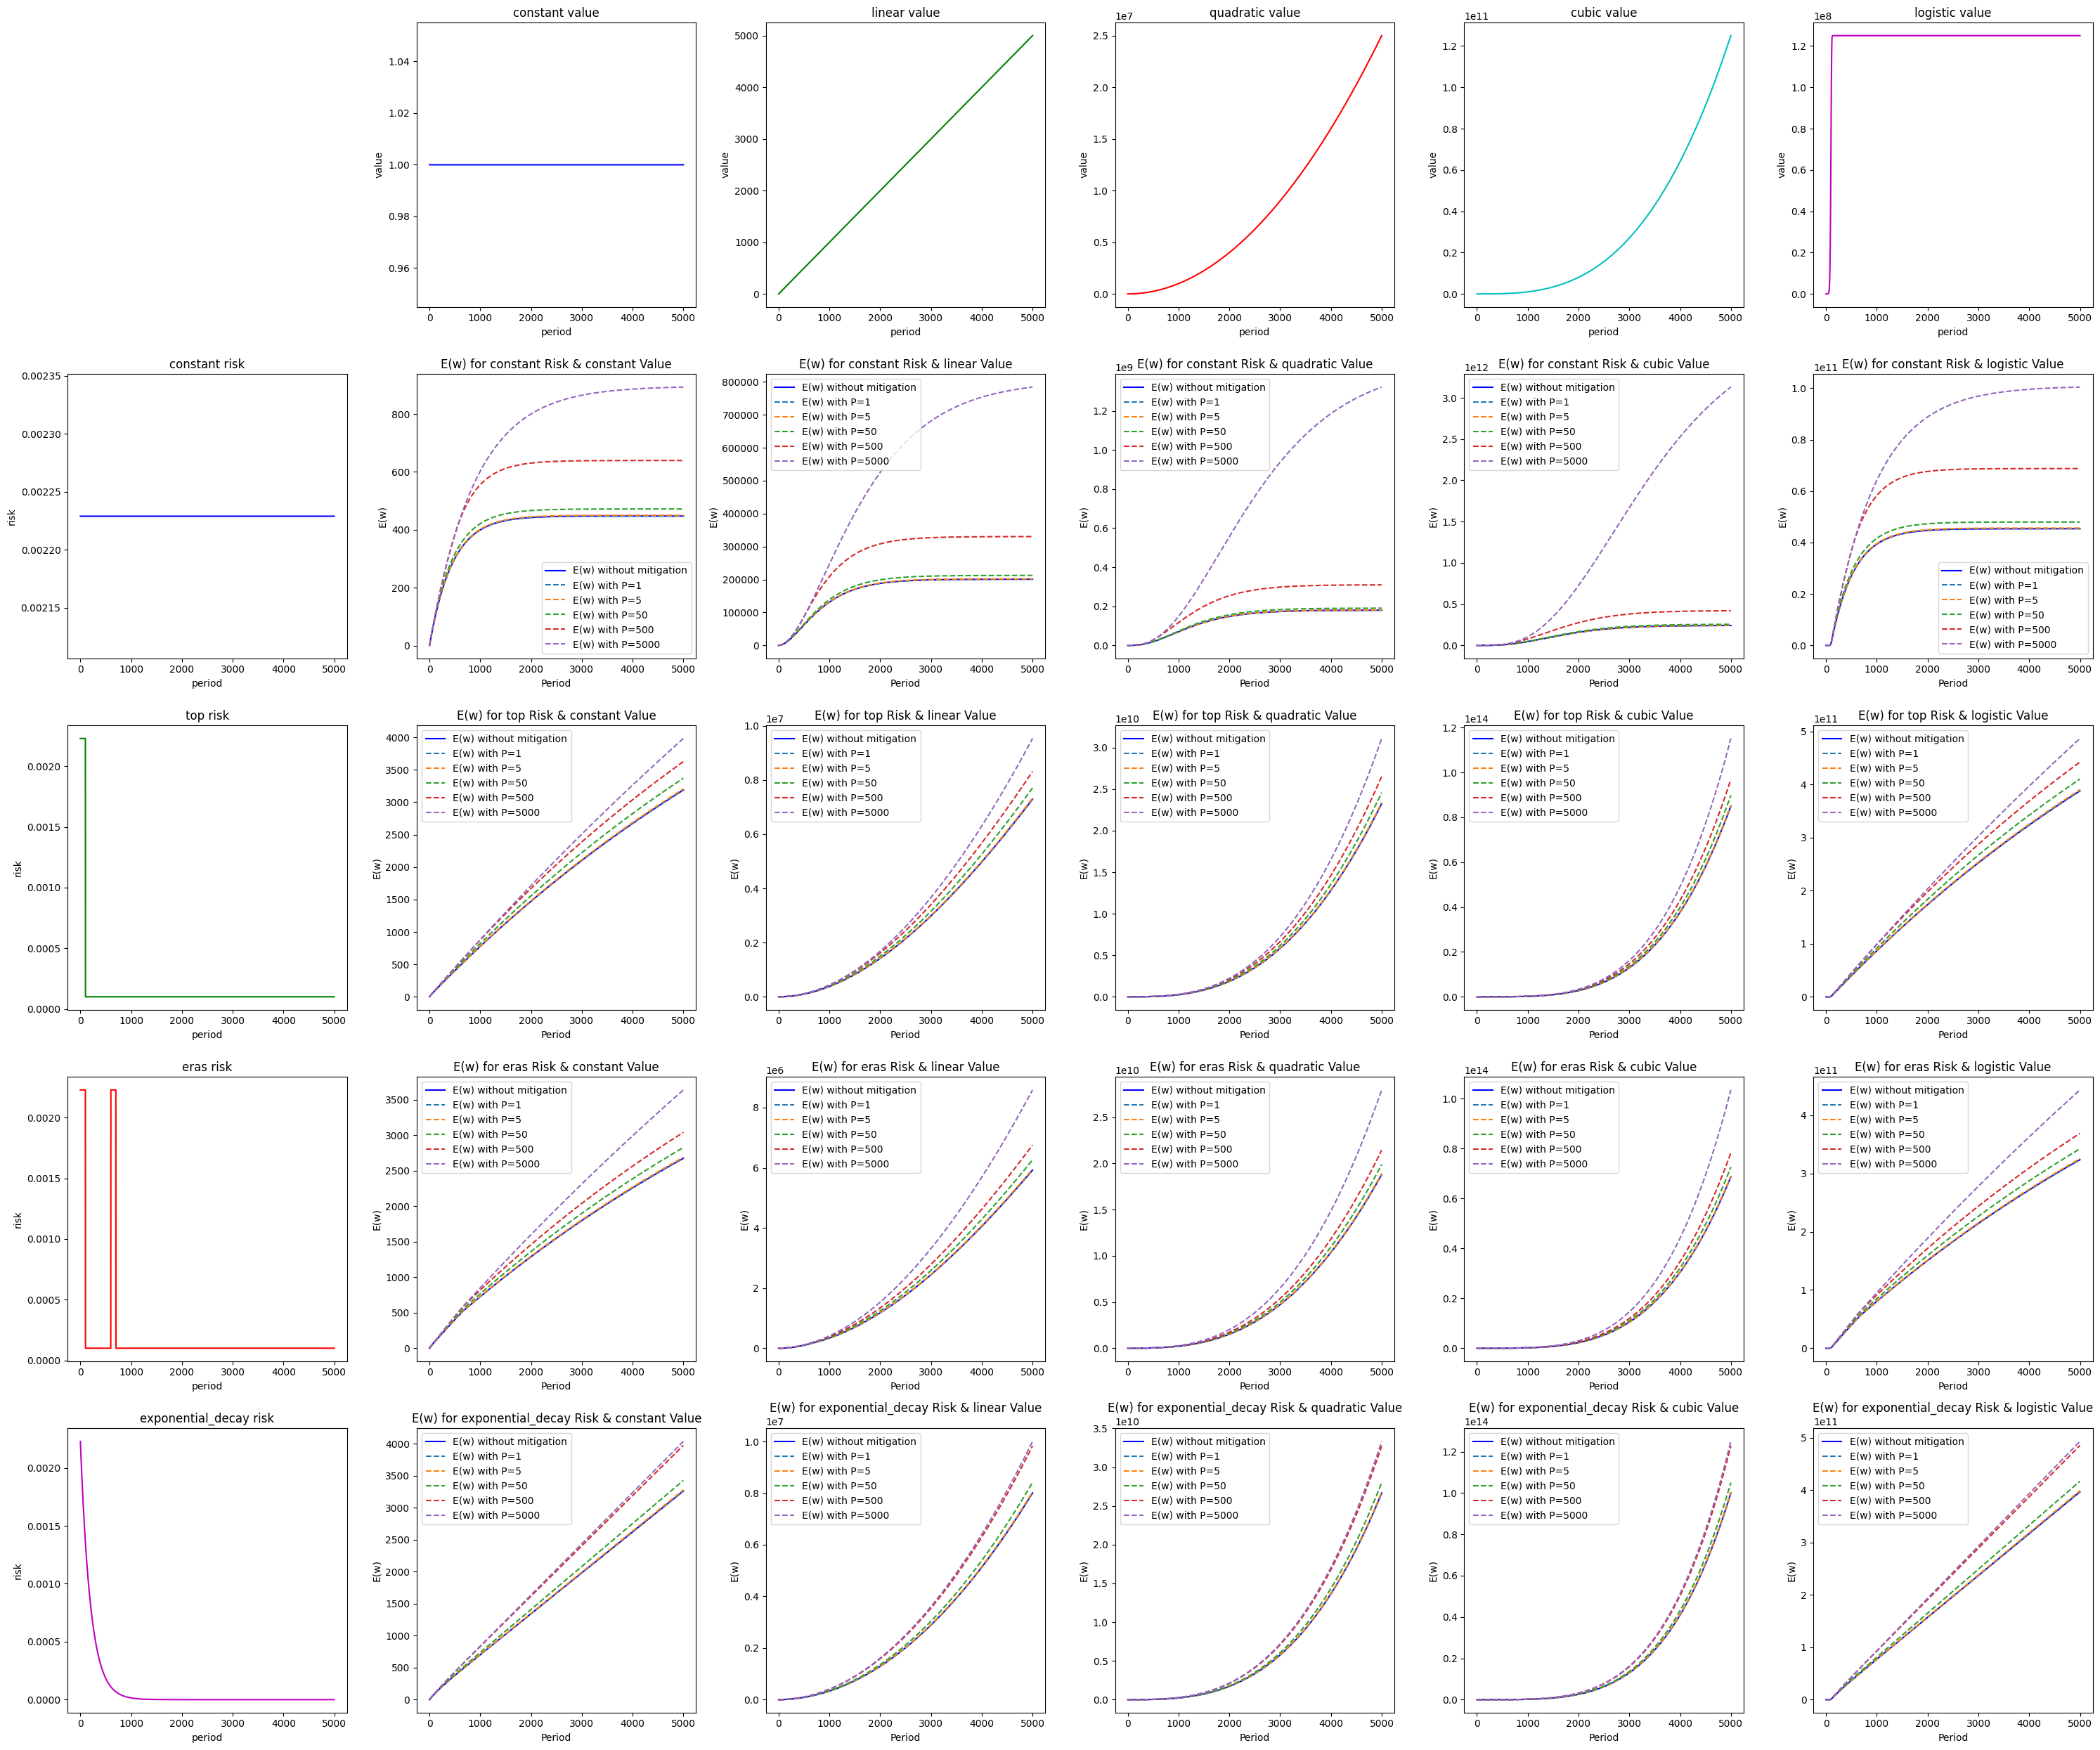

In [54]:
def plot_grid_Em(T=5000, tolerance=1e-5):
    
    # Eras parameters
    eras_periods_here=[100, 500, 100, T - 700]
    eras_risks_here=[0.0022289477, 0.0001, 0.0022289477, 0.0001]

    # Generate the plot
    value_types = ["constant", "linear", "quadratic", "cubic", "logistic"]
    r_types = ["constant", "top", "eras", "exponential_decay"]
    Ps = [1, 5, 50, 500, T]  # We'll calculate E(M) for each of these values of P

    colors_value = ["b", "g", "r", "c", "m"]
    colors_risk = ["b", "g", "r", "m"]

    fig, all_axes = plt.subplots(5, 6, figsize=(30, 25))
    
    # Turn off the axis for the top-left subplot.
    all_axes[0, 0].axis('off')

    # First row: different value vectors
    for i, v_type in enumerate(value_types):
        axes = all_axes[0, i + 1]
        v = generate_value_vector(T, v_type)
        axes.plot(v, color=colors_value[i])
        axes.set_title(f"{v_type} value")
        axes.set_xlabel("period")
        axes.set_ylabel("value")

    # First column: different risk vectors
    for i, r_type in enumerate(r_types):
        axes = all_axes[i + 1, 0]
        r = generate_risk_vector(T, r_type, eras_periods=eras_periods_here, eras_risks=eras_risks_here)
        axes.plot(r, color=colors_risk[i]) # previously: plt.plot(range(1, T + 1), r, color=colors_risk[i]) for plotting against period earlier (shifted by 1)
        axes.set_title(f"{r_type} risk")
        axes.set_xlabel("period")
        axes.set_ylabel("risk")

    # Middle plots: E(M) for each combination of value and risk
    for i, v_type in enumerate(value_types):
        for j, r_type in enumerate(r_types):
            axes = all_axes[j + 1, i + 1]
            middle_plot_mitigated_vs_unmitigated_Em_convergence(T, Ps=Ps, r_type=r_type, v_type=v_type, tolerance=tolerance, eras_periods=eras_periods_here, eras_risks=eras_risks_here, axes=axes)
            
    plt.tight_layout()
    plt.show()

plot_grid_Em()

# on my computer, it takes about 1 minute to run plot_grid_Em(T=50000)

constant r and constant v converged at period 5160, E(w) with P=1 is 448.137724
constant r and constant v converged at period 5162, E(w) with P=5 is 450.132158
constant r and constant v converged at period 5185, E(w) with P=50 is 471.967128
constant r and constant v converged at period 5410, E(w) with P=500 is 639.382211
constant r and linear v converged at period 9253, E(w) with P=1 is 201055.497906
constant r and linear v converged at period 9255, E(w) with P=5 is 201955.268394
constant r and linear v converged at period 9279, E(w) with P=50 is 212336.792781
constant r and linear v converged at period 9515, E(w) with P=500 is 330264.573089


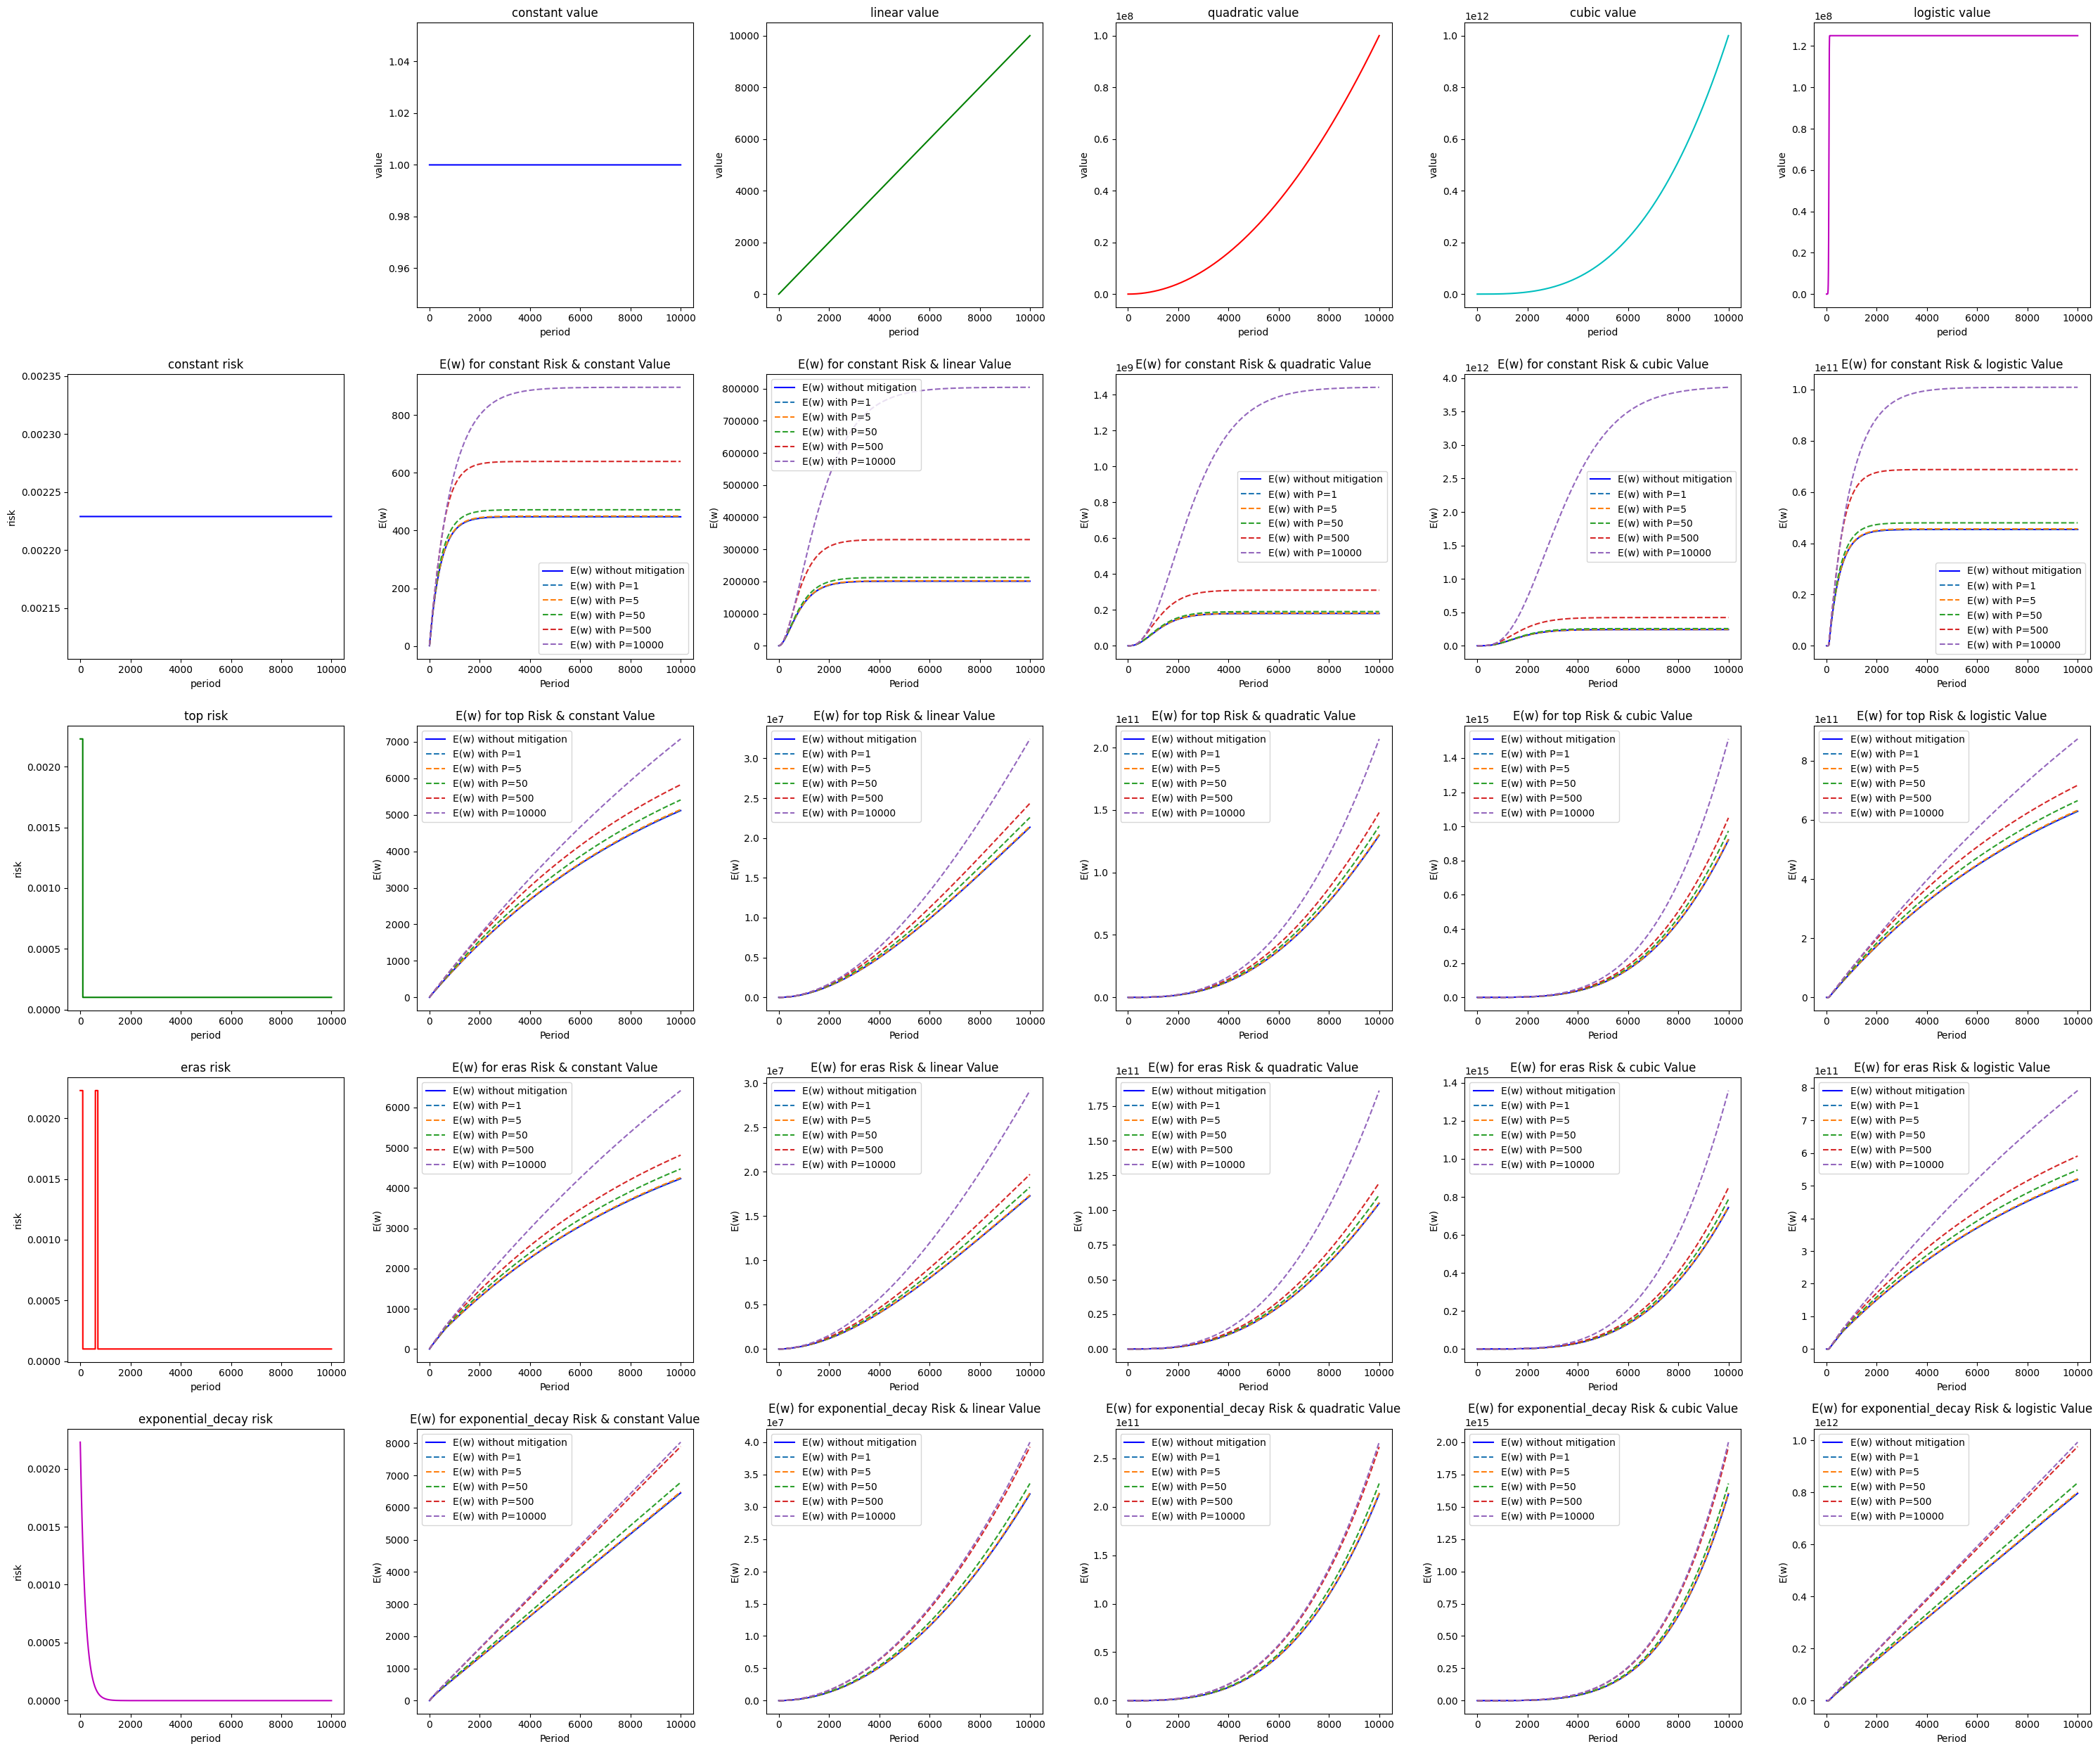

In [55]:
# let us try with a more ambitious T

plot_grid_Em(T=10000)

# on my computer, it takes about 3 minutes to run plot_grid_Em(T=10000)

constant r and constant v converged at period 5160, E(w) with P=1 is 448.137724
constant r and constant v converged at period 5162, E(w) with P=5 is 450.132158
constant r and constant v converged at period 5185, E(w) with P=50 is 471.967128
constant r and constant v converged at period 5410, E(w) with P=500 is 639.382211
constant r and constant v converged at period 10325, E(w) with P=100000 is 896.275441
constant r and linear v converged at period 9253, E(w) with P=1 is 201055.497906
constant r and linear v converged at period 9255, E(w) with P=5 is 201955.268394
constant r and linear v converged at period 9279, E(w) with P=50 is 212336.792781
constant r and linear v converged at period 9515, E(w) with P=500 is 330264.573089
constant r and linear v converged at period 19168, E(w) with P=100000 is 804222.001004
constant r and quadratic v converged at period 13698, E(w) with P=1 is 180202910.540012
constant r and quadratic v converged at period 13700, E(w) with P=5 is 181009380.721065
c

KeyboardInterrupt: 

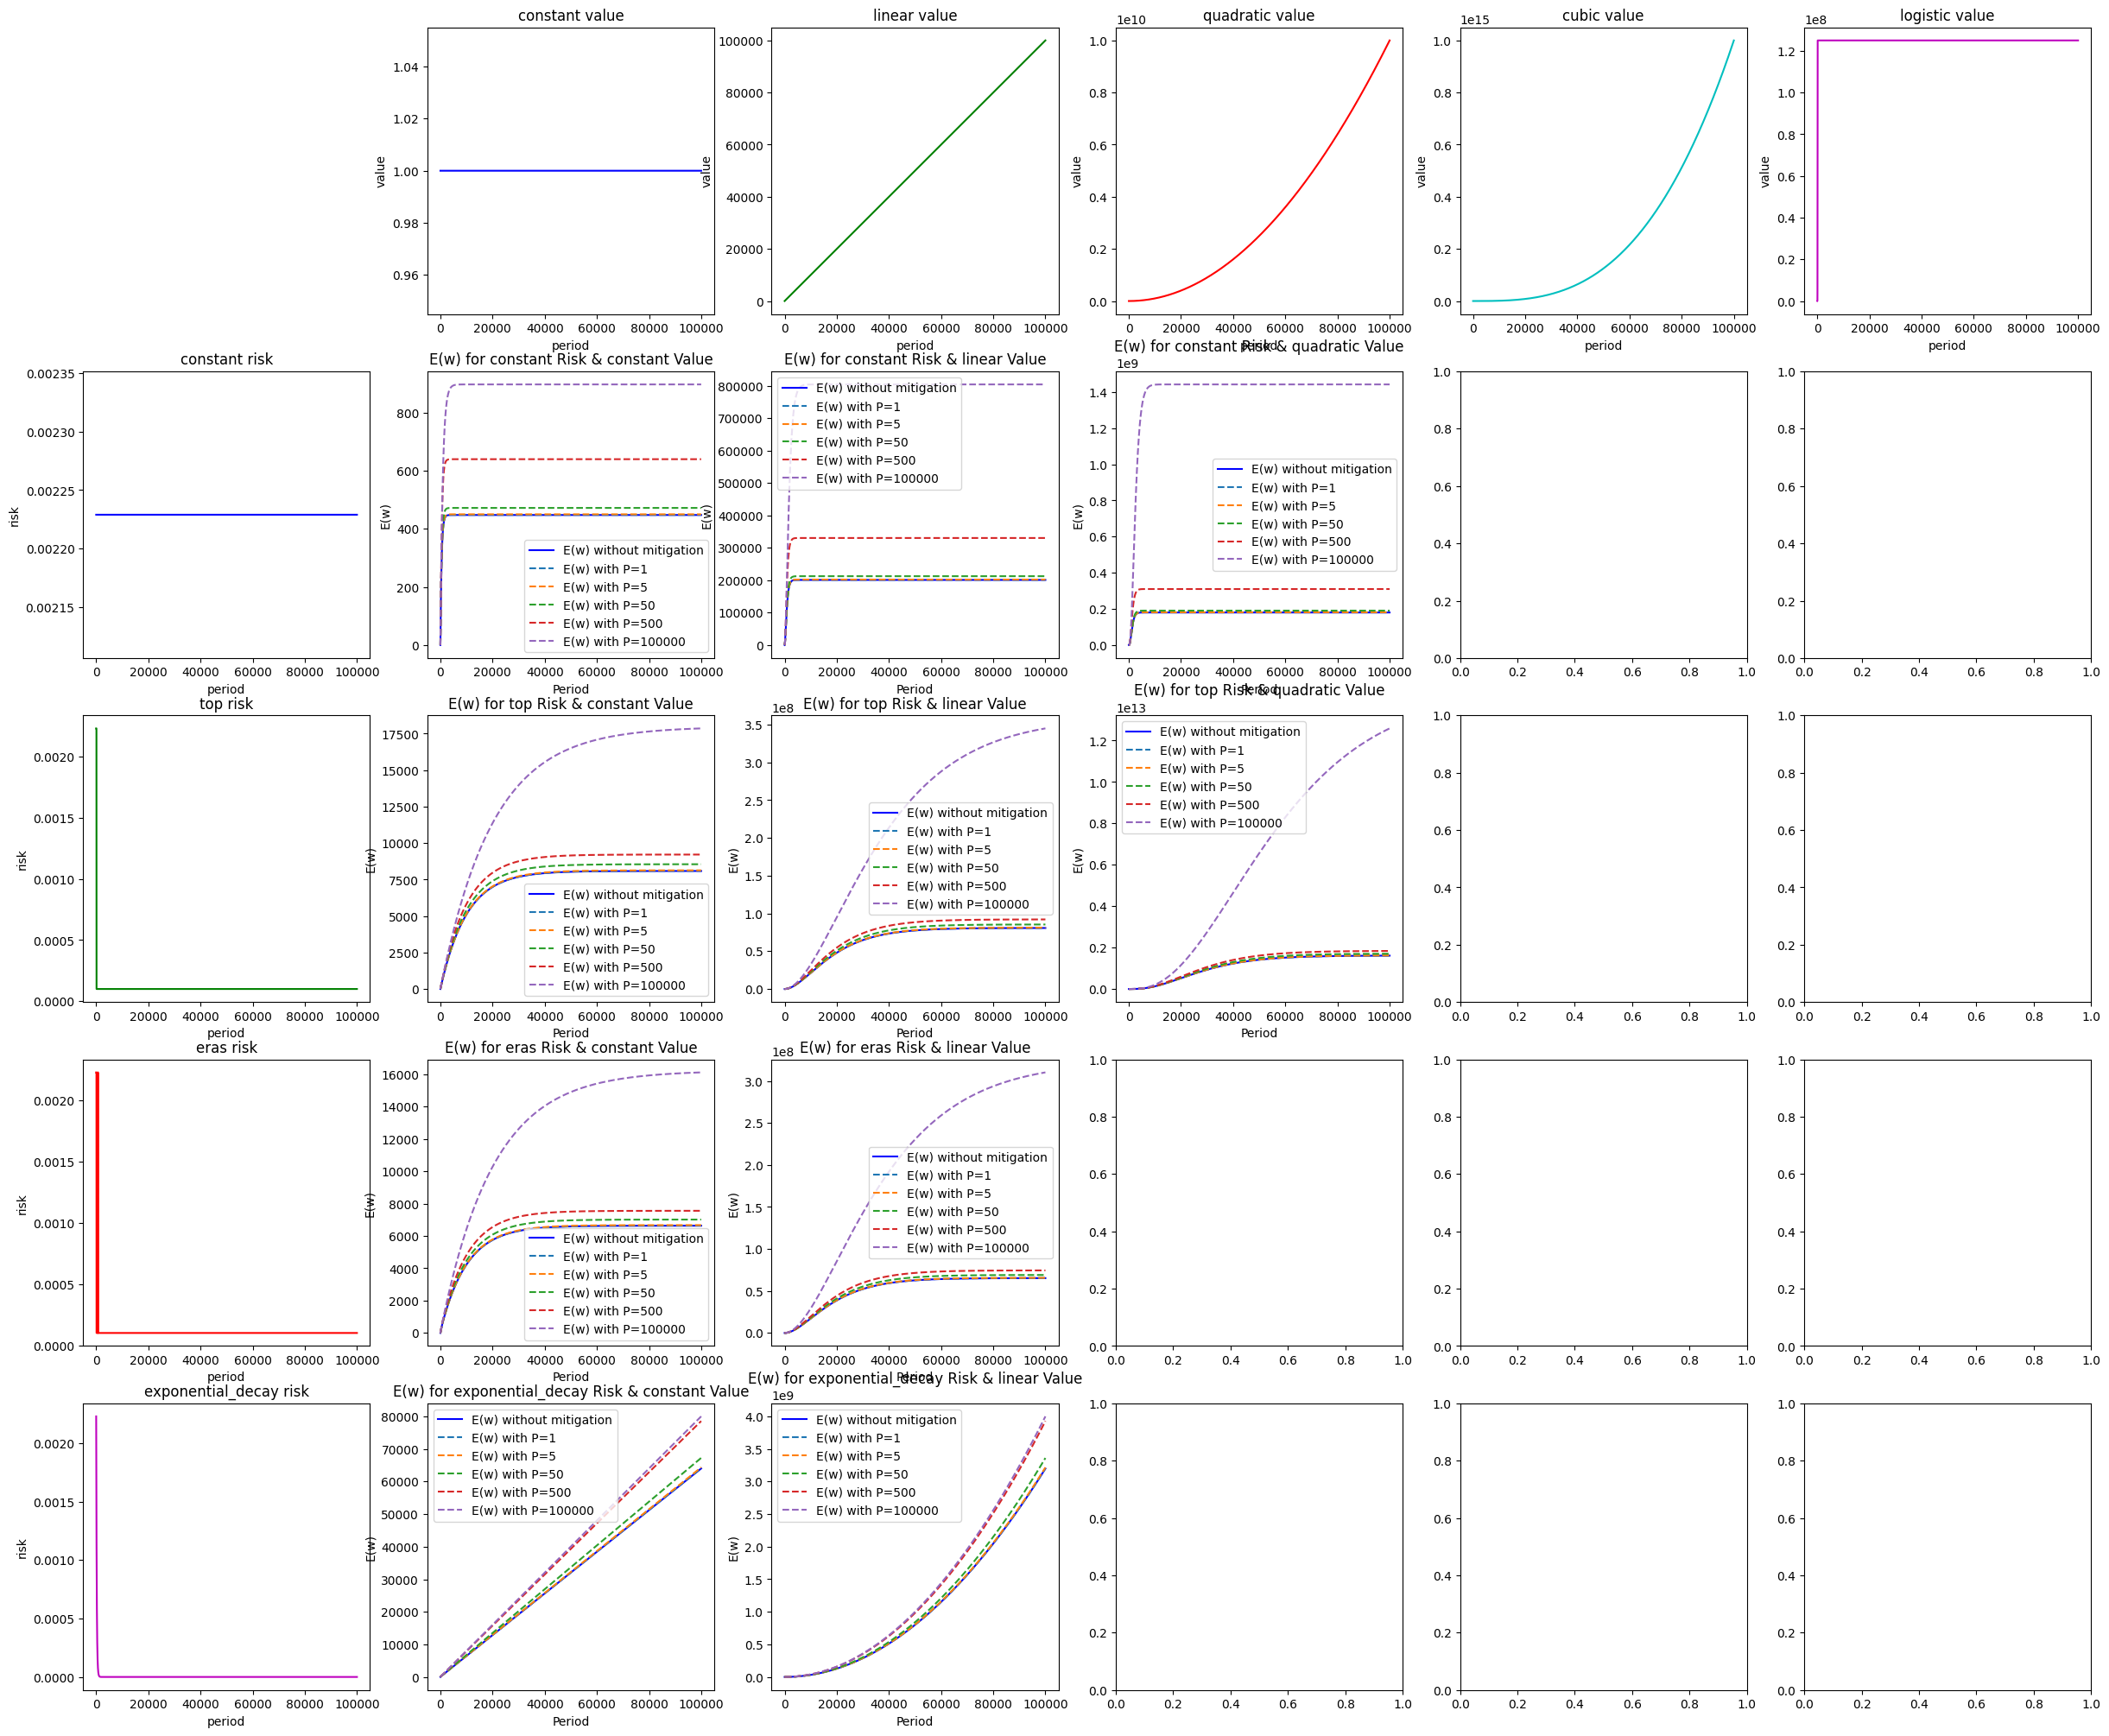

In [56]:
# let us try with a very ambitious T

plot_grid_Em(T=100000)


P max= 100000
by 134m:

constant r and constant v converged at period 5160, E(w) with P=1 is 448.137724
constant r and constant v converged at period 5162, E(w) with P=5 is 450.132158
constant r and constant v converged at period 5185, E(w) with P=50 is 471.967128
constant r and constant v converged at period 5410, E(w) with P=500 is 639.382211
constant r and constant v converged at period 10325, E(w) with P=100000 is 896.275441
constant r and linear v converged at period 9253, E(w) with P=1 is 201055.497906
constant r and linear v converged at period 9255, E(w) with P=5 is 201955.268394
constant r and linear v converged at period 9279, E(w) with P=50 is 212336.792781
constant r and linear v converged at period 9515, E(w) with P=500 is 330264.573089
constant r and linear v converged at period 19168, E(w) with P=100000 is 804222.001004
constant r and quadratic v converged at period 13698, E(w) with P=1 is 180202910.540012
constant r and quadratic v converged at period 13700, E(w) with P=5 is 181009380.721065
constant r and quadratic v converged at period 13724, E(w) with P=50 is 190334143.588400
constant r and quadratic v converged at period 13965, E(w) with P=500 is 309814960.568884
constant r and quadratic v converged at period 28748, E(w) with P=100000 is 1442427506.359431


after 145m:
constant r and constant v converged at period 5160, E(w) with P=1 is 448.137724
constant r and constant v converged at period 5162, E(w) with P=5 is 450.132158
constant r and constant v converged at period 5185, E(w) with P=50 is 471.967128
constant r and constant v converged at period 5410, E(w) with P=500 is 639.382211
constant r and constant v converged at period 10325, E(w) with P=100000 is 896.275441
constant r and linear v converged at period 9253, E(w) with P=1 is 201055.497906
constant r and linear v converged at period 9255, E(w) with P=5 is 201955.268394
constant r and linear v converged at period 9279, E(w) with P=50 is 212336.792781
constant r and linear v converged at period 9515, E(w) with P=500 is 330264.573089
constant r and linear v converged at period 19168, E(w) with P=100000 is 804222.001004
constant r and quadratic v converged at period 13698, E(w) with P=1 is 180202910.540012
constant r and quadratic v converged at period 13700, E(w) with P=5 is 181009380.721065
constant r and quadratic v converged at period 13724, E(w) with P=50 is 190334143.588400
constant r and quadratic v converged at period 13965, E(w) with P=500 is 309814960.568884
constant r and quadratic v converged at period 28748, E(w) with P=100000 is 1442427506.359431
state of the grid: all done for constant and linear value, quadratic value is done for constant and top risk but nothign else. logistic and cubic empty

This takes too long to run. Convergence doesn't break the process under this implementation. For now, we will specify manual Ts for each middle subplot.

[1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900]


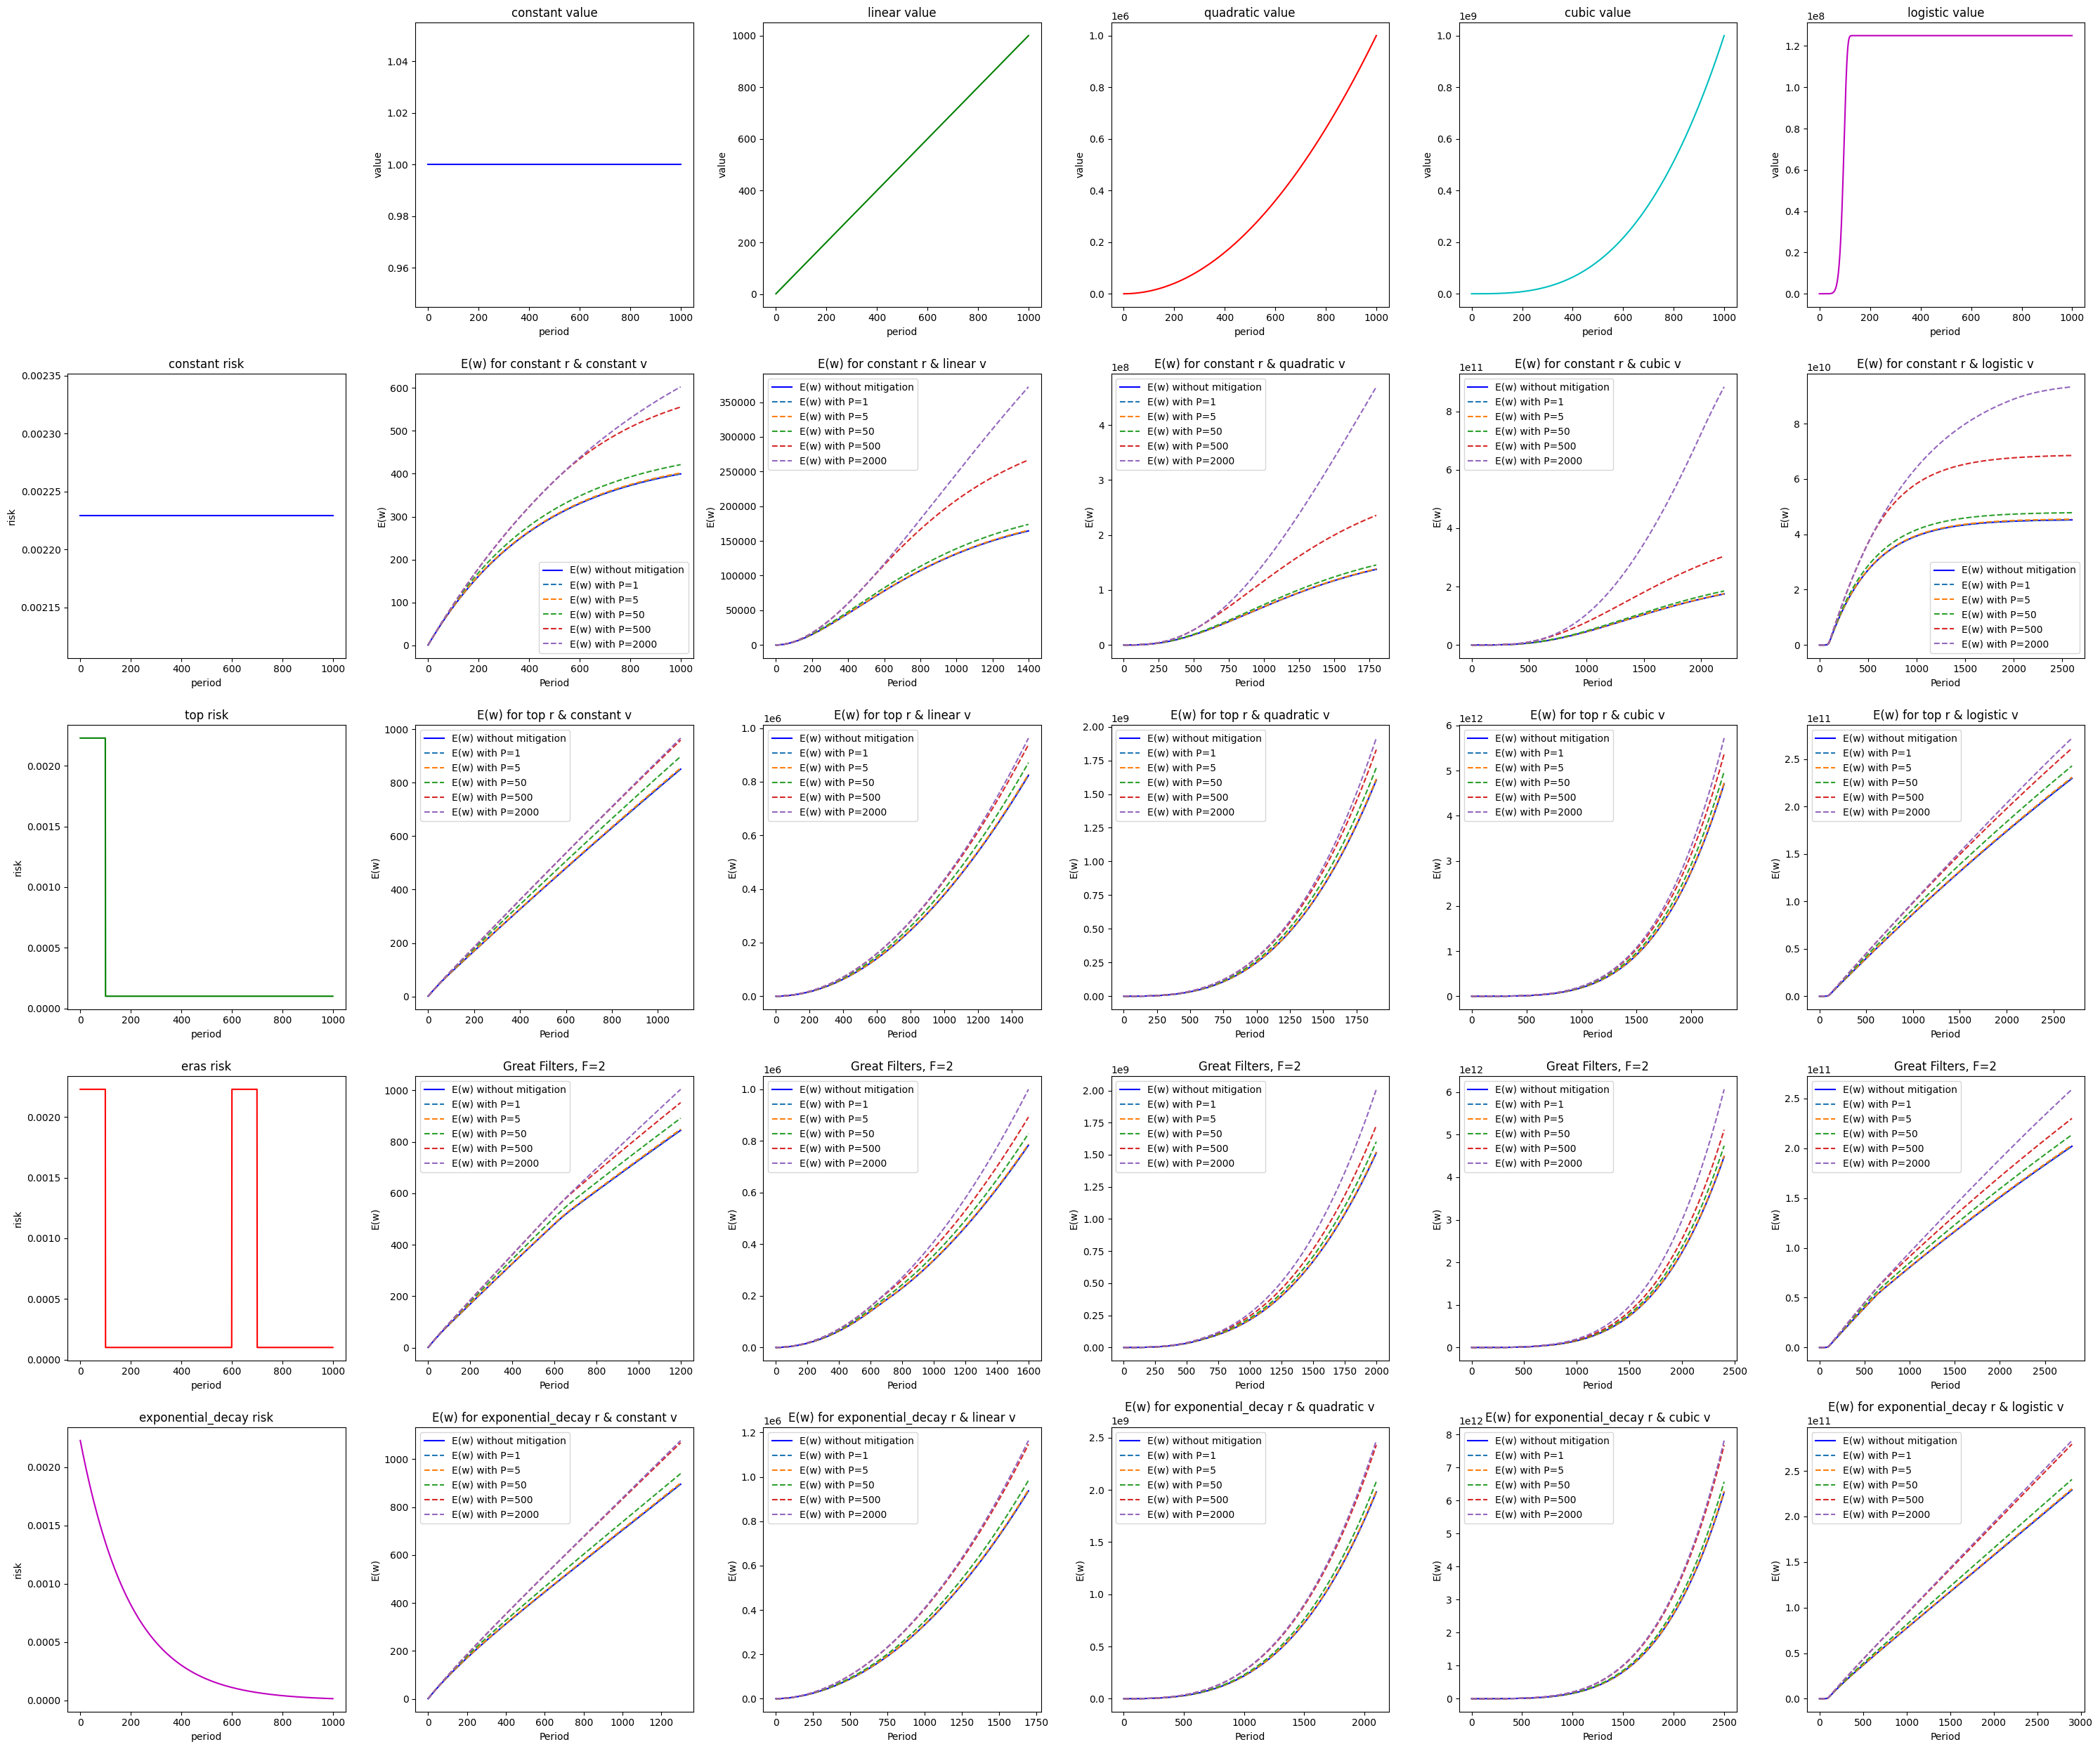

In [49]:
def plot_grid_Em_manual(Ts=[1000], tolerance=1e-5, Ps=[1, 5, 50, 500, T]):
    # Have the option to set different values of T for each sub-plot
    # Ts is a list of T values for each sub-plot, in the order of the middle sub-plots in the grid
    # If Ts is shorter than the number of sub-plots, the last T value will be used for the remaining sub-plots
    
    Ts = Ts + [Ts[-1]] * (20 - len(Ts)) # Pad Ts with the last value if the list is shorter than 20
    T = Ts[0] # We'll use this T value for the first row and column
    
    # Eras parameters
    eras_periods_here=[100, 500, 100, T - 700]
    eras_risks_here=[0.0022289477, 0.0001, 0.0022289477, 0.0001]

    # Initialize values, types, Ps and colors
    value_types = ["constant", "linear", "quadratic", "cubic", "logistic"]
    r_types = ["constant", "top", "eras", "exponential_decay"]
    Ps = Ps  # We'll calculate E(M) for each of these values of P

    colors_value = ["b", "g", "r", "c", "m"]
    colors_risk = ["b", "g", "r", "m"]

    fig, all_axes = plt.subplots(5, 6, figsize=(30, 25))
    
    # Turn off the axis for the top-left subplot.
    all_axes[0, 0].axis('off')

    # First row: different value vectors
    for i, v_type in enumerate(value_types):
        axes = all_axes[0, i + 1]
        v = generate_value_vector(T, v_type)
        axes.plot(v, color=colors_value[i])
        axes.set_title(f"{v_type} value")
        axes.set_xlabel("period")
        axes.set_ylabel("value")

    # First column: different risk vectors
    for i, r_type in enumerate(r_types):
        axes = all_axes[i + 1, 0]
        r = generate_risk_vector(T, r_type, eras_periods=eras_periods_here, eras_risks=eras_risks_here)
        axes.plot(r, color=colors_risk[i]) # previously: plt.plot(range(1, T + 1), r, color=colors_risk[i]) for plotting against period earlier (shifted by 1)
        axes.set_title(f"{r_type} risk")
        axes.set_xlabel("period")
        axes.set_ylabel("risk")

    # Middle plots: E(M) for each combination of value and risk
    for i, v_type in enumerate(value_types):
        for j, r_type in enumerate(r_types):
            
            # For the middle sub-plots, we'll use the T value from the Ts list
            T = Ts[j + 4 * i]
            
            # Update Ps and eras_periods_here according to the new T
            Ps = Ps
            eras_periods_here=[100, 500, 100, T - 700]
            
            # For debugging print(f"Plotting {v_type} v and {r_type} r for T={T}")
            axes = all_axes[j + 1, i + 1]
            middle_plot_mitigated_vs_unmitigated_Em_convergence(T, Ps=Ps, r_type=r_type, v_type=v_type, tolerance=tolerance, eras_periods=eras_periods_here, eras_risks=eras_risks_here, axes=axes)
            
    plt.tight_layout()
    plt.show()

In [66]:
# For internal experiments only
# skip this cell in general
# if not skip_execution:
def properties_Ts(Ts):
    length = len(Ts)
    print("Length of the list:", length)
    print("Total periods evaluated:", sum(Ts))
    
    print("\nTable of periods used in each case:")
    row_labels = ['Constant r', 'ToP r', '2 Great Filters', 'Decaying r']
    col_labels = ['Constant v', 'Linear v', 'Quadratic v', 'Cubic v', 'Logistic v']
    rows, cols = 4, 5
    array = [["" for _ in range(cols + 1)] for _ in range(rows + 1)]

    array[0][1:] = col_labels
    for r in range(1, rows + 1):
        array[r][0] = row_labels[r - 1]

    for r in range(1, rows + 1):
        for c in range(1, cols + 1):
            index = (c - 1) * rows + (r - 1)
            if index < length:
                array[r][c] = str(Ts[index])

    col_widths = [max(len(str(value)) for value in column) for column in zip(*array)]

    for row in array:
        for value, width in zip(row, col_widths):
            print(f"{value:<{width}}", end="  ")
        print()


In [67]:
# generate list of Ts from 100 onwards, increasing by a factor of 100 each time≥, 20 times
Ts_eg = [1000 +100 * i for i in range(20)] # 1000, 1100, 1200, ..., 2900, 3000     This takes about 11 seconds to run

properties_Ts(Ts_eg)

Length of the list: 20
Total periods evaluated: 39000

Table of periods use in each case:
                 Constant v  Linear v  Quadratic v  Cubic v  Logistic v  
Constant r       1000        1400      1800         2200     2600        
ToP r            1100        1500      1900         2300     2700        
2 Great Filters  1200        1600      2000         2400     2800        
Decaying r       1300        1700      2100         2500     2900        


In [ ]:
plot_grid_Em_manual(Ts=Ts_eg)

Length of Ts_experiment: 20


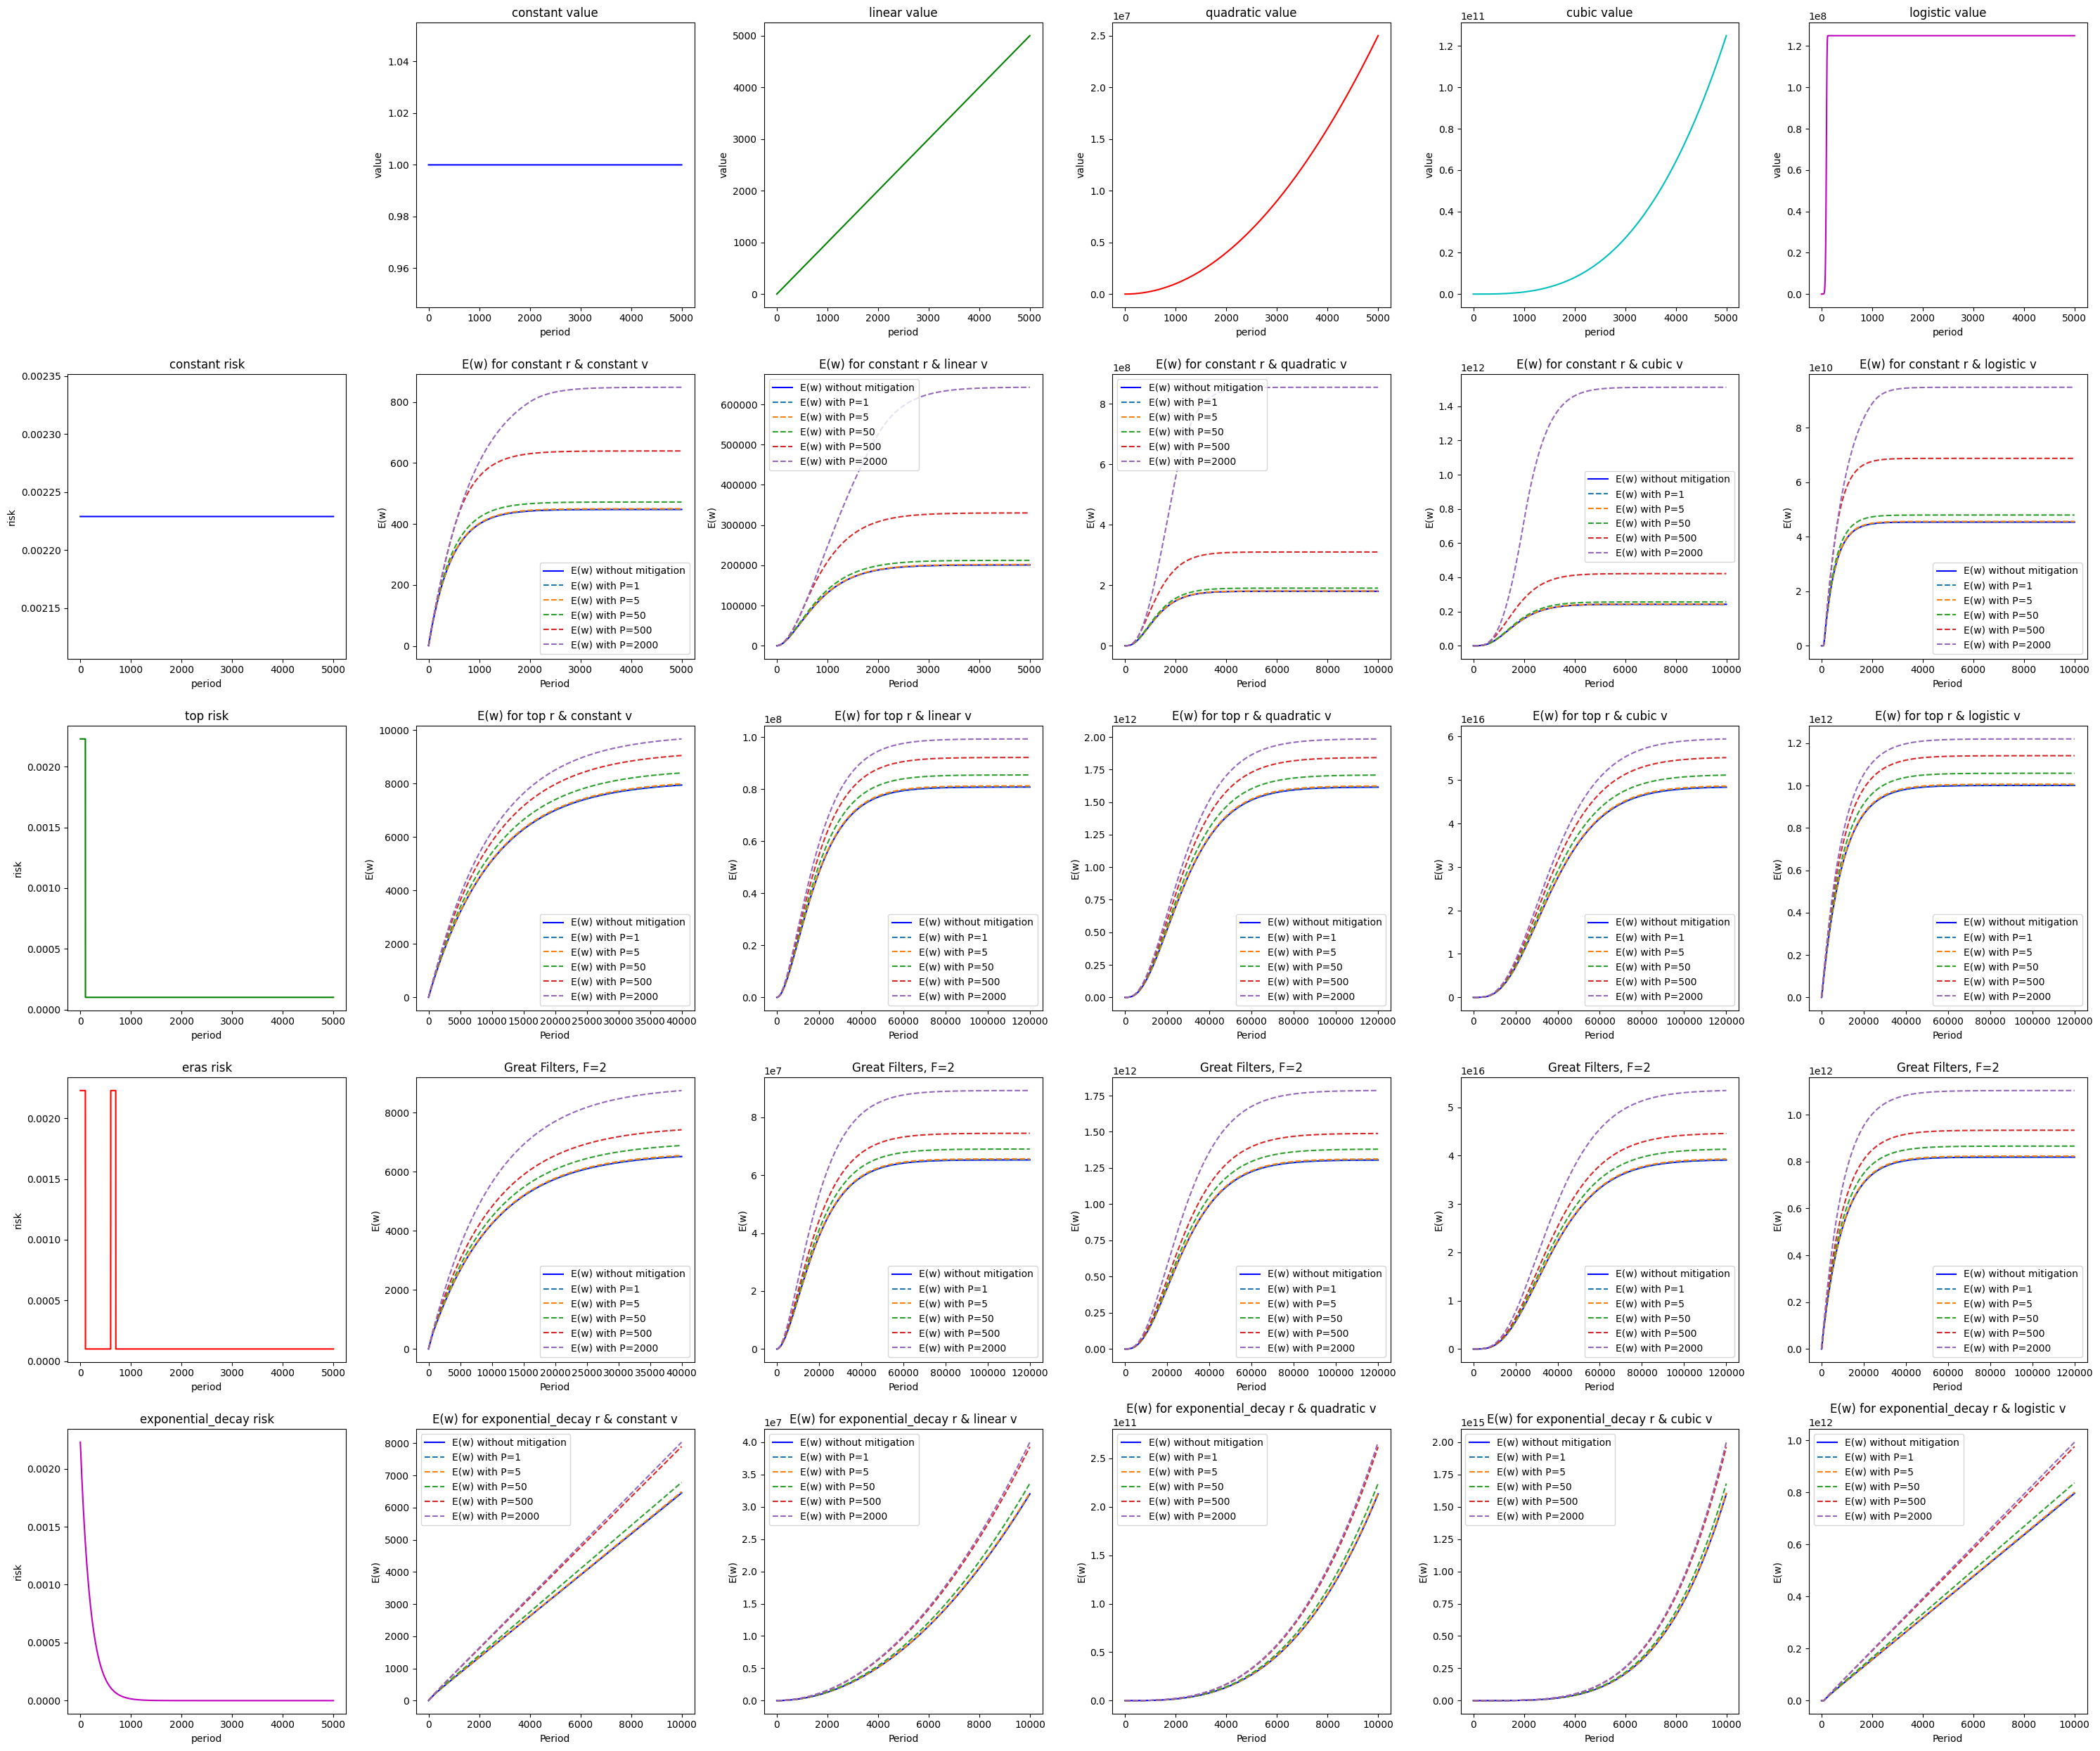

In [50]:
Ts_experiment = [5000, 40000, 40000, 10000, 5000, 120000, 120000, 10000, 10000, 120000, 120000, 10000, 10000, 120000, 120000, 10000, 10000, 120000, 120000, 10000]
# test the length of Ts_experiment
print(f"Length of Ts_experiment: {len(Ts_experiment)}")

# total periods considered in Ts_experiment is sum of elements in Ts_experiment
print(f"Total periods considered in Ts_experiment: {sum(Ts_experiment)}") # 1,000,000

plot_grid_Em_manual(Ts=Ts_experiment)

# # Experiment with other Ps
# plot_grid_Em_manual(Ts=Ts_experiment, Ps=[1, 50, 500, 10000])


# for some reason largest P was older one we passed of 2000, not 10000, this took 45m to run

Some headline results from the grid:
- The value of $M$ is, in expectation, consistently of the same magnitude as $E(w)$ for all $f\leq0.5$. 
- The value of $M$ (and of $E(w)$) explodes if the risk decays exponentially.
    - As a corollary, an alternative version of ToP that had expontentially decaying risk after the high risk period would behave similarly.

Lastly, for these grids, let us try with a very large persistence of $P=100,000$. This time, we will ommit the other $P$ values. After experimenting, we try with custom Ts for each subplot that let us observe convergence.

In [68]:
Ts_largeP = [5000, 50000, 50000, 10000, 6000, 90000, 90000, 10000, 7000, 120000, 120000, 10000, 10000, 130000, 130000, 10000, 7000, 70000, 70000, 10000]

properties_Ts(Ts_largeP)

Length of the list: 20
Total periods evaluated: 1005000

Table of periods use in each case:
                 Constant v  Linear v  Quadratic v  Cubic v  Logistic v  
Constant r       5000        6000      7000         10000    7000        
ToP r            50000       90000     120000       130000   70000       
2 Great Filters  50000       90000     120000       130000   70000       
Decaying r       10000       10000     10000        10000    10000       


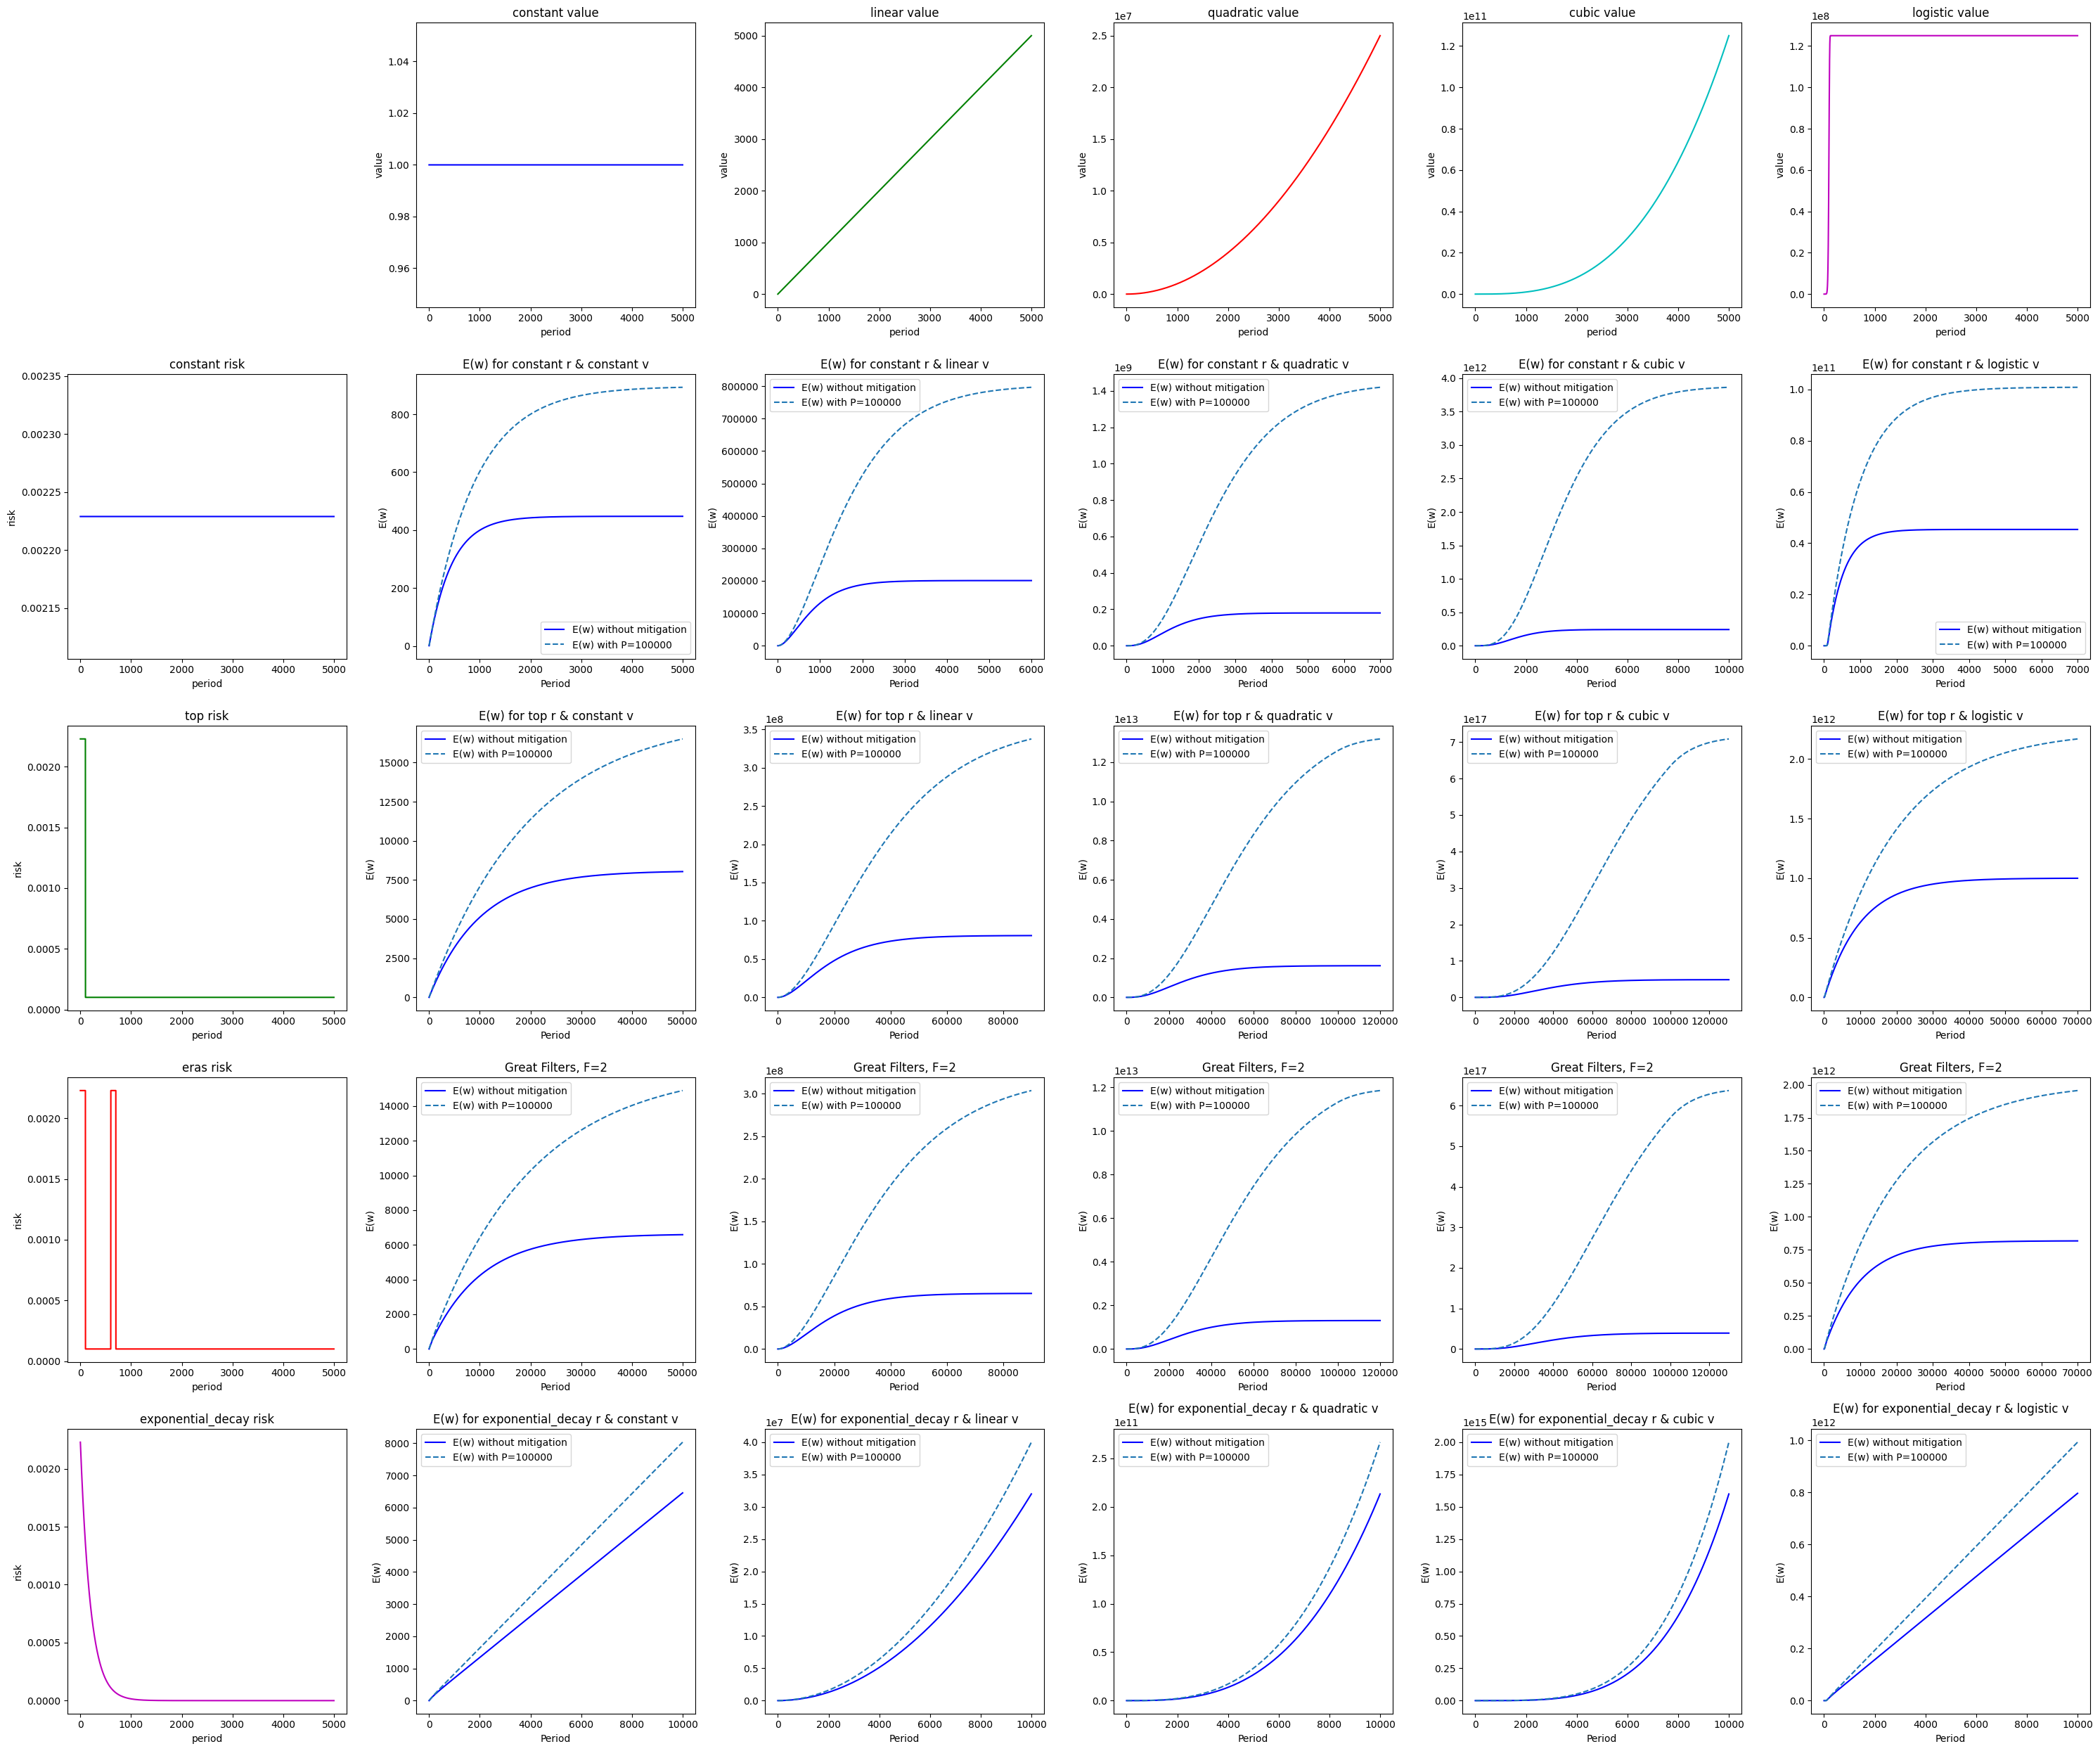

In [70]:
Ps_large = [100000]

# plot_grid_Em_manual(Ts=Ts_largeP, Ps=Ps_large) # 1h 32m to run

# Display the saved plot image
display(Image(filename='E(M) large P.png'))



In [ ]:
# %%skip
# # This cell will be skipped during execution
# print("This won't be executed")


UsageError: Cell magic `%%skip` not found.


To do in the future: It would be interesting to do a grid where we vary the number of filters. 1,2 we already have, it'd be good to see 3 and 5.

could be useful:

In Jupyter Notebook, you can store a plot and display it without re-running the calculations and plotting code by saving the plot as an image file and then displaying that image whenever needed. Here's a general approach:

1. Generate and plot your data as usual in a code cell.
2. Once the plot is generated, save it as an image file using a function like `savefig()` from a plotting library like Matplotlib.

```python
import matplotlib.pyplot as plt

# Generate and plot your data
# ...

# Save the plot as an image file (e.g., PNG)
plt.savefig('my_plot.png')
```

3. Later, when you want to display the plot without recalculating, you can use the `IPython.display` module to show the saved image in a Markdown cell using the `Image` class.

```python
from IPython.display import Image, display

# Display the saved plot image
display(Image(filename='my_plot.png'))
```

By following this approach, the plot will be ready for display without re-running the calculations or plotting code. Just make sure to adjust the file paths and names accordingly to match your use case.

# Appendix

## Example constant value, persistence 5

In [2]:
def general_method(T, v_c, r_first_100, r_after_100):
    sum_r = 0
    product_r = 1
    for i in range(1, T + 1):
        sum_r += product_r * v_c
        if i <= 100:
            product_r *= (1 - r_first_100)
        else:
            product_r *= (1 - r_after_100)
    return sum_r

def geometric_series_method(T, v_c, r_first_100, r_after_100):
    # First 100 years geometric series
    S_100 = (1 / (1 - (1 - r_first_100))) * (1 - (1 - r_first_100)**100)
    
    # After 100 years geometric series
    S_10000 = ((1 - r_first_100)**100 / (1 - (1 - r_after_100))) * (1 - (1 - r_after_100)**(T-100))
    
    return v_c * (S_100 + S_10000)

T = 10000
v_c = 1
r_first_100 = 0.00222894771
r_after_100 = 0.0001

print("General method:", general_method(T, v_c, r_first_100, r_after_100))
print("Geometric series method:", geometric_series_method(T, v_c, r_first_100, r_after_100))

General method: 5117.262062779533
Geometric series method: 5117.262062779516


In [12]:
# def expected_value_general(T, v_c, r_sequence):
#     sum_r = 0
#     product_r = 1
#     for i in range(1, T + 1):
#         sum_r += product_r * v_c
#         product_r *= (1 - r_sequence[i - 1])
#     return sum_r

def expected_value_geometric(T, v_c, r_first_segment, r_second_segment, r_rest):
    len_first = len(r_first_segment)
    len_second = len(r_second_segment)
    # First segment
    S_first = (1 / (1 - (1 - r_first_segment[-1]))) * (1 - (1 - r_first_segment[-1])**len_first)
    
    # Second segment
    S_second = ((1 - r_first_segment[-1])**len_first / (1 - (1 - r_second_segment[-1]))) * (1 - (1 - r_second_segment[-1])**len_second)
    
    # Rest of the time
    S_rest = ((1 - r_second_segment[-1])**len_second * (1 - r_first_segment[-1])**len_first / (1 - (1 - r_rest))) * (1 - (1 - r_rest)**(T - len_first - len_second))
    
    return v_c * (S_first + S_second + S_rest)


def expected_value_general(T, v_c, r_first_segment, r_second_segment, r_rest):
    sum_r = 0
    product_r = 1
    
    # First segment
    for i in range(len(r_first_segment)):
        sum_r += product_r * v_c
        product_r *= (1 - r_first_segment[i])
    
    # Second segment (only if it's not empty)
    if r_second_segment:
        for i in range(len(r_second_segment)):
            sum_r += product_r * v_c
            product_r *= (1 - r_second_segment[i])
    
    # Rest of the time
    for i in range(T - len(r_first_segment) - len(r_second_segment)):
        sum_r += product_r * v_c
        product_r *= (1 - r_rest)
    
    return sum_r

T = 10000
v_c = 1

# Risks for E(w)
r_w_first = [0.00222894771] * 100
r_w_second = []
r_w_rest = 0.0001

# Risks for E(w')
r_w_prime_first = [0.0011145] * 5
r_w_prime_second = [0.00222894771] * 95
r_w_prime_rest = 0.0001

# Calculate E(w) and E(w') using both methods
E_w_general = expected_value_general(T, v_c, r_w_first, r_w_second, r_w_rest)
E_w_prime_general = expected_value_general(T, v_c, r_w_prime_first, r_w_prime_second, r_w_prime_rest)

E_w_geometric = expected_value_geometric(T, v_c, r_w_first, r_w_second, r_w_rest)
E_w_prime_geometric = expected_value_geometric(T, v_c, r_w_prime_first, r_w_prime_second, r_w_prime_rest)

# Print the results
print("E(w) using general method:", E_w_general)
print("E(w') using general method:", E_w_prime_general)
print("Difference (general method):", E_w_prime_general - E_w_general)

print("\nE(w) using geometric series method:", E_w_geometric)
print("E(w') using geometric series method:", E_w_prime_geometric)
print("Difference (geometric series method):", E_w_prime_geometric - E_w_geometric)



T = 10000
v_c = 1

# Risks for E(w)
r_w = [0.00222894771]*100 + [0.0001]*(T-100)

# Risks for E(w')
r_w_prime = [0.0011145]*5 + [0.00222894771]*95 + [0.0001]*(T-100)

# Calculate E(w) and E(w') using both methods
E_w_general = expected_value_general(T, v_c, r_w)
E_w_prime_general = expected_value_general(T, v_c, r_w_prime)

# E_w_geometric = expected_value_geometric(T, v_c, 0.00222894771, 0.00222894771, 0.0001)
# E_w_prime_geometric = expected_value_geometric(T, v_c, 0.0011145, 0.00222894771, 0.0001)

# Print the results
print("E(w) using general method:", E_w_general)
print("E(w') using general method:", E_w_prime_general)
print("Difference (general method):", E_w_prime_general - E_w_general)

print("\nE(w) using geometric series method:", E_w_geometric)
print("E(w') using geometric series method:", E_w_prime_geometric)
print("Difference (geometric series method):", E_w_prime_geometric - E_w_geometric)


IndexError: list index out of range

## The value of existential risk mitigations under GFH [original]

In [1]:
import numpy as np

# Parameters
r_1 = 0.2
f = 1/2
r_M = (1-f)*r_1 # M is prime in the LaTeX
r_l = 0.001
r_2 = 0.2
F = 2
P = 20
T = 10000

# Calculate the sums for E[w_X]
sum_V_X = sum((1 - r_M)**t for t in range(1, F+1))  #+1s needed given Python syntax because range() is exclusive
sum_low_risk_X = sum((1 - r_l)**t for t in range(1, P+1))
sum_second_filter_M = sum((1 - r_2)**t for t in range(1, F+1))
sum_low_risk_infinite_X = sum((1 - r_l)**t for t in range(1, T+1))

# Calculate the sums for E[w]
sum_V_w = sum((1 - r_1)**t for t in range(1, F+1))
sum_low_risk_w = sum((1 - r_l)**t for t in range(1, P+1))
sum_second_filter_w = sum((1 - r_2)**t for t in range(1, F+1))
sum_low_risk_infinite_w = sum((1 - r_l)**t for t in range(1, T+1))

# Calculate the difference E[M] = E[w_M] - E[w]
difference = (sum_V_X - sum_V_w) + ((1 - r_M)**F - (1 - r_1)**F) * sum_low_risk_X + ((1 - r_M)**F - (1 - r_1)**F) * (1 - r_l)**P * (sum_second_filter_M - sum_second_filter_w) + ((1 - r_M)**F - (1 - r_1)**F) * (1 - r_l)**P * (1 - r_2)**F * (sum_low_risk_infinite_X - sum_low_risk_infinite_w)

print(f"Parameters:\nr_1 = {r_1}, r_M = {r_M}, r_l = {r_l}, r_2 = {r_2}, F = {F}, P = {P}, T = {T}\n")
print("The difference V[X] - V[w] is:", difference)

Parameters:
r_1 = 0.2, r_X = 0.1, r_l = 0.001, r_2 = 0.2, F = 2, P = 20, T = 10000

The difference V[X] - V[W] is: 3.6345250860001235


## The value of existential risk mitigations under exponential decay [original]

At lambda= -11
at T= 2
r0 = 0.20, r0_doubled = 0.40, f = 0.50
rX = 0.10, rX_doubled = 0.20
The original difference is: 0.30000233825763667
The new difference is: 0.600002672294442
The difference increase is: 0.30000033403680537
The ratio new/original is: 1.9999933193159662
--------------------------------------------------
At lambda= -11
at T= 5
r0 = 0.20, r0_doubled = 0.40, f = 0.50
rX = 0.10, rX_doubled = 0.20
The original difference is: 0.6000058456733806
The new difference is: 1.2000066807695795
The difference increase is: 0.600000835096199
The ratio new/original is: 1.9999916491193914
--------------------------------------------------
At lambda= -11
at T= 10
r0 = 0.20, r0_doubled = 0.40, f = 0.50
rX = 0.10, rX_doubled = 0.20
The original difference is: 1.1000116913662872
The new difference is: 2.200013361561476
The difference increase is: 1.100001670195189
The ratio new/original is: 1.9999908899412826
--------------------------------------------------
At lambda= -11
at T= 20
r0 = 

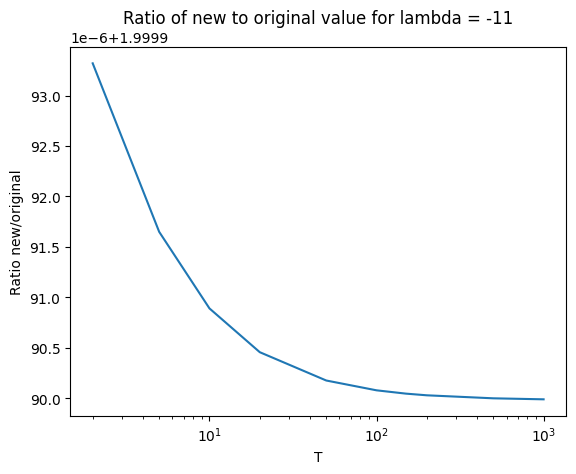

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define T values to iterate over
T_values = [2, 5, 10, 20, 50, 100, 150, 200, 500, 1000]

r0 = 1/5 # I would of course change these parameters as I experimented around
r0_doubled = 2 * r0
f = 1/2
rX = (1-f)*r0
rX_doubled = (1-f)*r0_doubled
# lam = -1e-0
lam = -11

ratios = []  # Store ratios for each T value

for T in T_values:
    # Original expression
    sum1_original = sum([np.prod([1 - rX * np.exp(lam * n) for n in range(t+1)]) for t in range(T+1)]) #+1s needed given Python syntax because range() is exclusive
    sum2_original = sum([np.prod([1 - r0 * np.exp(lam * n) for n in range(t+1)]) for t in range(T+1)])
    difference_original = sum1_original - sum2_original

    # New expression with r0 doubled
    sum1_new = sum([np.prod([1 - rX_doubled * np.exp(lam * n) for n in range(t+1)]) for t in range(T+1)])
    sum2_new = sum([np.prod([1 - r0_doubled * np.exp(lam * n) for n in range(t+1)]) for t in range(T+1)])
    difference_new = sum1_new - sum2_new

    # How much larger the new expression is
    difference_increase = difference_new - difference_original

    ratio = difference_new/difference_original
    ratios.append(ratio)

    print("At lambda=", lam)
    print("at T=", T)
    print(f"r0 = {r0:.2f}, r0_doubled = {r0_doubled:.2f}, f = {f:.2f}")
    print(f"rX = {rX:.2f}, rX_doubled = {rX_doubled:.2f}")
    print("The original difference is:", difference_original)
    print("The new difference is:", difference_new)
    print("The difference increase is:", difference_increase)
    print("The ratio new/original is:", ratio)
    print("-" * 50)

# Plot the ratios
df = pd.DataFrame({'T': T_values, 'ratio': ratios})
plt.plot('T', 'ratio', data=df)
plt.xscale('log')
plt.xlabel('T')
plt.ylabel('Ratio new/original')
plt.title(f"Ratio of new to original value for lambda = {lam}")
plt.show()